In [1]:
#importovanie kniznic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import jsonlines
import json
from bs4 import BeautifulSoup
import re 
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from datetime import datetime
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from scipy.stats import shapiro
from scipy.stats import kruskal
from scipy.stats import ttest_ind, f_oneway
from scipy.stats import pearsonr, spearmanr
from nltk.tokenize import sent_tokenize, word_tokenize
import emoji
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from collections import Counter #
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import spacy
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nlp = spacy.load('en_core_web_sm')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
from scipy.sparse import hstack
from scipy.sparse import csr_matrix, hstack
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics 
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import svm
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from langdetect import detect
from langdetect import LangDetectException
from sklearn.preprocessing import FunctionTransformer, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from nltk import pos_tag
from sklearn.ensemble import GradientBoostingClassifier



[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/danielap/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/danielap/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /home/danielap/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/danielap/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/danielap/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/danielap/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## H4: Lexikálne črty sú lepšie na určenie vekovej kategorie ako syntakticke

Načítanie datasetu

In [2]:
data = []

with open('../datasety/syntakticke_crty_ocisteny.json', 'r') as file:
    for line in file:
        try:
            # Každý riadok je samostatný JSON objekt, nie zoznam.
            json_obj = json.loads(line)
            data.append(json_obj)
        except json.JSONDecodeError as e:
            print(f"Chyba pri dekódovaní JSON na riadku: {e}")

In [3]:
dataset = pd.DataFrame(data)
dataset.head()

id  gender  age_group  declarative_percent  interrogative_percent  \
0  11683       1          1            90.577508               2.431611   
1  42738       1          3            76.319759              20.211161   
2  11006       1          1             8.831169               1.168831   
3  28582       1          1            41.290323               0.645161   
4  16463       1          4            91.971831               6.478873   

   imperative_percent  other_ending_percent  avg_commas  \
0            6.686930              0.303951    0.234043   
1            2.714932              0.754148    0.155354   
2           89.870130              0.129870    0.114286   
3           57.419355              0.645161    0.793548   
4            0.000000              1.549296    0.745070   

   average_nouns_per_tweet  average_adjective_per_tweet  ...  \
0                 3.306991                     1.395137  ...   
1                 2.595777                     1.007541  ...   
2                 1.914286                     0.749351  ...   
3                 7.716129                     2.890323  ...   
4                 4.761972                     1.556338  ...   

   average_particle_per_tweet  average_interjection_per_tweet  \
0                    0.179331                             0.0   
1                    0.046757                             0.0   
2                    0.068831                             0.0   
3                    0.135484                             0.0   
4                    0.102817                             0.0   

   average_past_tense_per_tweet  average_present_tense_per_tweet  \
0                      0.509091                         1.800000   
1                      1.095975                         3.229102   
2                      0.569343                         1.000000   
3                      0.333333                         1.037940   
4                      1.418947                         2.298947   

   avg_nsubj_per_tweet  avg_dobj_per_tweet  avg_advmod_per_tweet  \
0             1.987013            1.072727              0.825974   
1             2.965944            1.535604              1.560372   
2             1.021898            0.880779              0.705596   
3             0.769648            0.663957              0.566396   
4             2.166316            1.595789              1.307368   

   avg_amod_per_tweet  avg_aux_per_tweet  \
0            0.524675           0.989610   
1            1.018576           1.541796   
2            0.980535           0.525547   
3            0.918699           0.349593   
4            1.467368           1.343158   

                                     lemmatized_text  
0  people do not know the definition and use phra...  
1  wrong place to play that game no reason for ra...  
2  happy hump day a little sunday drive for and I...  
3  there be actorsthere be star then there be peo...  
4  on sept 24 I write about offbeatenpath gm cand...  

[5 rows x 26 columns]

Vymazanie nepotrebných stlpcov

In [4]:
dataset=dataset.drop([ 'id','gender' ], axis=1)

ROZDELENIE NA TRENOVACI A TESTOVACI DATASET

Bez outlieerov a skalovania

In [5]:
y = dataset['age_group']
X = dataset.drop(['age_group'], axis=1) 

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)#testovaci 30%, trenovaci 70%

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3172 entries, 2227 to 3138
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   declarative_percent              3172 non-null   float64
 1   interrogative_percent            3172 non-null   float64
 2   imperative_percent               3172 non-null   float64
 3   other_ending_percent             3172 non-null   float64
 4   avg_commas                       3172 non-null   float64
 5   average_nouns_per_tweet          3172 non-null   float64
 6   average_adjective_per_tweet      3172 non-null   float64
 7   average_verb_per_tweet           3172 non-null   float64
 8   average_pronoun_per_tweet        3172 non-null   float64
 9   average_numeral_per_tweet        3172 non-null   float64
 10  average_adverb_per_tweet         3172 non-null   float64
 11  average_preposition_per_tweet    3172 non-null   float64
 12  average_conjuncti

In [8]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1360 entries, 1887 to 2581
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   declarative_percent              1360 non-null   float64
 1   interrogative_percent            1360 non-null   float64
 2   imperative_percent               1360 non-null   float64
 3   other_ending_percent             1360 non-null   float64
 4   avg_commas                       1360 non-null   float64
 5   average_nouns_per_tweet          1360 non-null   float64
 6   average_adjective_per_tweet      1360 non-null   float64
 7   average_verb_per_tweet           1360 non-null   float64
 8   average_pronoun_per_tweet        1360 non-null   float64
 9   average_numeral_per_tweet        1360 non-null   float64
 10  average_adverb_per_tweet         1360 non-null   float64
 11  average_preposition_per_tweet    1360 non-null   float64
 12  average_conjuncti

Kedže veľkosť matice s n-gramami môže byť veľmi vysoká a môže trvať aj veľmi dlho spustenie, tak sme sa rozhodli dať iba niekoľko nafrekventovanejším n-gramov. Skúsili sme s rôznymi veľkosťami n-gramov natrénovať modeli aby sme videli, ktorá veľkosť je najefektívnejšia. Najlepšie by bolo toto spustiť aj s inými verziami datasetu (s outliermi, skalovaním a podobne), však to by bolo veľmi časovo náročné, tak sme zvolili túto možnosť so zakladnym datasetom. Po spustení tohto kodu sme väčšinou manuálne prepísali max_features v kode nižšie, kde sa vytvárali n-gramy, s ktorými pracujeme neskôr.

In [9]:
max_features_options = [500, 1000, 2000, 3000, 4000, 5000]  # Rôzne veľkosti slovníkov

for max_features in max_features_options:
    # Vektorizácia pre CountVectorizer
    vectorizer_ngram = CountVectorizer(ngram_range=(1, 4), analyzer='word', max_features=max_features)
    ngram_train = vectorizer_ngram.fit_transform(X_train['lemmatized_text'])
    ngram_test = vectorizer_ngram.transform(X_test['lemmatized_text'])
    
    # Kombinovanie n-gramov s ostatnými príznakmi, odstránenie 'lemmatized_text'
    X_train_dropped = X_train.drop(['lemmatized_text'], axis=1)
    X_test_dropped = X_test.drop(['lemmatized_text'], axis=1)
    X_train_combined = hstack([X_train_dropped, ngram_train])
    X_test_combined = hstack([X_test_dropped, ngram_test])

    # Trénovanie modelov
    models = {
        'SVC': SVC(),
        'Random Forest': RandomForestClassifier(),
        'GRADIENT BOOSTING MASHINE': GradientBoostingClassifier()
    }

    for model_name, model in models.items():
        model.fit(X_train_combined, y_train)
        y_pred = model.predict(X_test_combined)
        accuracy = accuracy_score(y_test, y_pred)
        print(f'Model: {model_name}, Max Features: {max_features}, Accuracy: {accuracy:.2f}')

Model: SVC, Max Features: 500, Accuracy: 0.41
Model: Random Forest, Max Features: 500, Accuracy: 0.43
Model: GRADIENT BOOSTING MASHINE, Max Features: 500, Accuracy: 0.43
Model: SVC, Max Features: 1000, Accuracy: 0.41
Model: Random Forest, Max Features: 1000, Accuracy: 0.41
Model: GRADIENT BOOSTING MASHINE, Max Features: 1000, Accuracy: 0.43
Model: SVC, Max Features: 2000, Accuracy: 0.42
Model: Random Forest, Max Features: 2000, Accuracy: 0.41
Model: GRADIENT BOOSTING MASHINE, Max Features: 2000, Accuracy: 0.42
Model: SVC, Max Features: 3000, Accuracy: 0.41
Model: Random Forest, Max Features: 3000, Accuracy: 0.40
Model: GRADIENT BOOSTING MASHINE, Max Features: 3000, Accuracy: 0.43
Model: SVC, Max Features: 4000, Accuracy: 0.41
Model: Random Forest, Max Features: 4000, Accuracy: 0.42
Model: GRADIENT BOOSTING MASHINE, Max Features: 4000, Accuracy: 0.44
Model: SVC, Max Features: 5000, Accuracy: 0.41
Model: Random Forest, Max Features: 5000, Accuracy: 0.41
Model: GRADIENT BOOSTING MASHINE, 

To isté sme urobili aj pre tfidf n-gramy

In [10]:
max_features_options = [500, 1000, 2000, 3000, 4000, 5000]  # Rôzne veľkosti slovníkov

for max_features in max_features_options:
    # Vektorizácia pre TfidfVectorizer
    vectorizer_ngram = TfidfVectorizer(ngram_range=(1, 4), analyzer='word', max_features=max_features)
    ngram_train = vectorizer_ngram.fit_transform(X_train['lemmatized_text'])
    ngram_test = vectorizer_ngram.transform(X_test['lemmatized_text'])
    
    # Kombinovanie n-gramov s ostatnými príznakmi, odstránenie 'lemmatized_text'
    X_train_dropped = X_train.drop(['lemmatized_text'], axis=1)
    X_test_dropped = X_test.drop(['lemmatized_text'], axis=1)
    X_train_combined = hstack([X_train_dropped, ngram_train])
    X_test_combined = hstack([X_test_dropped, ngram_test])

    # Trénovanie modelov
    models = {
        'SVC': SVC(),
        'Random Forest': RandomForestClassifier(),
        'GRADIENT BOOSTING MASHINE': GradientBoostingClassifier()
    }

    for model_name, model in models.items():
        model.fit(X_train_combined, y_train)
        y_pred = model.predict(X_test_combined)
        accuracy = accuracy_score(y_test, y_pred)
        print(f'Model: {model_name}, Max Features: {max_features}, Accuracy: {accuracy:.2f}')

Model: SVC, Max Features: 500, Accuracy: 0.33
Model: Random Forest, Max Features: 500, Accuracy: 0.43
Model: GRADIENT BOOSTING MASHINE, Max Features: 500, Accuracy: 0.44
Model: SVC, Max Features: 1000, Accuracy: 0.33
Model: Random Forest, Max Features: 1000, Accuracy: 0.42
Model: GRADIENT BOOSTING MASHINE, Max Features: 1000, Accuracy: 0.42
Model: SVC, Max Features: 2000, Accuracy: 0.33
Model: Random Forest, Max Features: 2000, Accuracy: 0.41
Model: GRADIENT BOOSTING MASHINE, Max Features: 2000, Accuracy: 0.42
Model: SVC, Max Features: 3000, Accuracy: 0.33
Model: Random Forest, Max Features: 3000, Accuracy: 0.39
Model: GRADIENT BOOSTING MASHINE, Max Features: 3000, Accuracy: 0.43
Model: SVC, Max Features: 4000, Accuracy: 0.33
Model: Random Forest, Max Features: 4000, Accuracy: 0.42
Model: GRADIENT BOOSTING MASHINE, Max Features: 4000, Accuracy: 0.44
Model: SVC, Max Features: 5000, Accuracy: 0.33
Model: Random Forest, Max Features: 5000, Accuracy: 0.42
Model: GRADIENT BOOSTING MASHINE, 

Vytvorenie n-gramov a tfidf n-gramov

In [11]:
vectorizer_ngram = CountVectorizer(ngram_range=(1, 4), analyzer='word', max_features=500)
ngram_train = vectorizer_ngram.fit_transform(X_train['lemmatized_text'])
ngram_test = vectorizer_ngram.transform(X_test['lemmatized_text'])

In [12]:
vectorizer_ngram = TfidfVectorizer(ngram_range=(1, 4), analyzer='word',  max_features=500)
ngram_train_tfidf = vectorizer_ngram.fit_transform(X_train['lemmatized_text'])
ngram_test_tfidf = vectorizer_ngram.transform(X_test['lemmatized_text'])

Vymazeme slpcec, ktorý sme potrebovali na vytvorenie n-gramov, už ho viac nepotrebujeme

In [13]:
X_train = X_train.drop(['lemmatized_text'], axis=1)

In [14]:
X_test = X_test.drop(['lemmatized_text'], axis=1)

Spojíme stlpce datasetu s ngramy/ tfidf ngramy

In [15]:
X_train_combined = hstack([X_train, ngram_train])
X_test_combined = hstack([X_test, ngram_test])
X_train_combined2 = hstack([X_train, ngram_train_tfidf])
X_test_combined2 = hstack([X_test, ngram_test_tfidf])

S ošetrenými outliermi

OUTLIERI

Rozhodla som sa riešiť outlierov (lebo niektoré algoritmy strojového učenia sú na to citlivé napríklad SVC) na základe vekových kategorií, kedže hodnoty v stlpcoch sa môžu líšiť na základe veku a riešiť outlierov všeobecne v rámci celeho stlpca by mohlo zmenšiť rozdiely medzi vekovými skupinami. Zvolila som postup nahradenia outlierov meanom, kedže nechcem vymazávať a chcem ponechať rovnaký počet vzoriek. Zvolila som nahradiť dolných aj horných 10% aby som nahradila najviac vychýlené hodnoty, však aby som aj neskreslila veľmi distribúciu dát

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4532 entries, 0 to 4531
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age_group                        4532 non-null   int64  
 1   declarative_percent              4532 non-null   float64
 2   interrogative_percent            4532 non-null   float64
 3   imperative_percent               4532 non-null   float64
 4   other_ending_percent             4532 non-null   float64
 5   avg_commas                       4532 non-null   float64
 6   average_nouns_per_tweet          4532 non-null   float64
 7   average_adjective_per_tweet      4532 non-null   float64
 8   average_verb_per_tweet           4532 non-null   float64
 9   average_pronoun_per_tweet        4532 non-null   float64
 10  average_numeral_per_tweet        4532 non-null   float64
 11  average_adverb_per_tweet         4532 non-null   float64
 12  average_preposition_

In [17]:
columns=['declarative_percent','interrogative_percent', 'imperative_percent', 'other_ending_percent', 'avg_commas','average_nouns_per_tweet', 'average_adjective_per_tweet', 'average_verb_per_tweet', 'average_pronoun_per_tweet', 'average_numeral_per_tweet', 'average_adverb_per_tweet', 'average_preposition_per_tweet','average_conjunction_per_tweet', 'average_particle_per_tweet', 'average_interjection_per_tweet', 'average_past_tense_per_tweet','average_present_tense_per_tweet', 'avg_nsubj_per_tweet','avg_dobj_per_tweet', 'avg_advmod_per_tweet', 'avg_amod_per_tweet','avg_aux_per_tweet' ]

Ako môžeme vidieť na grafe, tak veľa stlpcov obsahuje outlieerov - graf je pre celý dataset, nie pre x_train/x_test

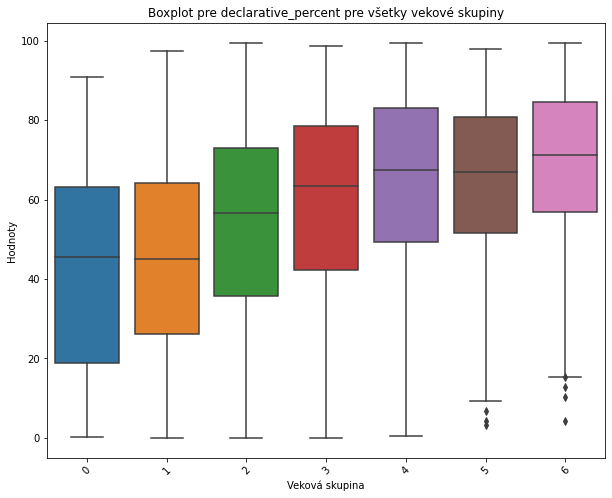

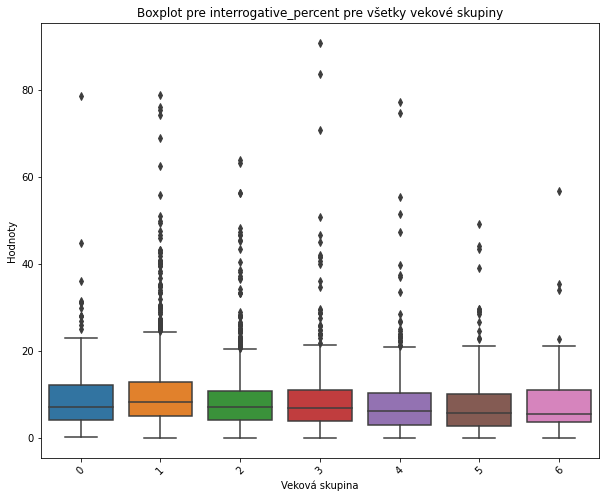

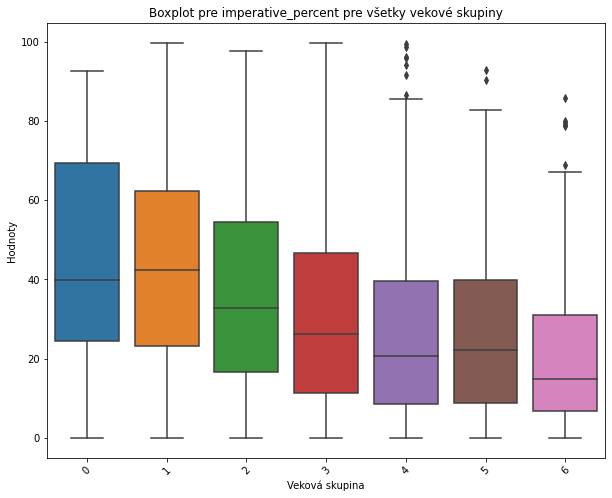

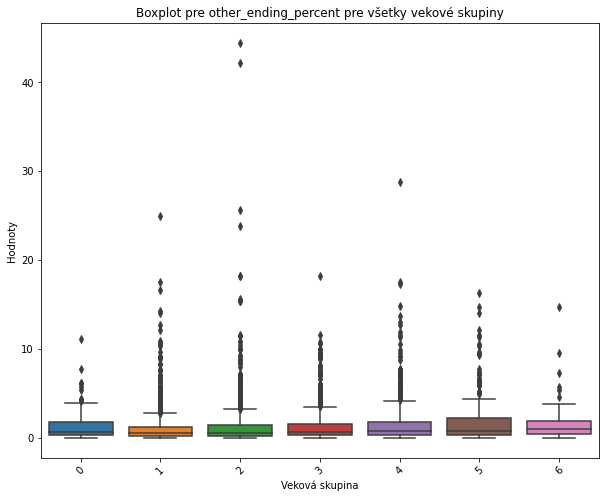

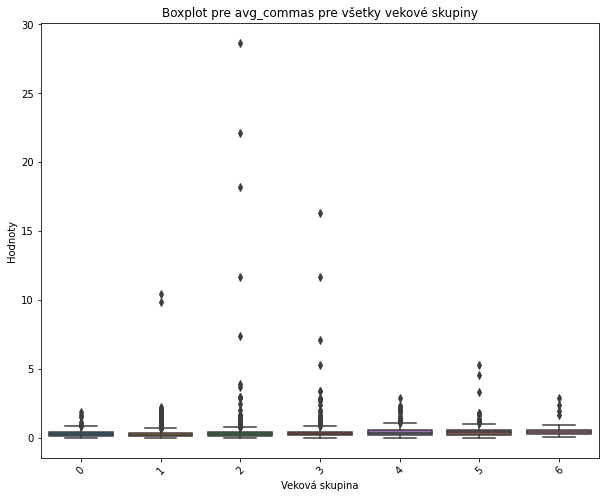

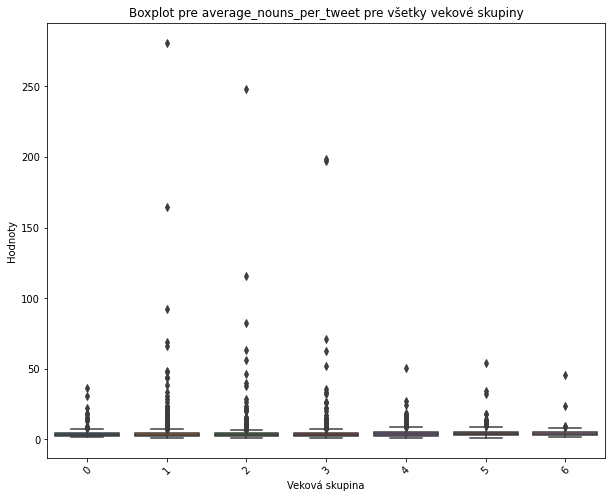

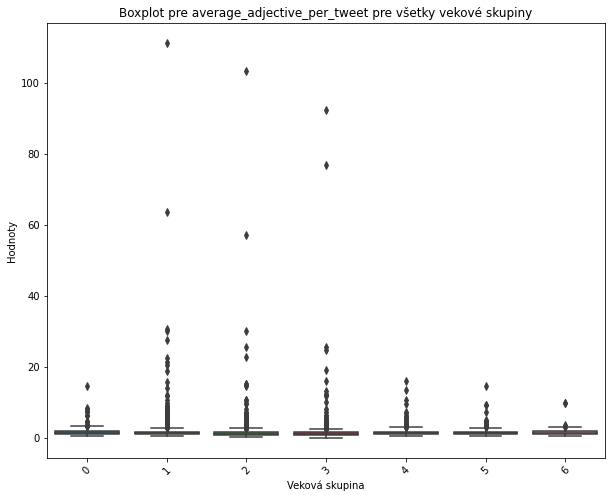

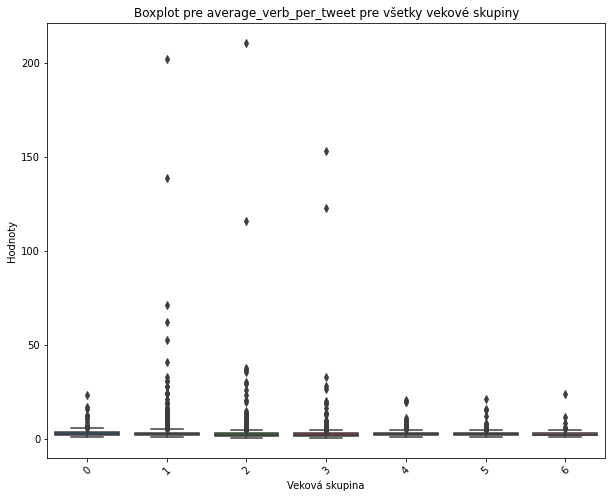

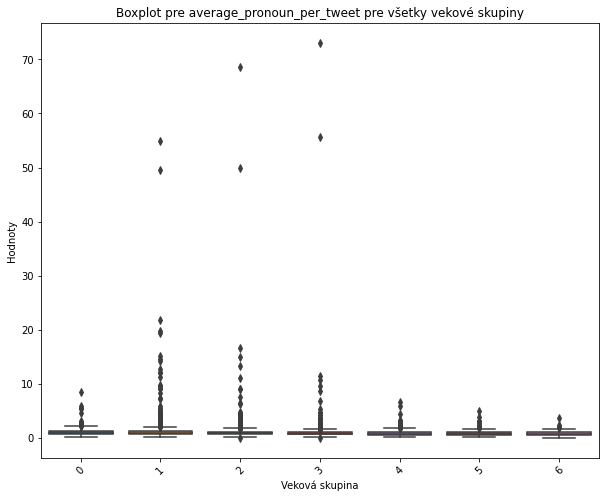

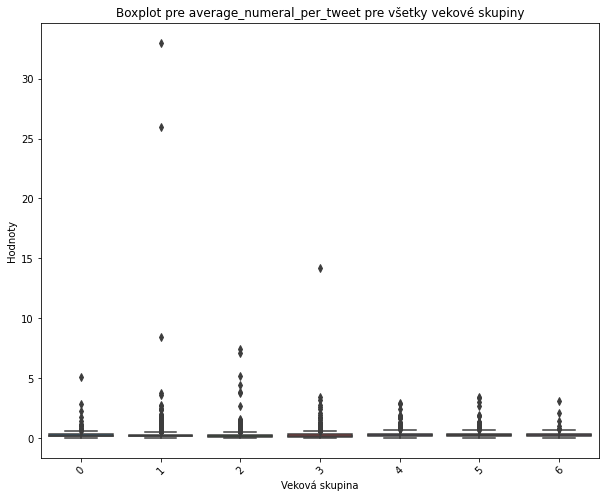

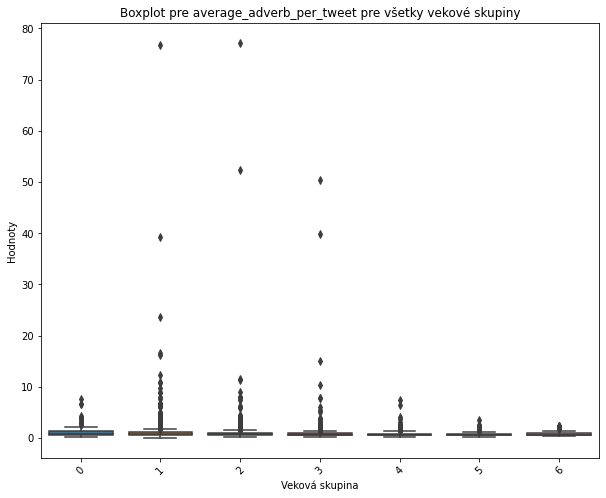

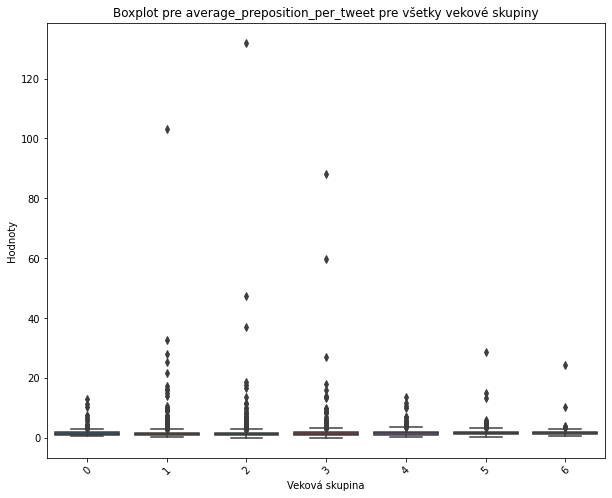

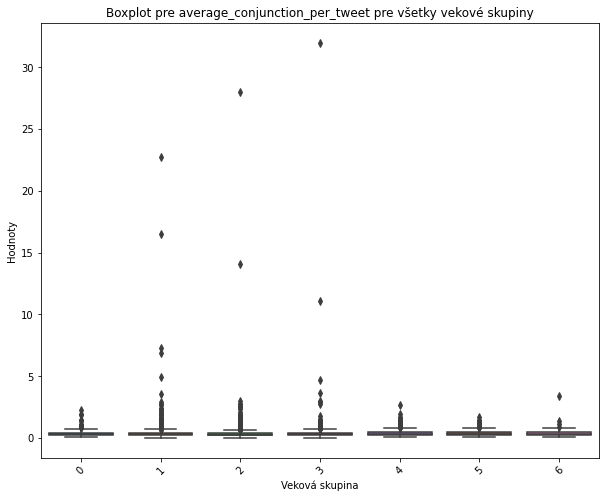

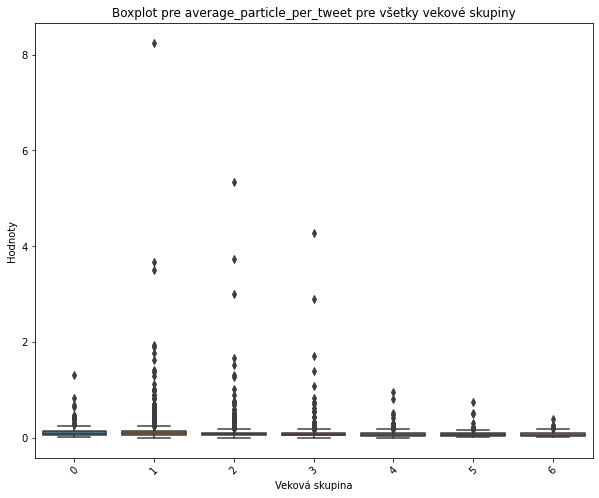

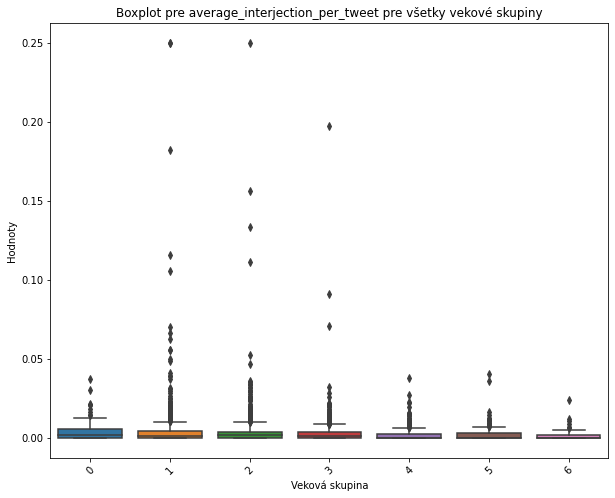

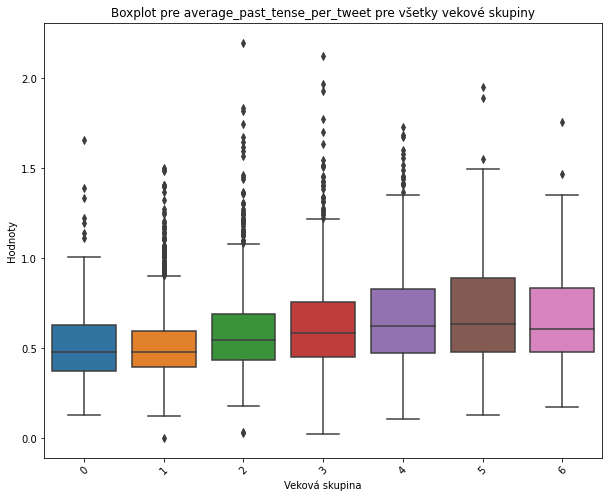

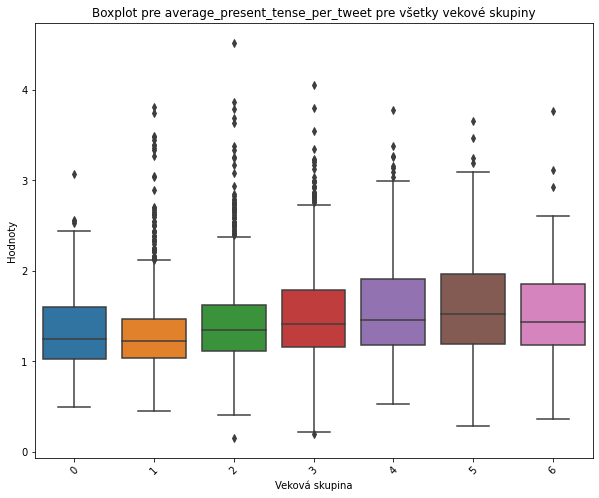

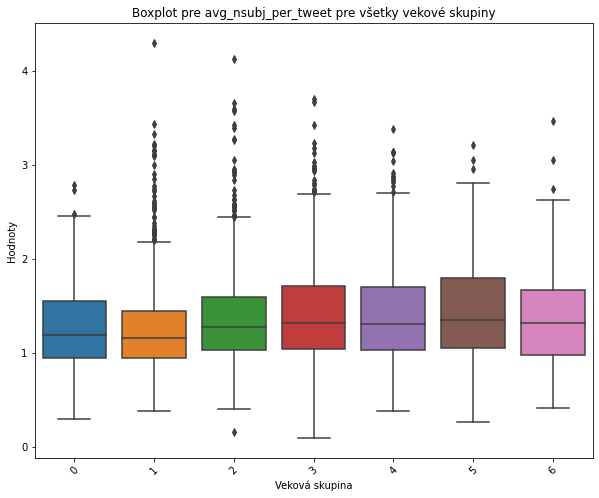

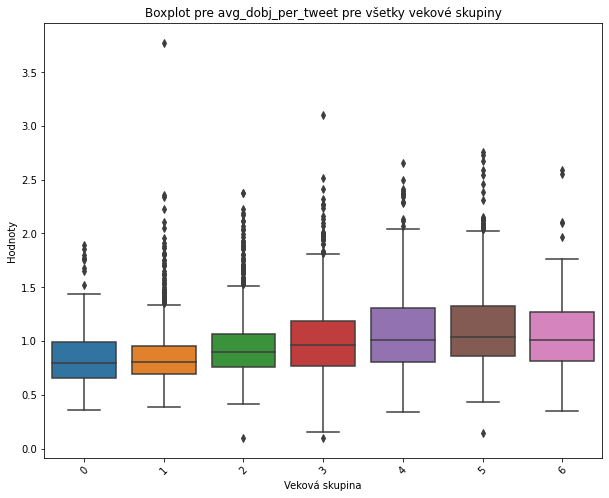

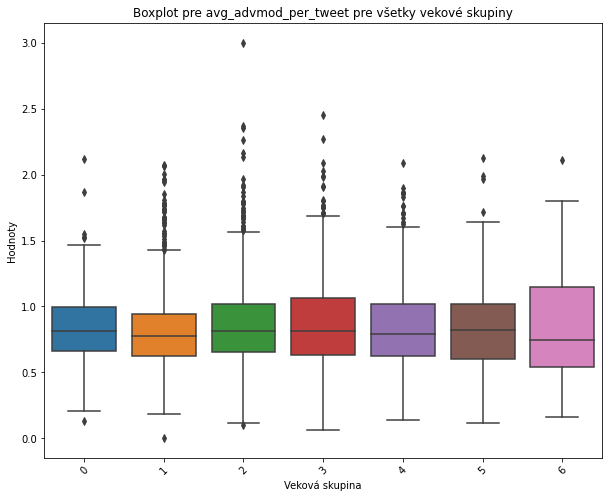

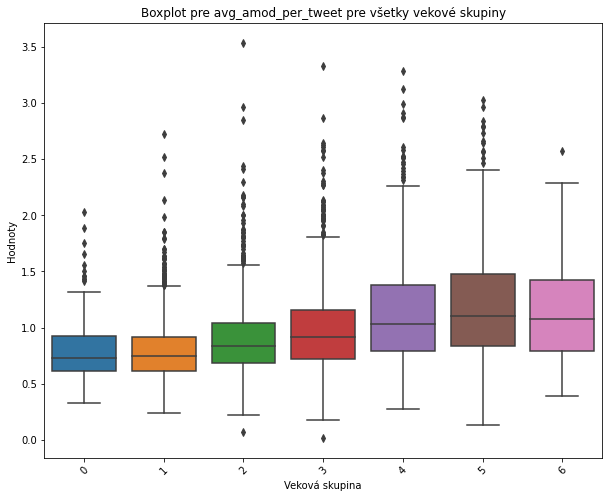

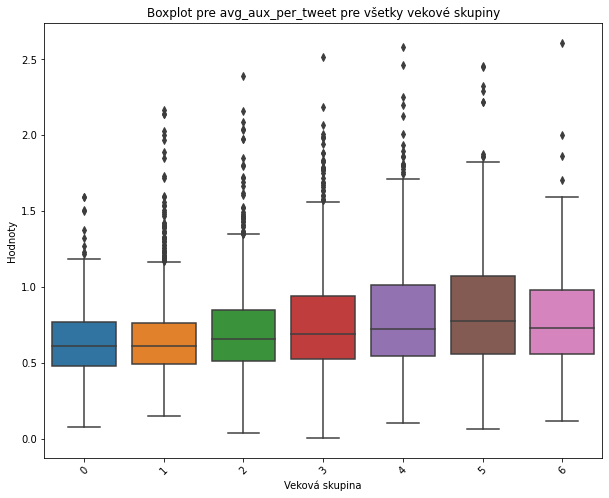

In [18]:
for column in columns:
    plt.figure(figsize=(10, 8))
    sns.boxplot(x='age_group', y=column, data=dataset)
    plt.title(f'Boxplot pre {column} pre všetky vekové skupiny')
    plt.ylabel('Hodnoty')
    plt.xlabel('Veková skupina')
    plt.xticks(rotation=45)
    plt.show()

Chceli sme zistiť outlierov pre každý slpcec a zároveň vekovú skupinu. Zistili sme si v celkom datasete (nie pre X_train a X_test oddelene, kedže tie hranice by sa mohli líšiť) hranice a mean pre každý stlpec a zároveň každú vekovú skupinu.

In [19]:
global_stats = {}
# Prechádza cez unikátne vekové skupiny v dátovom rámci
for age_group in dataset['age_group'].unique():
    # Prechádza cez zoznam stĺpcov, pre ktoré sa majú vypočítať štatistiky
    for column in columns:
        # Vyberie podmnožinu dát patriacu k aktuálnej vekovej skupine
        group_subset = dataset[dataset['age_group'] == age_group]
        # Vypočíta dolný limit ako 10. percentil hodnôt v aktuálnom stĺpci a vekovej skupine
        lower_limit = group_subset[column].quantile(0.10)
        # Vypočíta horny limit ako 90. percentil hodnôt v aktuálnom stĺpci a vekovej skupine
        upper_limit = group_subset[column].quantile(0.90)
        # Vypočítanie priemernej hodnoty pre dáta medzi dolným a horným limitom
        mean_value = group_subset[(group_subset[column] >= lower_limit) & (group_subset[column] <= upper_limit)][column].mean()
        # Uloženie vypočítaných štatistík do slovníka s kľúčom ako dvojica (veková skupina, názov stĺpca)
        global_stats[(age_group, column)] = (lower_limit, upper_limit, mean_value)

In [20]:
X_train_out = X_train.copy()
X_test_out = X_test.copy()

Následne sme si prvky v stlpcoch, ktoré su pod dolnou hranicou alebo za hornou hranocou nahranili meanom v trenovacom aj v testovacom datasete.

In [21]:
# Iteruje cez každý riadok datasetu
for index, row in X_train_out.iterrows():
    # Získa skupinu veku pre aktuálny riadok z iného DataFrame y_train pomocou indexu
    age_group = y_train.loc[index] 
    
    # Iteruje cez stlpce
    for column in columns:
        # Získa dolný a horný limit a priemernú hodnotu pre aktuálnu kombináciu vekovej skupiny a stĺpca z predtým vytvoreného slovníka global_stats
        lower_limit, upper_limit, mean_value = global_stats[(age_group, column)]
        
        # Ak je hodnota v aktuálnom riadku a stĺpci menšia ako dolný limit alebo väčšia ako horný limit,
        # nastaví hodnotu v tomto riadku a stĺpci na priemernú hodnotu pre túto skupinu
        if row[column] < lower_limit or row[column] > upper_limit:
            X_train_out.at[index, column] = mean_value

In [22]:
# Iteruje cez každý riadok datasetu
for index, row in X_test_out.iterrows():
     # Získa skupinu veku pre aktuálny riadok z iného DataFrame y_train pomocou indexu
    age_group = y_test.loc[index] 
    # Iteruje cez stlpce
    for column in columns:
         # Získa dolný a horný limit a priemernú hodnotu pre aktuálnu kombináciu vekovej skupiny a stĺpca z predtým vytvoreného slovníka global_stats
        lower_limit, upper_limit, mean_value = global_stats[(age_group, column)]
        # Ak je hodnota v aktuálnom riadku a stĺpci menšia ako dolný limit alebo väčšia ako horný limit,
        # nastaví hodnotu v tomto riadku a stĺpci na priemernú hodnotu pre túto skupinu
        if row[column] < lower_limit or row[column] > upper_limit:
            X_test_out.at[index, column] = mean_value

Spojenie s ngramami / tfidf n-gramami

In [23]:
X_train_combined_out = hstack([X_train_out, ngram_train])
X_test_combined_out = hstack([X_test_out, ngram_test])
X_train_combined2_out = hstack([X_train_out, ngram_train_tfidf])
X_test_combined2_out = hstack([X_test_out, ngram_test_tfidf])

S aplikovaným škálovaním

SKALOVANIE

Kedže množstvo mojích dát má iné rozsahy a niektoré algoritmy strojového učenia (najmä tie, ktoré sú založené na vzdialenosti ) ako napríklad SVC sú citlivé na rozsahy tak som sa rozhodla pre škálovanie. Škálovanie môže pomôcť zabezpečiť, že jeden atribút neovládne ostatné pri výpočte vzdialeností.

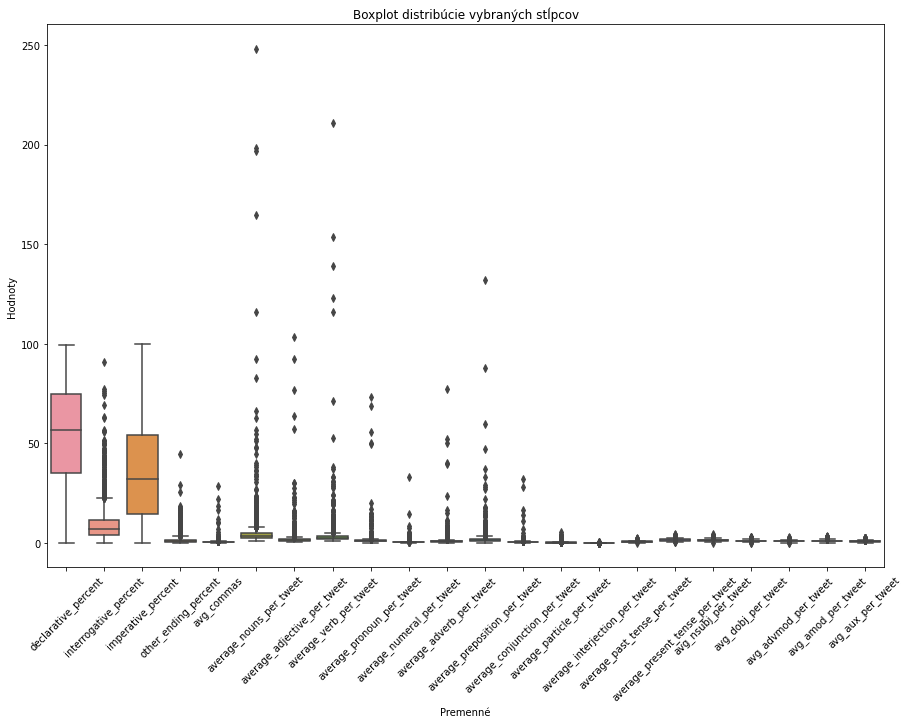

In [24]:
melted_df = pd.melt(X_train, value_vars=columns)
plt.figure(figsize=(15, 10))
sns.boxplot(x='variable', y='value', data=melted_df)
plt.xticks(rotation=45)
plt.title('Boxplot distribúcie vybraných stĺpcov')
plt.xlabel('Premenné')
plt.ylabel('Hodnoty')
plt.show()

In [25]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

Skalovala som si všetky numericke stpce a to tak, že som to fitla na trenovaci dataset a transormovala na obidvoch, aj na trenovacom aj testovacom

In [26]:
scaler = MinMaxScaler()
scaler.fit(X_train_scaled[columns])
X_train_scaled[columns] = scaler.transform(X_train_scaled[columns])
X_test_scaled[columns] = scaler.transform(X_test_scaled[columns])

Spojenie datasetu s ngramami / tfidf n-gramami

In [27]:
X_train_combined_scaled = hstack([X_train_scaled, ngram_train])
X_test_combined_scaled = hstack([X_test_scaled, ngram_test])
X_train_combined2_scaled = hstack([X_train_scaled, ngram_train_tfidf])
X_test_combined2_scaled = hstack([X_test_scaled, ngram_test_tfidf])

Zobrazili sme si zoskalovane data a vidíme, že sú v rovnakom rozmedzí, však nachádza sa tam množstvo outlierov

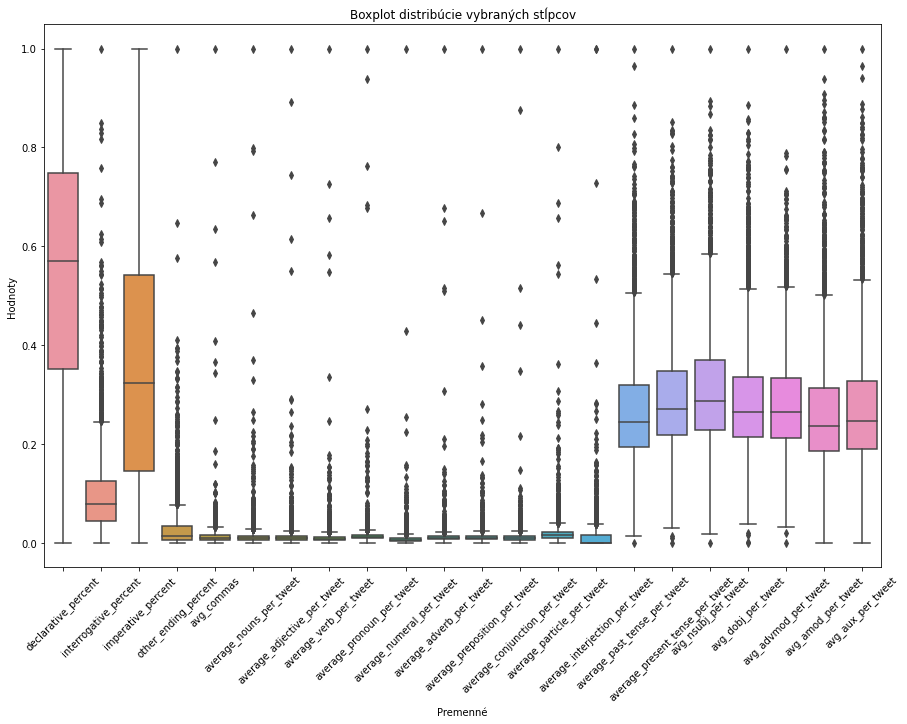

In [28]:
melted_df = pd.melt(X_train_scaled, value_vars=columns)

# Teraz použite Seaborn na zobrazenie distribúcií pomocou boxplotu
plt.figure(figsize=(15, 10))
sns.boxplot(x='variable', y='value', data=melted_df)
plt.xticks(rotation=45)
plt.title('Boxplot distribúcie vybraných stĺpcov')
plt.xlabel('Premenné')
plt.ylabel('Hodnoty')
plt.show()

S ošetrenými outliermi aj aplikovaným škálovaním

In [29]:
X_train_scal_out = X_train_out.copy()
X_test_scal_out = X_test_out.copy()

Zoškálujem si dataset s ošetrenými outliermi

In [30]:
scaler = MinMaxScaler()
scaler.fit(X_train_scaled[columns])
X_train_scal_out[columns] = scaler.transform(X_train_scal_out[columns])
X_test_scal_out[columns] = scaler.transform(X_test_scal_out[columns])

Spojím si dataset s ngramami / tfidf ngramami

In [31]:
X_train_combined_scal_out = hstack([X_train_scal_out, ngram_train])
X_test_combined_scal_out = hstack([X_test_scal_out, ngram_test])
X_train_combined2_scal_out = hstack([X_train_scal_out, ngram_train_tfidf])
X_test_combined2_scal_out = hstack([X_test_scal_out, ngram_test_tfidf])

TRENOVANIE 1 

Prvé trenovanie som vykonala so všetkými premennými (bez výberu črt) aby som videla aké výsledky môžem dostať. Vykonala som testovanie na 3 modeloch: Random Forest, GBM a SVC. Taktiež na každom modeli som skúsila rôzne varianty datasetu aby som videla s ktorým viem dosiahnúť najlepšie výsledky: bez ošetrenia outlierov a bez škálovania, bez ošetrenia outlierov a bez škálovania a s ngramami, bez ošetrenia outlierov a bez škálovania a s tfidf ngramami, s ošetrením outlierov, s ošetrením outlierov a s ngrami, s ošetrením outlierov a s tfidf ngramami, so škálovaním, so škálovaním a s ngramami, so škálovaním a s tfidf ngramami, s ošetrením outlierov a so škálovaním, s ošetrením outlierov a so škálovaním a s ngramami, s ošetrením outlierov a so škálovaním a s tfidf ngramami.

In [32]:
results_list1_svc=[]#na ukladanie testovacej a trenovacej accuracy

SVC - bez ošetrenia outlierov a skalovania

Trenovanie modelu

In [33]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

Predikovanie na trenovacich datach

In [34]:
y_pred_train = svc_model.predict(X_train)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))


Presnosť: 0.33102143757881464
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       134
           1       0.39      0.58      0.47       896
           2       0.29      0.53      0.38       856
           3       0.26      0.12      0.17       608
           4       0.00      0.00      0.00       416
           5       0.00      0.00      0.00       216
           6       0.00      0.00      0.00        46

    accuracy                           0.33      3172
   macro avg       0.13      0.18      0.14      3172
weighted avg       0.24      0.33      0.27      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Predikovanie na testovacich datach

In [35]:
y_pred = svc_model.predict(X_test)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.41      0.57      0.48       413
           2       0.29      0.53      0.37       369
           3       0.24      0.10      0.14       262
           4       0.00      0.00      0.00       146
           5       0.00      0.00      0.00        87
           6       0.00      0.00      0.00        25

    accuracy                           0.34      1360
   macro avg       0.13      0.17      0.14      1360
weighted avg       0.25      0.34      0.27      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


uloženie trenovacej a testovacej accuracy do poľa s výsledkami z prveho testovania pre svc

In [36]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })


Zobrazenie metrik

In [37]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.3f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))


Accuracy: 0.337
Recall: 0.17
Precision: 0.13
F1 Score: 0.14


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Vizualizácia výkonnosti modelu

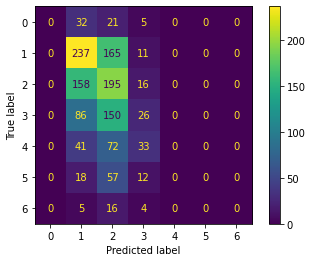

In [38]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - bez ošetrenia outlierov a skalovania a ngram

In [39]:
svc_model = SVC()
svc_model.fit(X_train_combined, y_train)

SVC()

In [40]:
y_pred_train = svc_model.predict(X_train_combined)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.4489281210592686
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       134
           1       0.56      0.70      0.62       896
           2       0.36      0.64      0.46       856
           3       0.41      0.21      0.28       608
           4       0.49      0.25      0.33       416
           5       0.93      0.06      0.12       216
           6       0.00      0.00      0.00        46

    accuracy                           0.45      3172
   macro avg       0.39      0.27      0.26      3172
weighted avg       0.46      0.45      0.41      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
y_pred = svc_model.predict(X_test_combined)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.55      0.67      0.60       413
           2       0.33      0.59      0.43       369
           3       0.25      0.12      0.16       262
           4       0.40      0.23      0.29       146
           5       1.00      0.01      0.02        87
           6       0.00      0.00      0.00        25

    accuracy                           0.41      1360
   macro avg       0.36      0.23      0.22      1360
weighted avg       0.41      0.41      0.36      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [43]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.41
Recall: 0.23
Precision: 0.36
F1 Score: 0.22


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


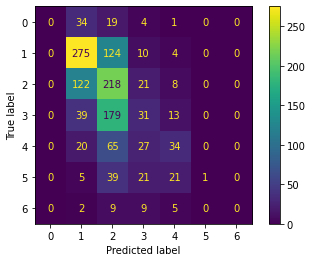

In [44]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - bez ošetrenia outlierov a skalovania a tfidf ngram

In [45]:
svc_model = SVC()
svc_model.fit(X_train_combined2, y_train)

SVC()

In [46]:
y_pred_train = svc_model.predict(X_train_combined2)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.32786885245901637
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       134
           1       0.39      0.58      0.47       896
           2       0.28      0.54      0.37       856
           3       0.26      0.08      0.13       608
           4       0.00      0.00      0.00       416
           5       0.00      0.00      0.00       216
           6       0.00      0.00      0.00        46

    accuracy                           0.33      3172
   macro avg       0.13      0.17      0.14      3172
weighted avg       0.24      0.33      0.26      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
y_pred = svc_model.predict(X_test_combined2)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.41      0.57      0.48       413
           2       0.28      0.54      0.37       369
           3       0.26      0.06      0.10       262
           4       0.00      0.00      0.00       146
           5       0.00      0.00      0.00        87
           6       0.00      0.00      0.00        25

    accuracy                           0.33      1360
   macro avg       0.14      0.17      0.14      1360
weighted avg       0.25      0.33      0.26      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })


In [49]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))


Accuracy: 0.33
Recall: 0.17
Precision: 0.14
F1 Score: 0.14


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


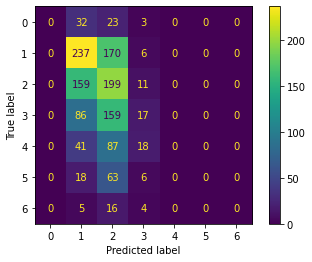

In [50]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - s ošetrím outlierov

In [51]:
svc_model = SVC()
svc_model.fit(X_train_out, y_train)

SVC()

In [52]:
y_pred_train = svc_model.predict(X_train_out)
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       134
           1       0.50      0.70      0.58       896
           2       0.32      0.52      0.40       856
           3       0.29      0.25      0.26       608
           4       0.00      0.00      0.00       416
           5       0.00      0.00      0.00       216
           6       0.00      0.00      0.00        46

    accuracy                           0.39      3172
   macro avg       0.16      0.21      0.18      3172
weighted avg       0.28      0.39      0.32      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
y_pred = svc_model.predict(X_test_out)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.51      0.66      0.57       413
           2       0.31      0.49      0.38       369
           3       0.26      0.23      0.24       262
           4       0.00      0.00      0.00       146
           5       0.00      0.00      0.00        87
           6       0.00      0.00      0.00        25

    accuracy                           0.38      1360
   macro avg       0.15      0.20      0.17      1360
weighted avg       0.29      0.38      0.32      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })


In [55]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.38
Recall: 0.20
Precision: 0.15
F1 Score: 0.17


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


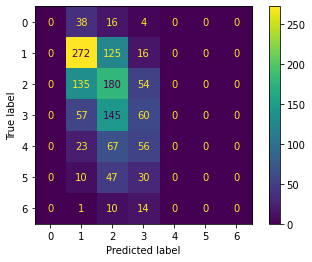

In [56]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - s ošetrím outlierov a ngram

In [57]:
svc_model = SVC()
svc_model.fit(X_train_combined_out, y_train)

SVC()

In [58]:
y_pred_train = svc_model.predict(X_train_combined_out)
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       134
           1       0.61      0.72      0.66       896
           2       0.37      0.66      0.47       856
           3       0.39      0.22      0.28       608
           4       0.49      0.26      0.34       416
           5       0.93      0.06      0.12       216
           6       0.00      0.00      0.00        46

    accuracy                           0.46      3172
   macro avg       0.40      0.27      0.27      3172
weighted avg       0.47      0.46      0.42      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
y_pred = svc_model.predict(X_test_combined_out)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.60      0.65      0.62       413
           2       0.34      0.63      0.44       369
           3       0.27      0.14      0.19       262
           4       0.40      0.25      0.31       146
           5       1.00      0.01      0.02        87
           6       0.00      0.00      0.00        25

    accuracy                           0.42      1360
   macro avg       0.37      0.24      0.23      1360
weighted avg       0.43      0.42      0.38      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [61]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.42
Recall: 0.24
Precision: 0.37
F1 Score: 0.23


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


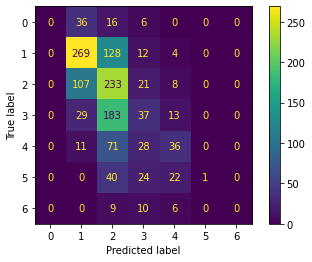

In [62]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - s ošetrím outlierov a tfidf ngram

In [63]:
svc_model = SVC()
svc_model.fit(X_train_combined2_out, y_train)

SVC()

In [64]:
y_pred_train = svc_model.predict(X_train_combined2_out)
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       134
           1       0.50      0.70      0.58       896
           2       0.32      0.53      0.40       856
           3       0.29      0.24      0.26       608
           4       0.00      0.00      0.00       416
           5       0.00      0.00      0.00       216
           6       0.00      0.00      0.00        46

    accuracy                           0.39      3172
   macro avg       0.16      0.21      0.18      3172
weighted avg       0.28      0.39      0.32      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
y_pred = svc_model.predict(X_test_combined2_out)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.51      0.66      0.57       413
           2       0.31      0.49      0.38       369
           3       0.26      0.23      0.24       262
           4       0.00      0.00      0.00       146
           5       0.00      0.00      0.00        87
           6       0.00      0.00      0.00        25

    accuracy                           0.38      1360
   macro avg       0.15      0.20      0.17      1360
weighted avg       0.29      0.38      0.32      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [67]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.38
Recall: 0.20
Precision: 0.15
F1 Score: 0.17


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


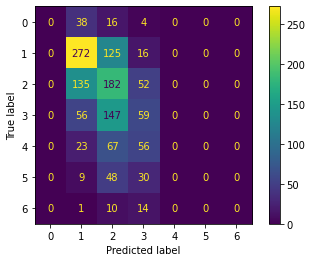

In [68]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - so skalovanim

In [69]:
svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

SVC()

In [70]:
y_pred_train = svc_model.predict(X_train_scaled)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.3682219419924338
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       134
           1       0.44      0.64      0.52       896
           2       0.31      0.56      0.40       856
           3       0.32      0.09      0.14       608
           4       0.36      0.15      0.21       416
           5       0.00      0.00      0.00       216
           6       0.00      0.00      0.00        46

    accuracy                           0.37      3172
   macro avg       0.21      0.21      0.18      3172
weighted avg       0.32      0.37      0.31      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
y_pred = svc_model.predict(X_test_scaled)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.35808823529411765
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.45      0.58      0.51       413
           2       0.30      0.57      0.39       369
           3       0.22      0.05      0.08       262
           4       0.38      0.16      0.23       146
           5       0.00      0.00      0.00        87
           6       0.00      0.00      0.00        25

    accuracy                           0.36      1360
   macro avg       0.19      0.19      0.17      1360
weighted avg       0.30      0.36      0.30      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [73]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.36
Recall: 0.19
Precision: 0.19
F1 Score: 0.17


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


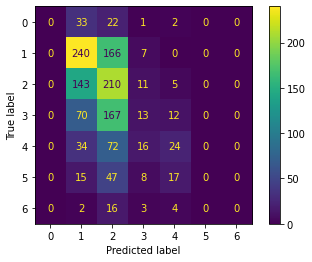

In [74]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - so skalovanim a ngram

In [75]:
svc_model = SVC()
svc_model.fit(X_train_combined_scaled, y_train)

SVC()

In [76]:
y_pred_train = svc_model.predict(X_train_combined_scaled)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.44703656998738966
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       134
           1       0.55      0.73      0.62       896
           2       0.37      0.61      0.46       856
           3       0.39      0.20      0.27       608
           4       0.49      0.25      0.33       416
           5       0.93      0.06      0.12       216
           6       0.00      0.00      0.00        46

    accuracy                           0.45      3172
   macro avg       0.39      0.27      0.26      3172
weighted avg       0.46      0.45      0.40      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [77]:
y_pred = svc_model.predict(X_test_combined_scaled)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.42205882352941176
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.55      0.69      0.61       413
           2       0.35      0.60      0.44       369
           3       0.26      0.12      0.17       262
           4       0.39      0.23      0.29       146
           5       0.50      0.01      0.02        87
           6       0.00      0.00      0.00        25

    accuracy                           0.42      1360
   macro avg       0.29      0.24      0.22      1360
weighted avg       0.39      0.42      0.37      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [79]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.42
Recall: 0.24
Precision: 0.29
F1 Score: 0.22


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


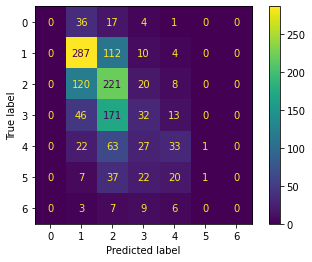

In [80]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - so skalovanim a tfidf ngram

In [81]:
svc_model = SVC()
svc_model.fit(X_train_combined2_scaled, y_train)

SVC()

In [82]:
y_pred_train = svc_model.predict(X_train_combined2_scaled)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.4451450189155107
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       134
           1       0.60      0.66      0.62       896
           2       0.37      0.68      0.48       856
           3       0.38      0.21      0.27       608
           4       0.41      0.27      0.33       416
           5       1.00      0.01      0.03       216
           6       0.00      0.00      0.00        46

    accuracy                           0.45      3172
   macro avg       0.39      0.26      0.25      3172
weighted avg       0.46      0.45      0.40      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [83]:
y_pred = svc_model.predict(X_test_combined2_scaled)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4139705882352941
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.58      0.63      0.60       413
           2       0.34      0.63      0.44       369
           3       0.29      0.15      0.19       262
           4       0.35      0.23      0.28       146
           5       0.00      0.00      0.00        87
           6       0.00      0.00      0.00        25

    accuracy                           0.41      1360
   macro avg       0.22      0.23      0.22      1360
weighted avg       0.36      0.41      0.37      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [84]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [85]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.41
Recall: 0.23
Precision: 0.22
F1 Score: 0.22


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


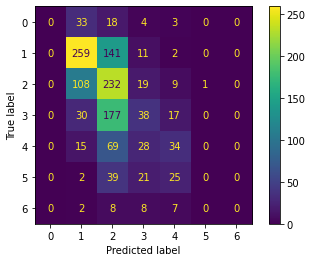

In [86]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - s ošetrim outlierov a skalovanim

In [87]:
svc_model = SVC()
svc_model.fit(X_train_scal_out, y_train)

SVC()

In [88]:
y_pred_train = svc_model.predict(X_train_scal_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.3871374527112232
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       134
           1       0.50      0.70      0.58       896
           2       0.32      0.52      0.40       856
           3       0.29      0.25      0.26       608
           4       0.00      0.00      0.00       416
           5       0.00      0.00      0.00       216
           6       0.00      0.00      0.00        46

    accuracy                           0.39      3172
   macro avg       0.16      0.21      0.18      3172
weighted avg       0.28      0.39      0.32      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [89]:
y_pred = svc_model.predict(X_test_scal_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.3764705882352941
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.51      0.66      0.57       413
           2       0.31      0.49      0.38       369
           3       0.26      0.23      0.24       262
           4       0.00      0.00      0.00       146
           5       0.00      0.00      0.00        87
           6       0.00      0.00      0.00        25

    accuracy                           0.38      1360
   macro avg       0.15      0.20      0.17      1360
weighted avg       0.29      0.38      0.32      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [90]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })


In [91]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.38
Recall: 0.20
Precision: 0.15
F1 Score: 0.17


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


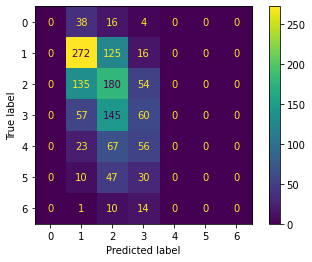

In [92]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - s ošetrim outlierov a skalovanim a ngram

In [93]:
svc_model = SVC()
svc_model.fit(X_train_combined_scal_out, y_train)

SVC()

In [94]:
y_pred_train = svc_model.predict(X_train_combined_scal_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.46027742749054223
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       134
           1       0.61      0.72      0.66       896
           2       0.37      0.66      0.47       856
           3       0.39      0.22      0.28       608
           4       0.49      0.26      0.34       416
           5       0.93      0.06      0.12       216
           6       0.00      0.00      0.00        46

    accuracy                           0.46      3172
   macro avg       0.40      0.27      0.27      3172
weighted avg       0.47      0.46      0.42      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [95]:
y_pred = svc_model.predict(X_test_combined_scal_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4235294117647059
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.60      0.65      0.62       413
           2       0.34      0.63      0.44       369
           3       0.27      0.14      0.19       262
           4       0.40      0.25      0.31       146
           5       1.00      0.01      0.02        87
           6       0.00      0.00      0.00        25

    accuracy                           0.42      1360
   macro avg       0.37      0.24      0.23      1360
weighted avg       0.43      0.42      0.38      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [96]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [97]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.42
Recall: 0.24
Precision: 0.37
F1 Score: 0.23


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


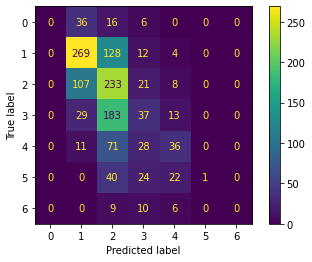

In [98]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - s ošetrim outlierov a skalovanim a tfidf ngram

In [99]:
svc_model = SVC()
svc_model.fit(X_train_combined2_scal_out, y_train)

SVC()

In [100]:
y_pred_train = svc_model.predict(X_train_combined2_scal_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.38776796973518285
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       134
           1       0.50      0.70      0.58       896
           2       0.32      0.53      0.40       856
           3       0.29      0.24      0.26       608
           4       0.00      0.00      0.00       416
           5       0.00      0.00      0.00       216
           6       0.00      0.00      0.00        46

    accuracy                           0.39      3172
   macro avg       0.16      0.21      0.18      3172
weighted avg       0.28      0.39      0.32      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [101]:
y_pred = svc_model.predict(X_test_combined2_scal_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.37720588235294117
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.51      0.66      0.57       413
           2       0.31      0.49      0.38       369
           3       0.26      0.23      0.24       262
           4       0.00      0.00      0.00       146
           5       0.00      0.00      0.00        87
           6       0.00      0.00      0.00        25

    accuracy                           0.38      1360
   macro avg       0.15      0.20      0.17      1360
weighted avg       0.29      0.38      0.32      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [102]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [103]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.38
Recall: 0.20
Precision: 0.15
F1 Score: 0.17


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


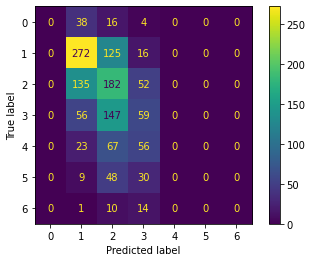

In [104]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

In [105]:
results_svc1 = pd.DataFrame(results_list1_svc)
print(results_svc1)

    accuracy_train  accuracy_test
0         0.331021       0.336765
1         0.448928       0.411029
2         0.327869       0.333088
3         0.387137       0.376471
4         0.460277       0.423529
5         0.387768       0.377206
6         0.368222       0.358088
7         0.447037       0.422059
8         0.445145       0.413971
9         0.387137       0.376471
10        0.460277       0.423529
11        0.387768       0.377206


Podľa výsledkov po prvom testovani svc môžeme vidieť, že najlepší výsledok mal dataset s ošetrenými outliermi s ngram a s  ošetrenými outliermi so skalovanim s ngram. Takže je zrejme, že najväčší vplyv na úspešnosť malo ošetrenie outlierov a pridanie textovej reprezentácie n-gram. Aj ked sme použili všetký dáta, tak model nevyzerá byť pretrénovaný, kedže trénovacie accuracy nie je priveľmi vysoké oproti trénovacému accuracy. Zatiaľ tento model nevykazuje vysokú presnosť.

RANDOM FOREST - bez ošetrenia outlierov a skalovania

In [106]:
results_list1_rf=[] #na ukladanie trenovacej a testovacej accuracy

Trenovanie modelu na trenovacich datach

In [107]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train) 

RandomForestClassifier()

Predikovanie na trenovacich datach

In [108]:
y_pred_train = rf_model.predict(X_train)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       896
           2       1.00      1.00      1.00       856
           3       1.00      1.00      1.00       608
           4       1.00      1.00      1.00       416
           5       1.00      1.00      1.00       216
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



Predikovanie na testovacich datach

In [109]:
y_pred = rf_model.predict(X_test)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.3610294117647059
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.48      0.64      0.55       413
           2       0.30      0.39      0.34       369
           3       0.24      0.19      0.21       262
           4       0.27      0.21      0.24       146
           5       0.21      0.03      0.06        87
           6       0.00      0.00      0.00        25

    accuracy                           0.36      1360
   macro avg       0.22      0.21      0.20      1360
weighted avg       0.32      0.36      0.33      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [110]:
results_list1_rf.append({#uloženie trenovaceho a testovaceho accuracy
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })


Zobrazenie metrik

In [111]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro') 
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.36
Recall: 0.21
Precision: 0.22
F1 Score: 0.20


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Vizualizácia výkonnosti modelu

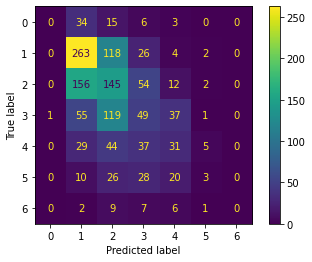

In [112]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - bez ošetrenia outlierov a skalovania a ngram

In [113]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined, y_train)

RandomForestClassifier()

In [114]:
y_pred_train = rf_model.predict(X_train_combined)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       896
           2       1.00      1.00      1.00       856
           3       1.00      1.00      1.00       608
           4       1.00      1.00      1.00       416
           5       1.00      1.00      1.00       216
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [115]:
y_pred = rf_model.predict(X_test_combined)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.41544117647058826
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.54      0.68      0.60       413
           2       0.35      0.53      0.42       369
           3       0.32      0.24      0.28       262
           4       0.30      0.16      0.21       146
           5       0.10      0.01      0.02        87
           6       0.00      0.00      0.00        25

    accuracy                           0.42      1360
   macro avg       0.23      0.23      0.22      1360
weighted avg       0.36      0.42      0.38      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [116]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [117]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.42
Recall: 0.23
Precision: 0.23
F1 Score: 0.22


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


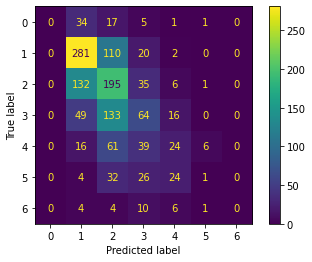

In [118]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - bez ošetrenia outlierov a skalovania a tfidf ngram

In [119]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined2, y_train)

RandomForestClassifier()

In [120]:
y_pred_train = rf_model.predict(X_train_combined2)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       896
           2       1.00      1.00      1.00       856
           3       1.00      1.00      1.00       608
           4       1.00      1.00      1.00       416
           5       1.00      1.00      1.00       216
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [121]:
y_pred = rf_model.predict(X_test_combined2)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4235294117647059
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.55      0.70      0.62       413
           2       0.36      0.51      0.42       369
           3       0.32      0.23      0.26       262
           4       0.33      0.25      0.28       146
           5       0.18      0.02      0.04        87
           6       0.00      0.00      0.00        25

    accuracy                           0.42      1360
   macro avg       0.25      0.24      0.23      1360
weighted avg       0.37      0.42      0.39      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [122]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [123]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.42
Recall: 0.24
Precision: 0.25
F1 Score: 0.23


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


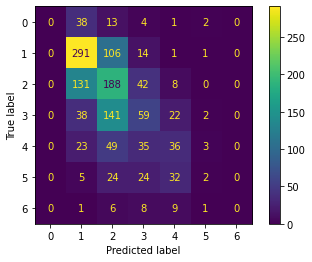

In [124]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - s ošetrenim outlierov

In [125]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_out, y_train)

RandomForestClassifier()

In [126]:
y_pred_train = rf_model.predict(X_train_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       896
           2       1.00      1.00      1.00       856
           3       1.00      1.00      1.00       608
           4       1.00      1.00      1.00       416
           5       1.00      1.00      1.00       216
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [127]:
y_pred = rf_model.predict(X_test_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.7323529411764705
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.10      0.19        58
           1       0.77      0.87      0.82       413
           2       0.70      0.84      0.76       369
           3       0.74      0.74      0.74       262
           4       0.66      0.66      0.66       146
           5       0.84      0.31      0.45        87
           6       0.00      0.00      0.00        25

    accuracy                           0.73      1360
   macro avg       0.67      0.51      0.52      1360
weighted avg       0.73      0.73      0.71      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [128]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [129]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.73
Recall: 0.51
Precision: 0.67
F1 Score: 0.52


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


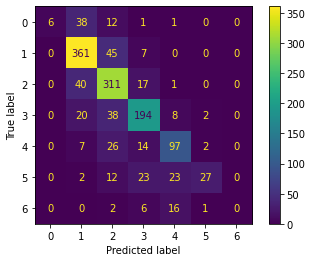

In [130]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - s ošetrenim outlierov a ngram

In [131]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined_out, y_train)

RandomForestClassifier()

In [132]:
y_pred_train = rf_model.predict(X_train_combined_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       896
           2       1.00      1.00      1.00       856
           3       1.00      1.00      1.00       608
           4       1.00      1.00      1.00       416
           5       1.00      1.00      1.00       216
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [133]:
y_pred = rf_model.predict(X_test_combined_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.6191176470588236
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.70      0.81      0.76       413
           2       0.56      0.80      0.66       369
           3       0.64      0.55      0.59       262
           4       0.49      0.42      0.45       146
           5       0.71      0.06      0.11        87
           6       0.00      0.00      0.00        25

    accuracy                           0.62      1360
   macro avg       0.44      0.38      0.37      1360
weighted avg       0.59      0.62      0.58      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [134]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [135]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.62
Recall: 0.38
Precision: 0.44
F1 Score: 0.37


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


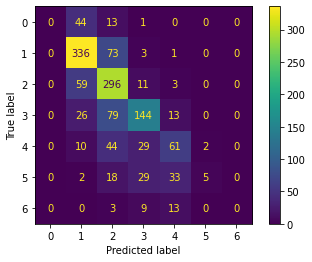

In [136]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - s ošetrenim outlierov a tfidf ngram

In [137]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined2_out, y_train)

RandomForestClassifier()

In [138]:
y_pred_train = rf_model.predict(X_train_combined2_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       896
           2       1.00      1.00      1.00       856
           3       1.00      1.00      1.00       608
           4       1.00      1.00      1.00       416
           5       1.00      1.00      1.00       216
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [139]:
y_pred = rf_model.predict(X_test_combined2_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.5860294117647059
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.67      0.84      0.74       413
           2       0.52      0.72      0.60       369
           3       0.59      0.46      0.52       262
           4       0.50      0.40      0.44       146
           5       1.00      0.07      0.13        87
           6       0.00      0.00      0.00        25

    accuracy                           0.59      1360
   macro avg       0.47      0.36      0.35      1360
weighted avg       0.57      0.59      0.54      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [140]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [141]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.59
Recall: 0.36
Precision: 0.47
F1 Score: 0.35


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


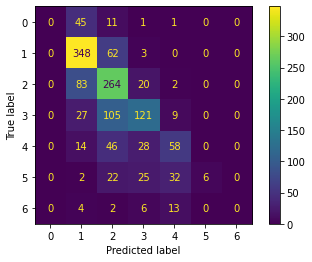

In [142]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - so skalovanim

In [143]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [144]:
y_pred_train = rf_model.predict(X_train_scaled)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       896
           2       1.00      1.00      1.00       856
           3       1.00      1.00      1.00       608
           4       1.00      1.00      1.00       416
           5       1.00      1.00      1.00       216
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [145]:
y_pred = rf_model.predict(X_test_scaled)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.36470588235294116
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.50      0.02      0.03        58
           1       0.47      0.61      0.53       413
           2       0.30      0.41      0.35       369
           3       0.30      0.23      0.26       262
           4       0.27      0.20      0.23       146
           5       0.14      0.02      0.04        87
           6       0.00      0.00      0.00        25

    accuracy                           0.36      1360
   macro avg       0.28      0.21      0.21      1360
weighted avg       0.34      0.36      0.34      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [146]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [147]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.36
Recall: 0.21
Precision: 0.28
F1 Score: 0.21


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


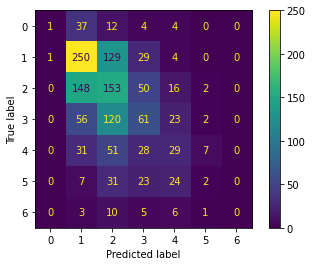

In [148]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - so skalovanim a ngram

In [149]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined_scaled, y_train)

RandomForestClassifier()

In [150]:
y_pred_train = rf_model.predict(X_train_combined_scaled)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       896
           2       1.00      1.00      1.00       856
           3       1.00      1.00      1.00       608
           4       1.00      1.00      1.00       416
           5       1.00      1.00      1.00       216
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [151]:
y_pred = rf_model.predict(X_test_combined_scaled)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4073529411764706
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.53      0.68      0.59       413
           2       0.33      0.49      0.39       369
           3       0.30      0.19      0.23       262
           4       0.38      0.28      0.32       146
           5       0.33      0.02      0.04        87
           6       0.00      0.00      0.00        25

    accuracy                           0.41      1360
   macro avg       0.27      0.24      0.23      1360
weighted avg       0.37      0.41      0.37      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [152]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [153]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.41
Recall: 0.24
Precision: 0.27
F1 Score: 0.23


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


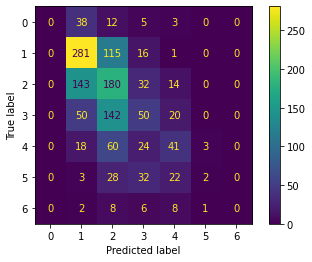

In [154]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - so skalovanim a tfidf ngram

In [155]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined2_scaled, y_train)

RandomForestClassifier()

In [156]:
y_pred_train = rf_model.predict(X_train_combined2_scaled)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       896
           2       1.00      1.00      1.00       856
           3       1.00      1.00      1.00       608
           4       1.00      1.00      1.00       416
           5       1.00      1.00      1.00       216
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [157]:
y_pred = rf_model.predict(X_test_combined2_scaled)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.43529411764705883
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.55      0.71      0.62       413
           2       0.35      0.51      0.41       369
           3       0.36      0.25      0.30       262
           4       0.40      0.27      0.33       146
           5       0.50      0.06      0.10        87
           6       0.00      0.00      0.00        25

    accuracy                           0.44      1360
   macro avg       0.31      0.26      0.25      1360
weighted avg       0.41      0.44      0.40      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [158]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [159]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.44
Recall: 0.26
Precision: 0.31
F1 Score: 0.25


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


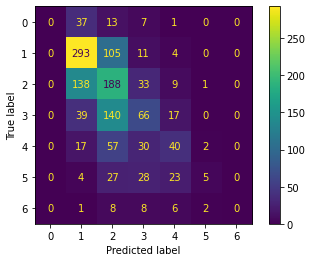

In [160]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - s ošetrením outlierov a skalovanim

In [161]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scal_out, y_train)

RandomForestClassifier()

In [162]:
y_pred_train = rf_model.predict(X_train_scal_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       896
           2       1.00      1.00      1.00       856
           3       1.00      1.00      1.00       608
           4       1.00      1.00      1.00       416
           5       1.00      1.00      1.00       216
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [163]:
y_pred = rf_model.predict(X_test_scal_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.7073529411764706
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.09      0.16        58
           1       0.75      0.86      0.80       413
           2       0.68      0.81      0.74       369
           3       0.71      0.70      0.71       262
           4       0.62      0.67      0.64       146
           5       0.85      0.26      0.40        87
           6       0.00      0.00      0.00        25

    accuracy                           0.71      1360
   macro avg       0.66      0.48      0.49      1360
weighted avg       0.71      0.71      0.68      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [164]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [165]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.71
Recall: 0.48
Precision: 0.66
F1 Score: 0.49


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


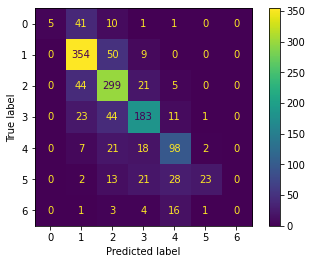

In [166]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - s ošetrením outlierov a skalovanim a ngram

In [167]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined_scal_out, y_train)

RandomForestClassifier()

In [168]:
y_pred_train = rf_model.predict(X_train_combined_scal_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       896
           2       1.00      1.00      1.00       856
           3       1.00      1.00      1.00       608
           4       1.00      1.00      1.00       416
           5       1.00      1.00      1.00       216
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [169]:
y_pred = rf_model.predict(X_test_combined_scal_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.6044117647058823
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.69      0.81      0.74       413
           2       0.54      0.78      0.63       369
           3       0.63      0.51      0.56       262
           4       0.54      0.42      0.47       146
           5       0.67      0.07      0.12        87
           6       0.00      0.00      0.00        25

    accuracy                           0.60      1360
   macro avg       0.44      0.37      0.36      1360
weighted avg       0.57      0.60      0.56      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [170]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [171]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.60
Recall: 0.37
Precision: 0.44
F1 Score: 0.36


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


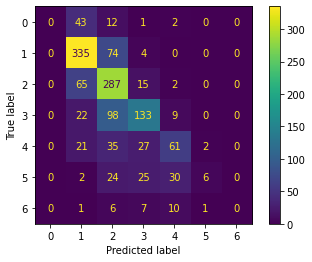

In [172]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - s ošetrením outlierov a skalovanim a tfidf ngram

In [173]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined2_scal_out, y_train)

RandomForestClassifier()

In [174]:
y_pred_train = rf_model.predict(X_train_combined2_scal_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       896
           2       1.00      1.00      1.00       856
           3       1.00      1.00      1.00       608
           4       1.00      1.00      1.00       416
           5       1.00      1.00      1.00       216
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [175]:
y_pred = rf_model.predict(X_test_combined2_scal_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.5897058823529412
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.67      0.82      0.74       413
           2       0.52      0.75      0.61       369
           3       0.60      0.47      0.53       262
           4       0.53      0.38      0.44       146
           5       0.75      0.07      0.13        87
           6       0.00      0.00      0.00        25

    accuracy                           0.59      1360
   macro avg       0.44      0.36      0.35      1360
weighted avg       0.56      0.59      0.55      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [176]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [177]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.59
Recall: 0.36
Precision: 0.44
F1 Score: 0.35


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


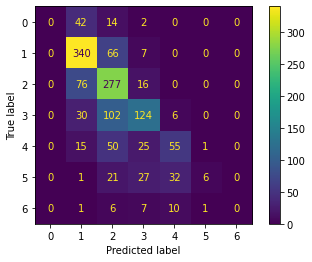

In [178]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

In [179]:
results_rf1 = pd.DataFrame(results_list1_rf)
print(results_rf1)

    accuracy_train  accuracy_test
0              1.0       0.361029
1              1.0       0.415441
2              1.0       0.423529
3              1.0       0.732353
4              1.0       0.619118
5              1.0       0.586029
6              1.0       0.364706
7              1.0       0.407353
8              1.0       0.435294
9              1.0       0.707353
10             1.0       0.604412
11             1.0       0.589706


Podľa výsledkov po prvom testovani random forest môžeme vidieť, že najlepší výsledok mal dataset s ošetrenými outliermi a ngram. Takže je zrejme, že najväčší vplyv na úspešnosť malo ošetrenie outlierov. Pri pridaní textových reprezentácií k dátam s ošetrenými outliermi sa accuraci znížilo, pri ostatných naopak zvýšilo. Ked si porovnáme accuracy pri trenovacom a testovacom datasete je zrejme, že model sa pretrénoval, však toto je celkom bežné pri stromových algoritmoch a treba to ošetriť hyperparametrami. Zatiaľ tento model vykazuje vyššiu presnosť ako pri svc.

GRADIENT BOOSTING MASHINE - bez ošetrenia outlierov a skalovania

In [180]:
results_list1_gbm=[]

Trenovanie modelu

In [181]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train, y_train)

GradientBoostingClassifier()

Predikovanie na trenovacich datach

In [182]:
y_pred_train = gbm_model.predict(X_train)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.7345523329129886
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.62      0.76       134
           1       0.69      0.84      0.76       896
           2       0.64      0.77      0.70       856
           3       0.82      0.62      0.70       608
           4       0.85      0.67      0.75       416
           5       0.96      0.64      0.77       216
           6       1.00      0.98      0.99        46

    accuracy                           0.73      3172
   macro avg       0.85      0.73      0.78      3172
weighted avg       0.76      0.73      0.73      3172



Predikovanie na testovacich datach

In [183]:
y_pred = gbm_model.predict(X_test)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.3786764705882353
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.22      0.03      0.06        58
           1       0.49      0.61      0.54       413
           2       0.35      0.46      0.39       369
           3       0.29      0.20      0.24       262
           4       0.28      0.22      0.24       146
           5       0.22      0.09      0.13        87
           6       0.00      0.00      0.00        25

    accuracy                           0.38      1360
   macro avg       0.26      0.23      0.23      1360
weighted avg       0.35      0.38      0.35      1360



In [184]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

Zobrazenie metrik

In [185]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.38
Recall: 0.23
Precision: 0.26
F1 Score: 0.23


Vizualizácia výkonnosti modelu

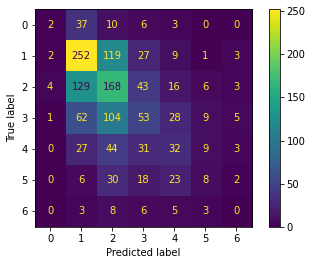

In [186]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING MASHINE - bez ošetrenia outlierov a skalovania a ngram

In [187]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined, y_train)

GradientBoostingClassifier()

In [188]:
y_pred_train = gbm_model.predict(X_train_combined)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.8865069356872636
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89       134
           1       0.87      0.94      0.91       896
           2       0.81      0.91      0.86       856
           3       0.94      0.88      0.91       608
           4       0.96      0.76      0.85       416
           5       0.98      0.83      0.90       216
           6       1.00      0.98      0.99        46

    accuracy                           0.89      3172
   macro avg       0.94      0.87      0.90      3172
weighted avg       0.89      0.89      0.89      3172



In [189]:
y_pred = gbm_model.predict(X_test_combined)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4308823529411765
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.29      0.09      0.13        58
           1       0.59      0.68      0.63       413
           2       0.39      0.49      0.43       369
           3       0.32      0.27      0.30       262
           4       0.33      0.25      0.29       146
           5       0.23      0.10      0.14        87
           6       0.05      0.04      0.05        25

    accuracy                           0.43      1360
   macro avg       0.31      0.28      0.28      1360
weighted avg       0.41      0.43      0.41      1360



In [190]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [191]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.43
Recall: 0.28
Precision: 0.31
F1 Score: 0.28


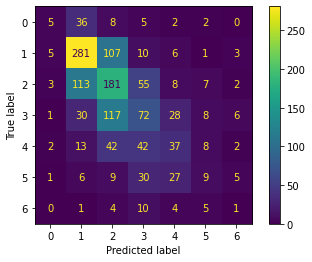

In [192]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()


GRADIENT BOOSTING MASHINE - bez ošetrenia outlierov a skalovania a tfidf ngram

In [193]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined2, y_train)

GradientBoostingClassifier()

In [194]:
y_pred_train = gbm_model.predict(X_train_combined2)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9224464060529635
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.81      0.89       134
           1       0.91      0.97      0.94       896
           2       0.89      0.95      0.92       856
           3       0.92      0.94      0.93       608
           4       0.96      0.82      0.88       416
           5       0.98      0.84      0.91       216
           6       1.00      1.00      1.00        46

    accuracy                           0.92      3172
   macro avg       0.95      0.90      0.92      3172
weighted avg       0.92      0.92      0.92      3172



In [195]:
y_pred = gbm_model.predict(X_test_combined2)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4338235294117647
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.27      0.07      0.11        58
           1       0.61      0.69      0.65       413
           2       0.38      0.50      0.43       369
           3       0.33      0.26      0.29       262
           4       0.29      0.25      0.26       146
           5       0.27      0.11      0.16        87
           6       0.04      0.04      0.04        25

    accuracy                           0.43      1360
   macro avg       0.31      0.27      0.28      1360
weighted avg       0.41      0.43      0.41      1360



In [196]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [197]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.43
Recall: 0.27
Precision: 0.31
F1 Score: 0.28


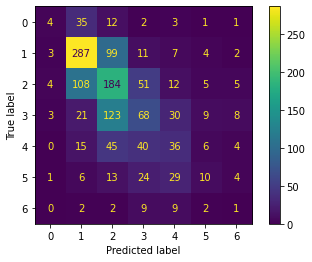

In [198]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING MASHINE - s ošetrenim outlierov

In [199]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_out, y_train)

GradientBoostingClassifier()

In [200]:
y_pred_train = gbm_model.predict(X_train_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9659520807061791
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.97       134
           1       0.95      0.98      0.96       896
           2       0.94      0.98      0.96       856
           3       0.99      0.95      0.97       608
           4       0.99      0.95      0.97       416
           5       1.00      0.96      0.98       216
           6       1.00      1.00      1.00        46

    accuracy                           0.97      3172
   macro avg       0.98      0.96      0.97      3172
weighted avg       0.97      0.97      0.97      3172



In [201]:
y_pred = gbm_model.predict(X_test_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.8470588235294118
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.96      0.47      0.63        58
           1       0.84      0.92      0.88       413
           2       0.83      0.90      0.86       369
           3       0.88      0.84      0.86       262
           4       0.84      0.84      0.84       146
           5       0.87      0.71      0.78        87
           6       0.75      0.36      0.49        25

    accuracy                           0.85      1360
   macro avg       0.85      0.72      0.76      1360
weighted avg       0.85      0.85      0.84      1360



In [202]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [203]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.85
Recall: 0.72
Precision: 0.85
F1 Score: 0.76


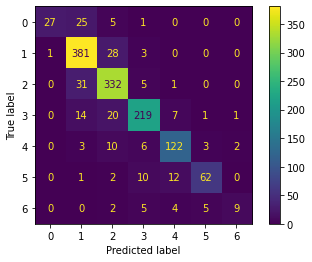

In [204]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING MASHINE - s ošetrenim outlierov a ngram

In [205]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined_out, y_train)

GradientBoostingClassifier()

In [206]:
y_pred_train = gbm_model.predict(X_train_combined_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.983921815889029
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98       134
           1       0.98      0.99      0.99       896
           2       0.97      0.99      0.98       856
           3       0.99      0.97      0.98       608
           4       1.00      0.98      0.99       416
           5       1.00      0.98      0.99       216
           6       1.00      1.00      1.00        46

    accuracy                           0.98      3172
   macro avg       0.99      0.98      0.99      3172
weighted avg       0.98      0.98      0.98      3172



In [207]:
y_pred = gbm_model.predict(X_test_combined_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.8264705882352941
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.40      0.57        58
           1       0.85      0.92      0.88       413
           2       0.81      0.90      0.85       369
           3       0.84      0.84      0.84       262
           4       0.81      0.77      0.79       146
           5       0.87      0.61      0.72        87
           6       0.29      0.20      0.24        25

    accuracy                           0.83      1360
   macro avg       0.78      0.66      0.70      1360
weighted avg       0.83      0.83      0.82      1360



In [208]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [209]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.83
Recall: 0.66
Precision: 0.78
F1 Score: 0.70


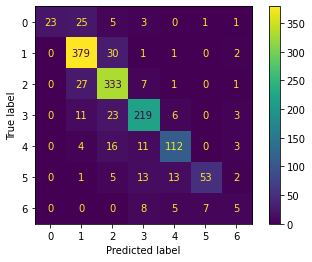

In [210]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING MASHINE - s ošetrenim outlierov a tfidf ngram

In [211]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined2_out, y_train)

GradientBoostingClassifier()

In [212]:
y_pred_train = gbm_model.predict(X_train_combined2_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.992749054224464
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       134
           1       0.99      1.00      1.00       896
           2       0.98      1.00      0.99       856
           3       1.00      0.99      0.99       608
           4       1.00      0.98      0.99       416
           5       1.00      0.99      1.00       216
           6       1.00      1.00      1.00        46

    accuracy                           0.99      3172
   macro avg       1.00      0.99      0.99      3172
weighted avg       0.99      0.99      0.99      3172



In [213]:
y_pred = gbm_model.predict(X_test_combined2_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.8088235294117647
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.87      0.34      0.49        58
           1       0.85      0.90      0.88       413
           2       0.77      0.90      0.83       369
           3       0.83      0.78      0.80       262
           4       0.80      0.77      0.79       146
           5       0.92      0.62      0.74        87
           6       0.25      0.20      0.22        25

    accuracy                           0.81      1360
   macro avg       0.75      0.65      0.68      1360
weighted avg       0.81      0.81      0.80      1360



In [214]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [215]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.81
Recall: 0.65
Precision: 0.75
F1 Score: 0.68


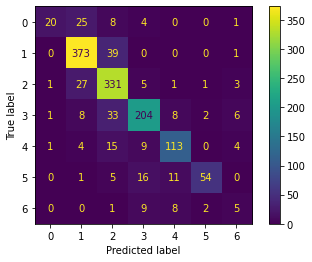

In [216]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING MASHINE - so skalovanim

In [217]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_scaled, y_train)

GradientBoostingClassifier()

In [218]:
y_pred_train = gbm_model.predict(X_train_scaled)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.7323455233291298
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.99      0.61      0.76       134
           1       0.69      0.84      0.76       896
           2       0.64      0.77      0.70       856
           3       0.81      0.62      0.70       608
           4       0.83      0.66      0.73       416
           5       0.97      0.64      0.77       216
           6       1.00      0.96      0.98        46

    accuracy                           0.73      3172
   macro avg       0.85      0.73      0.77      3172
weighted avg       0.76      0.73      0.73      3172



In [219]:
y_pred = gbm_model.predict(X_test_scaled)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.38088235294117645
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.49      0.61      0.54       413
           2       0.36      0.46      0.40       369
           3       0.29      0.21      0.24       262
           4       0.27      0.23      0.25       146
           5       0.22      0.09      0.13        87
           6       0.00      0.00      0.00        25

    accuracy                           0.38      1360
   macro avg       0.23      0.23      0.22      1360
weighted avg       0.34      0.38      0.36      1360



In [220]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [221]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.38
Recall: 0.23
Precision: 0.23
F1 Score: 0.22


GRADIENT BOOSTING MASHINE - so skalovanim a ngram

In [222]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined_scaled, y_train)

GradientBoostingClassifier()

In [223]:
y_pred_train = gbm_model.predict(X_train_combined_scaled)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.8865069356872636
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89       134
           1       0.87      0.94      0.91       896
           2       0.81      0.91      0.86       856
           3       0.94      0.88      0.91       608
           4       0.96      0.76      0.85       416
           5       0.98      0.83      0.90       216
           6       1.00      0.98      0.99        46

    accuracy                           0.89      3172
   macro avg       0.94      0.87      0.90      3172
weighted avg       0.89      0.89      0.89      3172



In [224]:
y_pred = gbm_model.predict(X_test_combined_scaled)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.43308823529411766
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.38      0.09      0.14        58
           1       0.58      0.68      0.63       413
           2       0.39      0.50      0.44       369
           3       0.33      0.28      0.30       262
           4       0.32      0.25      0.28       146
           5       0.26      0.10      0.15        87
           6       0.05      0.04      0.04        25

    accuracy                           0.43      1360
   macro avg       0.33      0.28      0.28      1360
weighted avg       0.41      0.43      0.41      1360



In [225]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [226]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.43
Recall: 0.28
Precision: 0.33
F1 Score: 0.28


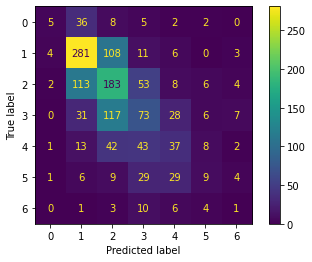

In [227]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING MASHINE - so skalovanim a tfidf ngram

In [228]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined2_scaled, y_train)

GradientBoostingClassifier()

In [229]:
y_pred_train = gbm_model.predict(X_train_combined2_scaled)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9224464060529635
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.81      0.89       134
           1       0.91      0.97      0.94       896
           2       0.89      0.95      0.92       856
           3       0.92      0.94      0.93       608
           4       0.96      0.82      0.88       416
           5       0.98      0.84      0.91       216
           6       1.00      1.00      1.00        46

    accuracy                           0.92      3172
   macro avg       0.95      0.90      0.92      3172
weighted avg       0.92      0.92      0.92      3172



In [230]:
y_pred = gbm_model.predict(X_test_combined2_scaled)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4345588235294118
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.24      0.07      0.11        58
           1       0.61      0.69      0.65       413
           2       0.38      0.50      0.43       369
           3       0.34      0.26      0.30       262
           4       0.28      0.25      0.26       146
           5       0.26      0.11      0.16        87
           6       0.05      0.04      0.05        25

    accuracy                           0.43      1360
   macro avg       0.31      0.28      0.28      1360
weighted avg       0.41      0.43      0.42      1360



In [231]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [232]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.43
Recall: 0.28
Precision: 0.31
F1 Score: 0.28


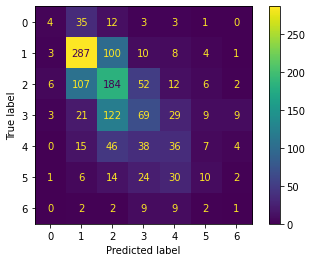

In [233]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING MASHINE - s ošetrenim outlierov a skalovanim

In [234]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_scal_out, y_train)

GradientBoostingClassifier()

In [235]:
y_pred_train = gbm_model.predict(X_train_scal_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9659520807061791
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.97       134
           1       0.95      0.98      0.96       896
           2       0.94      0.98      0.96       856
           3       0.99      0.95      0.97       608
           4       0.99      0.95      0.97       416
           5       1.00      0.96      0.98       216
           6       1.00      1.00      1.00        46

    accuracy                           0.97      3172
   macro avg       0.98      0.96      0.97      3172
weighted avg       0.97      0.97      0.97      3172



In [236]:
y_pred = gbm_model.predict(X_test_scal_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.8470588235294118
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.96      0.47      0.63        58
           1       0.84      0.92      0.88       413
           2       0.83      0.90      0.86       369
           3       0.88      0.84      0.86       262
           4       0.84      0.84      0.84       146
           5       0.87      0.71      0.78        87
           6       0.75      0.36      0.49        25

    accuracy                           0.85      1360
   macro avg       0.85      0.72      0.76      1360
weighted avg       0.85      0.85      0.84      1360



In [237]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [238]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.85
Recall: 0.72
Precision: 0.85
F1 Score: 0.76


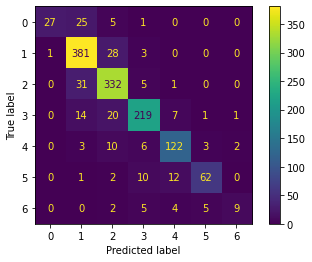

In [239]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING MASHINE - s ošetrenim outlierov a skalovanim a ngram

In [240]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined_scal_out, y_train)

GradientBoostingClassifier()

In [241]:
y_pred_train = gbm_model.predict(X_train_combined_scal_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.983921815889029
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98       134
           1       0.98      0.99      0.99       896
           2       0.97      0.99      0.98       856
           3       0.99      0.97      0.98       608
           4       1.00      0.98      0.99       416
           5       1.00      0.98      0.99       216
           6       1.00      1.00      1.00        46

    accuracy                           0.98      3172
   macro avg       0.99      0.98      0.99      3172
weighted avg       0.98      0.98      0.98      3172



In [242]:
y_pred = gbm_model.predict(X_test_combined_scal_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.8264705882352941
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.41      0.59        58
           1       0.85      0.92      0.88       413
           2       0.81      0.90      0.85       369
           3       0.84      0.83      0.83       262
           4       0.79      0.77      0.78       146
           5       0.87      0.61      0.72        87
           6       0.31      0.20      0.24        25

    accuracy                           0.83      1360
   macro avg       0.78      0.66      0.70      1360
weighted avg       0.83      0.83      0.82      1360



In [243]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [244]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.83
Recall: 0.66
Precision: 0.78
F1 Score: 0.70


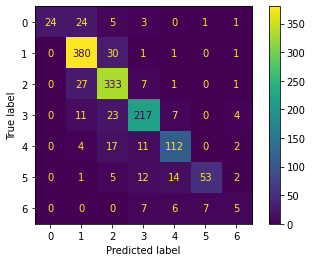

In [245]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING MASHINE - s ošetrenim outlierov a skalovanim a tfidf ngram

In [246]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined2_scal_out, y_train)

GradientBoostingClassifier()

In [247]:
y_pred_train = gbm_model.predict(X_train_combined2_scal_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.992749054224464
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       134
           1       0.99      1.00      1.00       896
           2       0.98      1.00      0.99       856
           3       1.00      0.99      0.99       608
           4       1.00      0.98      0.99       416
           5       1.00      0.99      1.00       216
           6       1.00      1.00      1.00        46

    accuracy                           0.99      3172
   macro avg       1.00      0.99      0.99      3172
weighted avg       0.99      0.99      0.99      3172



In [248]:
y_pred = gbm_model.predict(X_test_combined2_scal_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.8110294117647059
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.85      0.38      0.52        58
           1       0.85      0.91      0.88       413
           2       0.76      0.90      0.83       369
           3       0.83      0.77      0.80       262
           4       0.80      0.78      0.79       146
           5       0.93      0.62      0.74        87
           6       0.29      0.20      0.24        25

    accuracy                           0.81      1360
   macro avg       0.76      0.65      0.69      1360
weighted avg       0.81      0.81      0.80      1360



In [249]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [250]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.81
Recall: 0.65
Precision: 0.76
F1 Score: 0.69


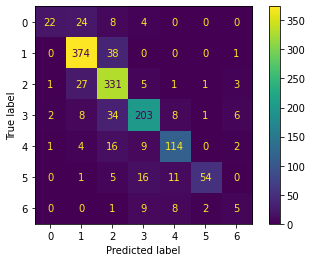

In [251]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

In [252]:
results_gbm1 = pd.DataFrame(results_list1_gbm)
print(results_gbm1)

    accuracy_train  accuracy_test
0         0.734552       0.378676
1         0.886507       0.430882
2         0.922446       0.433824
3         0.965952       0.847059
4         0.983922       0.826471
5         0.992749       0.808824
6         0.732346       0.380882
7         0.886507       0.433088
8         0.922446       0.434559
9         0.965952       0.847059
10        0.983922       0.826471
11        0.992749       0.811029


Podľa výsledkov po prvom testovani GBM môžeme vidieť, že najlepší výsledok mal dataset s ošetrenými outliermi (bez textových reprezentácií) a ataset s ošetrenými outliermi a skalovaním (bez textových reprezentácií) . Takže je zrejme, že najväčší vplyv na úspešnosť malo ošetrenie outlierov. Pri pohľade na trenovacú a testovacu accuracy je zrejme, že sa model pretrénoval, to sa neskôr pokúsime zlepšiť. Tento model má zatiaľ najvyššiu presnosť

VYBER CRT

In [253]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3172 entries, 2227 to 3138
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   declarative_percent              3172 non-null   float64
 1   interrogative_percent            3172 non-null   float64
 2   imperative_percent               3172 non-null   float64
 3   other_ending_percent             3172 non-null   float64
 4   avg_commas                       3172 non-null   float64
 5   average_nouns_per_tweet          3172 non-null   float64
 6   average_adjective_per_tweet      3172 non-null   float64
 7   average_verb_per_tweet           3172 non-null   float64
 8   average_pronoun_per_tweet        3172 non-null   float64
 9   average_numeral_per_tweet        3172 non-null   float64
 10  average_adverb_per_tweet         3172 non-null   float64
 11  average_preposition_per_tweet    3172 non-null   float64
 12  average_conjuncti

WRAPPER METHOD - Vyberajú podmnožiny črt, ktoré dávajú najlepší výkon modelu.

SVC - Recursive feature elimination (RFE)

In [257]:
model = SVC(kernel="linear")

# Vytvorí model RFE (Rekurzívna eliminácia prvkov) s použitím lineárneho modelu SVC
rfe = RFE(estimator=model)  # Inicializuj RFE s lineárnym modelom SVC a urč kroky pre každú iteráciu
selector = rfe.fit(X_train, y_train)  # Prispôsob model RFE

# Predpovedaj pomocou selektora RFE priamo na testovacích údajoch
predictions = selector.predict(X_test)  # Použi selektor na predpovedanie

# Vypočítaj skóre presnosti
accuracy = accuracy_score(y_test, predictions)

# Výstup vybraných prvkov a presnosti
print("Vybrané prvky:", X_train.columns[selector.support_])
print("Skóre presnosti:", accuracy)
X_train_svc = X_train.loc[:, selector.support_].copy()
X_test_svc = X_test.loc[:, selector.support_].copy()

Vybrané prvky: Index(['avg_commas', 'average_numeral_per_tweet', 'average_adverb_per_tweet',
       'average_conjunction_per_tweet', 'average_particle_per_tweet',
       'average_past_tense_per_tweet', 'avg_nsubj_per_tweet',
       'avg_dobj_per_tweet', 'avg_advmod_per_tweet', 'avg_amod_per_tweet',
       'avg_aux_per_tweet'],
      dtype='object')
Skóre presnosti: 0.3683823529411765


SVC - ošetrený outlieri

In [260]:
model = SVC(kernel="linear")

rfe = RFE(estimator=model)
selector = rfe.fit(X_train_out, y_train) 

predictions = selector.predict(X_test_out)

accuracy = accuracy_score(y_test, predictions)

print("Vybrané prvky:", X_train_out.columns[selector.support_])
print("Skóre presnosti:", accuracy)
X_train_out_svc = X_train_out.loc[:, selector.support_].copy()
X_test_out_svc = X_test_out.loc[:, selector.support_].copy()

Vybrané prvky: Index(['avg_commas', 'average_pronoun_per_tweet', 'average_numeral_per_tweet',
       'average_adverb_per_tweet', 'average_conjunction_per_tweet',
       'average_particle_per_tweet', 'average_past_tense_per_tweet',
       'avg_nsubj_per_tweet', 'avg_dobj_per_tweet', 'avg_advmod_per_tweet',
       'avg_amod_per_tweet'],
      dtype='object')
Skóre presnosti: 0.4661764705882353


SVC-scalovanie

In [261]:
model = SVC(kernel="linear")

rfe = RFE(estimator=model)  
selector = rfe.fit(X_train_scaled, y_train)  

predictions = selector.predict(X_test_scaled)  

accuracy = accuracy_score(y_test, predictions)

print("Vybrané prvky:", X_train_scaled.columns[selector.support_])
print("Skóre presnosti:", accuracy)
X_train_scaled_svc = X_train_scaled.loc[:, selector.support_].copy()
X_test_scaled_svc = X_test_scaled.loc[:, selector.support_].copy()

Vybrané prvky: Index(['declarative_percent', 'other_ending_percent', 'avg_commas',
       'average_particle_per_tweet', 'average_past_tense_per_tweet',
       'average_present_tense_per_tweet', 'avg_nsubj_per_tweet',
       'avg_dobj_per_tweet', 'avg_advmod_per_tweet', 'avg_amod_per_tweet',
       'avg_aux_per_tweet'],
      dtype='object')
Skóre presnosti: 0.35


SVC -scalovanie a ošetreny outlieri

In [262]:
model = SVC(kernel="linear")


rfe = RFE(estimator=model) 
selector = rfe.fit(X_train_scal_out, y_train) 

predictions = selector.predict(X_test_scal_out)

accuracy = accuracy_score(y_test, predictions)

print("Vybrané prvky:", X_train_scal_out.columns[selector.support_])
print("Skóre presnosti:", accuracy)
X_train_scal_out_svc = X_train_scal_out.loc[:, selector.support_].copy()
X_test_scal_out_svc = X_test_scal_out.loc[:, selector.support_].copy()

Vybrané prvky: Index(['avg_commas', 'average_pronoun_per_tweet', 'average_numeral_per_tweet',
       'average_adverb_per_tweet', 'average_conjunction_per_tweet',
       'average_particle_per_tweet', 'average_past_tense_per_tweet',
       'avg_nsubj_per_tweet', 'avg_dobj_per_tweet', 'avg_advmod_per_tweet',
       'avg_amod_per_tweet'],
      dtype='object')
Skóre presnosti: 0.4661764705882353


RANDOM FOREST - BEZ OšETRENIA OUTLIEROV A SKALOVANIA

In [263]:
model = RandomForestClassifier()

rfe = RFE(estimator=model) 
selector = rfe.fit(X_train, y_train)  

predictions = selector.predict(X_test)

accuracy = accuracy_score(y_test, predictions)

print("Vybrané prvky:", X_train.columns[selector.support_])
print("Skóre presnosti:", accuracy)
X_train_rf = X_train.loc[:, selector.support_].copy()
X_test_rf = X_test.loc[:, selector.support_].copy()

Vybrané prvky: Index(['declarative_percent', 'interrogative_percent', 'avg_commas',
       'average_adverb_per_tweet', 'average_preposition_per_tweet',
       'average_particle_per_tweet', 'average_past_tense_per_tweet',
       'average_present_tense_per_tweet', 'avg_dobj_per_tweet',
       'avg_advmod_per_tweet', 'avg_amod_per_tweet'],
      dtype='object')
Skóre presnosti: 0.3698529411764706


RANDOM FOREST - S OšETRENIM OUTLIEROV 

In [264]:
model = RandomForestClassifier()

rfe = RFE(estimator=model) 
selector = rfe.fit(X_train_out, y_train) 

predictions = selector.predict(X_test_out)

accuracy = accuracy_score(y_test, predictions)

print("Vybrané prvky:", X_train_out.columns[selector.support_])
print("Skóre presnosti:", accuracy)
X_train_out_rf = X_train_out.loc[:, selector.support_].copy()
X_test_out_rf = X_test_out.loc[:, selector.support_].copy()

Vybrané prvky: Index(['declarative_percent', 'interrogative_percent', 'imperative_percent',
       'avg_commas', 'average_nouns_per_tweet', 'average_adverb_per_tweet',
       'average_particle_per_tweet', 'average_past_tense_per_tweet',
       'average_present_tense_per_tweet', 'avg_dobj_per_tweet',
       'avg_amod_per_tweet'],
      dtype='object')
Skóre presnosti: 0.7176470588235294


RANDOM FOREST - SKALOVANIE

In [265]:
model = RandomForestClassifier()

rfe = RFE(estimator=model) 
selector = rfe.fit(X_train_scaled, y_train)

predictions = selector.predict(X_test_scaled) 

accuracy = accuracy_score(y_test, predictions)

print("Vybrané prvky:", X_train_scaled.columns[selector.support_])
print("Skóre presnosti:", accuracy)
X_train_scaled_rf = X_train_scaled.loc[:, selector.support_].copy()
X_test_scaled_rf = X_test_scaled.loc[:, selector.support_].copy()

Vybrané prvky: Index(['declarative_percent', 'interrogative_percent', 'avg_commas',
       'average_pronoun_per_tweet', 'average_numeral_per_tweet',
       'average_adverb_per_tweet', 'average_particle_per_tweet',
       'average_past_tense_per_tweet', 'avg_dobj_per_tweet',
       'avg_advmod_per_tweet', 'avg_amod_per_tweet'],
      dtype='object')
Skóre presnosti: 0.36470588235294116


RANDOM FOREST - S OšETRENIM OUTLIEROV A SKALOVANIM

In [266]:
model = RandomForestClassifier()

rfe = RFE(estimator=model)
selector = rfe.fit(X_train_scal_out, y_train) 

predictions = selector.predict(X_test_scal_out)

accuracy = accuracy_score(y_test, predictions)

print("Vybrané prvky:", X_train_scal_out.columns[selector.support_])
print("Skóre presnosti:", accuracy)
X_train_scal_out_rf = X_train_scal_out.loc[:, selector.support_].copy()
X_test_scal_out_rf = X_test_scal_out.loc[:, selector.support_].copy()

Vybrané prvky: Index(['declarative_percent', 'imperative_percent', 'avg_commas',
       'average_nouns_per_tweet', 'average_numeral_per_tweet',
       'average_adverb_per_tweet', 'average_particle_per_tweet',
       'average_past_tense_per_tweet', 'average_present_tense_per_tweet',
       'avg_dobj_per_tweet', 'avg_amod_per_tweet'],
      dtype='object')
Skóre presnosti: 0.711764705882353


GRADIENT BOOSTING MASHINE - BEZ OšETRENIA OUTLIEROV A SKALOVANIA

In [267]:
model = GradientBoostingClassifier()

rfe = RFE(estimator=model) 
selector = rfe.fit(X_train, y_train)

predictions = selector.predict(X_test)

accuracy = accuracy_score(y_test, predictions)

print("Vybrané prvky:", X_train.columns[selector.support_])
print("Skóre presnosti:", accuracy)
X_train_gbm = X_train.loc[:, selector.support_].copy()
X_test_gbm = X_test.loc[:, selector.support_].copy()

Vybrané prvky: Index(['declarative_percent', 'imperative_percent', 'avg_commas',
       'average_pronoun_per_tweet', 'average_numeral_per_tweet',
       'average_adverb_per_tweet', 'average_particle_per_tweet',
       'average_past_tense_per_tweet', 'avg_dobj_per_tweet',
       'avg_advmod_per_tweet', 'avg_amod_per_tweet'],
      dtype='object')
Skóre presnosti: 0.375


GRADIENT BOOSTING MASHINE - S OšETRENIM OUTLIEROV 

In [268]:
model = GradientBoostingClassifier()

rfe = RFE(estimator=model) 
selector = rfe.fit(X_train_out, y_train)

predictions = selector.predict(X_test_out)

accuracy = accuracy_score(y_test, predictions)

print("Vybrané prvky:", X_train_out.columns[selector.support_])
print("Skóre presnosti:", accuracy)
X_train_out_gbm = X_train_out.loc[:, selector.support_].copy()
X_test_out_gbm = X_test_out.loc[:, selector.support_].copy()

Vybrané prvky: Index(['declarative_percent', 'interrogative_percent', 'imperative_percent',
       'avg_commas', 'average_nouns_per_tweet', 'average_adverb_per_tweet',
       'average_particle_per_tweet', 'average_past_tense_per_tweet',
       'avg_dobj_per_tweet', 'avg_advmod_per_tweet', 'avg_amod_per_tweet'],
      dtype='object')
Skóre presnosti: 0.8272058823529411


GRADIENT BOOSTING MASHINE - SKALOVANIE

In [269]:
model = GradientBoostingClassifier()

rfe = RFE(estimator=model) 
selector = rfe.fit(X_train_scaled, y_train)

predictions = selector.predict(X_test_scaled) 

accuracy = accuracy_score(y_test, predictions)

print("Vybrané prvky:", X_train_scaled.columns[selector.support_])
print("Skóre presnosti:", accuracy)
X_train_scaled_gbm = X_train_scaled.loc[:, selector.support_].copy()
X_test_scaled_gbm = X_test_scaled.loc[:, selector.support_].copy()

Vybrané prvky: Index(['declarative_percent', 'imperative_percent', 'avg_commas',
       'average_numeral_per_tweet', 'average_adverb_per_tweet',
       'average_conjunction_per_tweet', 'average_particle_per_tweet',
       'avg_dobj_per_tweet', 'avg_advmod_per_tweet', 'avg_amod_per_tweet',
       'avg_aux_per_tweet'],
      dtype='object')
Skóre presnosti: 0.38382352941176473


GRADIENT BOOSTING MASHINE - S OšETRENIM OUTLIEROV A SKALOVANIM

In [270]:
model = GradientBoostingClassifier()

rfe = RFE(estimator=model) 
selector = rfe.fit(X_train_scal_out, y_train) 

predictions = selector.predict(X_test_scal_out)

accuracy = accuracy_score(y_test, predictions)

print("Vybrané prvky:", X_train_scal_out.columns[selector.support_])
print("Skóre presnosti:", accuracy)
X_train_scal_out_gbm = X_train_scal_out.loc[:, selector.support_].copy()
X_test_scal_out_gbm = X_test_scal_out.loc[:, selector.support_].copy()

Vybrané prvky: Index(['declarative_percent', 'interrogative_percent', 'imperative_percent',
       'avg_commas', 'average_nouns_per_tweet', 'average_adverb_per_tweet',
       'average_particle_per_tweet', 'average_past_tense_per_tweet',
       'avg_dobj_per_tweet', 'avg_advmod_per_tweet', 'avg_amod_per_tweet'],
      dtype='object')
Skóre presnosti: 0.825


Spájanie nových datasetov s n-grammi

In [271]:

X_train_combined_svc = hstack([X_train_svc, ngram_train])
X_test_combined_svc = hstack([X_test_svc, ngram_test])
X_train_combined2_svc = hstack([X_train_svc, ngram_train_tfidf])
X_test_combined2_svc = hstack([X_test_svc, ngram_test_tfidf])

X_train_combined_rf = hstack([X_train_rf, ngram_train])
X_test_combined_rf = hstack([X_test_rf, ngram_test])
X_train_combined2_rf = hstack([X_train_rf, ngram_train_tfidf])
X_test_combined2_rf = hstack([X_test_rf, ngram_test_tfidf])

X_train_combined_gbm = hstack([X_train_gbm, ngram_train])
X_test_combined_gbm = hstack([X_test_gbm, ngram_test])
X_train_combined2_gbm = hstack([X_train_gbm, ngram_train_tfidf])
X_test_combined2_gbm = hstack([X_test_gbm, ngram_test_tfidf])



X_train_combined_out_svc = hstack([X_train_out_svc, ngram_train])
X_test_combined_out_svc = hstack([X_test_out_svc, ngram_test])
X_train_combined2_out_svc = hstack([X_train_out_svc, ngram_train_tfidf])
X_test_combined2_out_svc = hstack([X_test_out_svc, ngram_test_tfidf])

X_train_combined_out_rf = hstack([X_train_out_rf, ngram_train])
X_test_combined_out_rf = hstack([X_test_out_rf, ngram_test])
X_train_combined2_out_rf = hstack([X_train_out_rf, ngram_train_tfidf])
X_test_combined2_out_rf = hstack([X_test_out_rf, ngram_test_tfidf])

X_train_combined_out_gbm = hstack([X_train_out_gbm, ngram_train])
X_test_combined_out_gbm = hstack([X_test_out_gbm, ngram_test])
X_train_combined2_out_gbm = hstack([X_train_out_gbm, ngram_train_tfidf])
X_test_combined2_out_gbm = hstack([X_test_out_gbm, ngram_test_tfidf])




X_train_combined_scaled_svc = hstack([X_train_scaled_svc, ngram_train])
X_test_combined_scaled_svc = hstack([X_test_scaled_svc, ngram_test])
X_train_combined2_scaled_svc = hstack([X_train_scaled_svc, ngram_train_tfidf])
X_test_combined2_scaled_svc = hstack([X_test_scaled_svc, ngram_test_tfidf])

X_train_combined_scaled_rf = hstack([X_train_scaled_rf, ngram_train])
X_test_combined_scaled_rf = hstack([X_test_scaled_rf, ngram_test])
X_train_combined2_scaled_rf = hstack([X_train_scaled_rf, ngram_train_tfidf])
X_test_combined2_scaled_rf = hstack([X_test_scaled_rf, ngram_test_tfidf])

X_train_combined_scaled_gbm = hstack([X_train_scaled_gbm, ngram_train])
X_test_combined_scaled_gbm = hstack([X_test_scaled_gbm, ngram_test])
X_train_combined2_scaled_gbm = hstack([X_train_scaled_gbm, ngram_train_tfidf])
X_test_combined2_scaled_gbm = hstack([X_test_scaled_gbm, ngram_test_tfidf])




X_train_combined_scal_out_svc = hstack([X_train_scal_out_svc, ngram_train])
X_test_combined_scal_out_svc = hstack([X_test_scal_out_svc, ngram_test])
X_train_combined2_scal_out_svc = hstack([X_train_scal_out_svc, ngram_train_tfidf])
X_test_combined2_scal_out_svc = hstack([X_test_scal_out_svc, ngram_test_tfidf])

X_train_combined_scal_out_rf = hstack([X_train_scal_out_rf, ngram_train])
X_test_combined_scal_out_rf = hstack([X_test_scal_out_rf, ngram_test])
X_train_combined2_scal_out_rf = hstack([X_train_scal_out_rf, ngram_train_tfidf])
X_test_combined2_scal_out_rf = hstack([X_test_scal_out_rf, ngram_test_tfidf])

X_train_combined_scal_out_gbm = hstack([X_train_scal_out_gbm, ngram_train])
X_test_combined_scal_out_gbm = hstack([X_test_scal_out_gbm, ngram_test])
X_train_combined2_scal_out_gbm = hstack([X_train_scal_out_gbm, ngram_train_tfidf])
X_test_combined2_scal_out_gbm = hstack([X_test_scal_out_gbm, ngram_test_tfidf])


TRENOVANIE - s vyberom crt

Následne som urobila druhý test, pričom som pre každý model a zároveň každý typ datasetu urobila výber črt vyššie. Tie som používala na trenovanie datasetov. Výber črt som robila RFE metodou a mojím hlavným cieľom bolo týmto zvýšiť accuracy. Inak som postupovala rovnako ako pri prvom testovaní.

In [272]:
results_list2_svc=[]

SVC - Bez ošetrenia outlierov a bez skalovania

Trenovanie modelu

In [273]:
svc_model = SVC()
svc_model.fit(X_train_svc, y_train)

SVC()

Predikovanie na trenovacich datach

In [274]:
y_pred_train = svc_model.predict(X_train_svc)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.3619167717528373
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       134
           1       0.43      0.68      0.52       896
           2       0.30      0.53      0.39       856
           3       0.30      0.07      0.11       608
           4       0.36      0.10      0.16       416
           5       0.00      0.00      0.00       216
           6       0.00      0.00      0.00        46

    accuracy                           0.36      3172
   macro avg       0.20      0.20      0.17      3172
weighted avg       0.31      0.36      0.30      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Predikovanie na testovacich datach

In [275]:
y_pred = svc_model.predict(X_test_svc)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.45      0.67      0.54       413
           2       0.31      0.53      0.39       369
           3       0.20      0.04      0.06       262
           4       0.35      0.12      0.18       146
           5       0.00      0.00      0.00        87
           6       0.00      0.00      0.00        25

    accuracy                           0.37      1360
   macro avg       0.19      0.20      0.17      1360
weighted avg       0.30      0.37      0.30      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [276]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

Zobrazenie metrik

In [277]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.3f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.370
Recall: 0.20
Precision: 0.19
F1 Score: 0.17


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Vizualizácia výkonnosti modelu

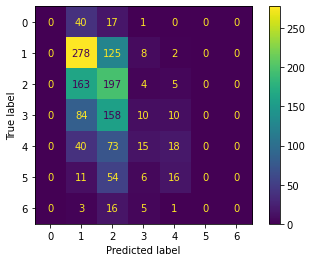

In [278]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - S n-gram

In [279]:
svc_model = SVC()
svc_model.fit(X_train_combined_svc, y_train)

SVC()

In [280]:
y_pred_train = svc_model.predict(X_train_combined_svc)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.4473518284993695
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       134
           1       0.55      0.73      0.62       896
           2       0.37      0.61      0.46       856
           3       0.39      0.21      0.27       608
           4       0.49      0.25      0.33       416
           5       0.93      0.06      0.12       216
           6       0.00      0.00      0.00        46

    accuracy                           0.45      3172
   macro avg       0.39      0.27      0.26      3172
weighted avg       0.46      0.45      0.40      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [281]:
y_pred = svc_model.predict(X_test_combined_svc)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.55      0.69      0.61       413
           2       0.35      0.60      0.44       369
           3       0.26      0.12      0.17       262
           4       0.39      0.23      0.29       146
           5       0.50      0.01      0.02        87
           6       0.00      0.00      0.00        25

    accuracy                           0.42      1360
   macro avg       0.29      0.24      0.22      1360
weighted avg       0.39      0.42      0.37      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [282]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [283]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.42
Recall: 0.24
Precision: 0.29
F1 Score: 0.22


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


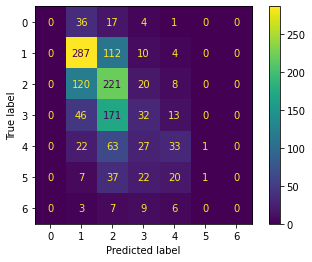

In [284]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - S n-gram tfidf

In [285]:
svc_model = SVC()
svc_model.fit(X_train_combined2_svc, y_train)

SVC()

In [286]:
y_pred_train = svc_model.predict(X_train_combined2_svc)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.387452711223203
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       134
           1       0.49      0.67      0.57       896
           2       0.32      0.62      0.42       856
           3       0.30      0.08      0.13       608
           4       0.35      0.11      0.17       416
           5       0.00      0.00      0.00       216
           6       0.00      0.00      0.00        46

    accuracy                           0.39      3172
   macro avg       0.21      0.21      0.18      3172
weighted avg       0.33      0.39      0.32      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [287]:
y_pred = svc_model.predict(X_test_combined2_svc)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.47      0.63      0.54       413
           2       0.32      0.59      0.41       369
           3       0.20      0.04      0.06       262
           4       0.34      0.14      0.20       146
           5       0.00      0.00      0.00        87
           6       0.00      0.00      0.00        25

    accuracy                           0.38      1360
   macro avg       0.19      0.20      0.17      1360
weighted avg       0.30      0.38      0.31      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [288]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [289]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.38
Recall: 0.20
Precision: 0.19
F1 Score: 0.17


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


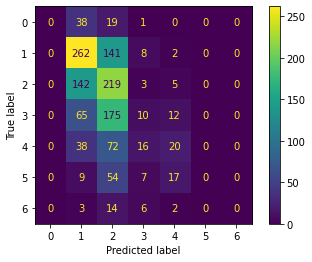

In [290]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - S ošetrenim outlierov

In [291]:
svc_model = SVC()
svc_model.fit(X_train_out_svc, y_train)

SVC()

In [292]:
y_pred_train = svc_model.predict(X_train_out_svc)
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       134
           1       0.58      0.74      0.65       896
           2       0.41      0.58      0.48       856
           3       0.42      0.34      0.38       608
           4       0.49      0.38      0.43       416
           5       1.00      0.02      0.04       216
           6       0.00      0.00      0.00        46

    accuracy                           0.48      3172
   macro avg       0.41      0.29      0.28      3172
weighted avg       0.49      0.48      0.45      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [293]:
y_pred = svc_model.predict(X_test_out_svc)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.61      0.72      0.66       413
           2       0.41      0.60      0.49       369
           3       0.37      0.30      0.33       262
           4       0.41      0.32      0.36       146
           5       0.00      0.00      0.00        87
           6       0.00      0.00      0.00        25

    accuracy                           0.47      1360
   macro avg       0.26      0.28      0.26      1360
weighted avg       0.41      0.47      0.43      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [294]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [295]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.47
Recall: 0.28
Precision: 0.26
F1 Score: 0.26


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


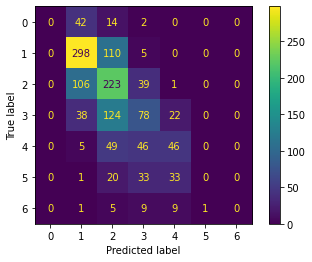

In [296]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - S ošetrenim outlierov a n-gram

In [297]:
svc_model = SVC()
svc_model.fit(X_train_combined_out_svc, y_train)

SVC()

In [298]:
y_pred_train = svc_model.predict(X_train_combined_out_svc)
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       134
           1       0.55      0.73      0.62       896
           2       0.37      0.61      0.46       856
           3       0.39      0.20      0.27       608
           4       0.49      0.25      0.33       416
           5       0.93      0.06      0.12       216
           6       0.00      0.00      0.00        46

    accuracy                           0.45      3172
   macro avg       0.39      0.27      0.26      3172
weighted avg       0.46      0.45      0.40      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [299]:
y_pred = svc_model.predict(X_test_combined_out_svc)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.55      0.69      0.61       413
           2       0.35      0.60      0.44       369
           3       0.26      0.12      0.17       262
           4       0.39      0.23      0.29       146
           5       0.50      0.01      0.02        87
           6       0.00      0.00      0.00        25

    accuracy                           0.42      1360
   macro avg       0.29      0.24      0.22      1360
weighted avg       0.39      0.42      0.37      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [300]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [301]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.42
Recall: 0.24
Precision: 0.29
F1 Score: 0.22


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


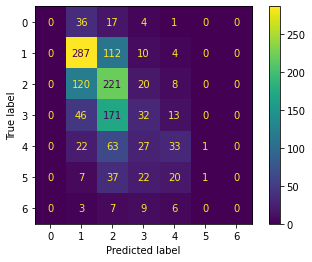

In [302]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - S ošetrenim outlierov a tfidf n-gram

In [303]:
svc_model = SVC()
svc_model.fit(X_train_combined2_out_svc, y_train)

SVC()

In [304]:
y_pred_train = svc_model.predict(X_train_combined2_out_svc)
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       134
           1       0.61      0.76      0.67       896
           2       0.43      0.62      0.51       856
           3       0.42      0.33      0.37       608
           4       0.48      0.42      0.45       416
           5       0.00      0.00      0.00       216
           6       0.00      0.00      0.00        46

    accuracy                           0.50      3172
   macro avg       0.28      0.30      0.29      3172
weighted avg       0.43      0.50      0.46      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [305]:
y_pred = svc_model.predict(X_test_combined2_out_svc)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.63      0.73      0.67       413
           2       0.41      0.62      0.49       369
           3       0.38      0.28      0.32       262
           4       0.39      0.34      0.37       146
           5       0.00      0.00      0.00        87
           6       0.00      0.00      0.00        25

    accuracy                           0.48      1360
   macro avg       0.26      0.28      0.26      1360
weighted avg       0.42      0.48      0.44      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [306]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [307]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.48
Recall: 0.28
Precision: 0.26
F1 Score: 0.26


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


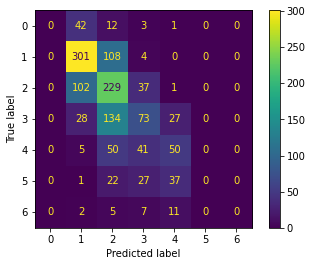

In [308]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - So škálovaním

In [309]:
svc_model = SVC()
svc_model.fit(X_train_scaled_svc, y_train)

SVC()

In [310]:
y_pred_train = svc_model.predict(X_train_scaled_svc)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.37578814627994955
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       134
           1       0.45      0.65      0.53       896
           2       0.32      0.55      0.40       856
           3       0.33      0.11      0.17       608
           4       0.39      0.16      0.23       416
           5       0.50      0.00      0.01       216
           6       0.00      0.00      0.00        46

    accuracy                           0.38      3172
   macro avg       0.28      0.21      0.19      3172
weighted avg       0.36      0.38      0.32      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [311]:
y_pred = svc_model.predict(X_test_scaled_svc)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.3625
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.45      0.61      0.52       413
           2       0.30      0.54      0.38       369
           3       0.26      0.06      0.10       262
           4       0.40      0.17      0.24       146
           5       0.50      0.01      0.02        87
           6       0.00      0.00      0.00        25

    accuracy                           0.36      1360
   macro avg       0.27      0.20      0.18      1360
weighted avg       0.34      0.36      0.31      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [312]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [313]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.36
Recall: 0.20
Precision: 0.27
F1 Score: 0.18


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


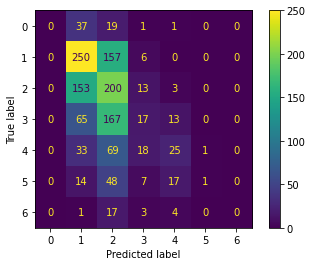

In [314]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - So škálovaním a n-grammi

In [315]:
svc_model = SVC()
svc_model.fit(X_train_combined_scaled_svc, y_train)

SVC()

In [316]:
y_pred_train = svc_model.predict(X_train_combined_scaled_svc)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.44703656998738966
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       134
           1       0.55      0.73      0.62       896
           2       0.37      0.61      0.46       856
           3       0.39      0.20      0.27       608
           4       0.49      0.25      0.33       416
           5       0.93      0.06      0.12       216
           6       0.00      0.00      0.00        46

    accuracy                           0.45      3172
   macro avg       0.39      0.27      0.26      3172
weighted avg       0.46      0.45      0.40      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [317]:
y_pred = svc_model.predict(X_test_combined_scaled_svc)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.42205882352941176
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.55      0.69      0.61       413
           2       0.35      0.60      0.44       369
           3       0.26      0.12      0.17       262
           4       0.39      0.23      0.29       146
           5       0.50      0.01      0.02        87
           6       0.00      0.00      0.00        25

    accuracy                           0.42      1360
   macro avg       0.29      0.24      0.22      1360
weighted avg       0.39      0.42      0.37      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [318]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [319]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.42
Recall: 0.24
Precision: 0.29
F1 Score: 0.22


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


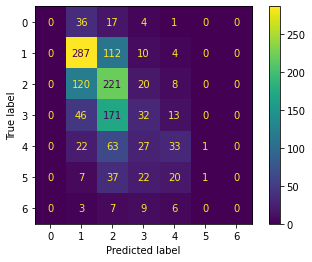

In [320]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - So škálovaním a tfidf n-gram

In [321]:
svc_model = SVC()
svc_model.fit(X_train_combined2_scaled_svc, y_train)

SVC()

In [322]:
y_pred_train = svc_model.predict(X_train_combined2_scaled_svc)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.44609079445145017
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       134
           1       0.60      0.66      0.63       896
           2       0.37      0.67      0.48       856
           3       0.37      0.22      0.27       608
           4       0.42      0.27      0.33       416
           5       1.00      0.01      0.03       216
           6       0.00      0.00      0.00        46

    accuracy                           0.45      3172
   macro avg       0.39      0.26      0.25      3172
weighted avg       0.46      0.45      0.40      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [323]:
y_pred = svc_model.predict(X_test_combined2_scaled_svc)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4147058823529412
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.59      0.63      0.61       413
           2       0.34      0.63      0.44       369
           3       0.29      0.15      0.19       262
           4       0.34      0.23      0.28       146
           5       0.00      0.00      0.00        87
           6       0.00      0.00      0.00        25

    accuracy                           0.41      1360
   macro avg       0.22      0.23      0.22      1360
weighted avg       0.36      0.41      0.37      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [324]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [325]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.41
Recall: 0.23
Precision: 0.22
F1 Score: 0.22


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


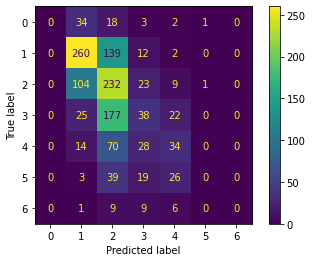

In [326]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - S ošetrením outlierov a so škálovaním

In [327]:
svc_model = SVC()
svc_model.fit(X_train_scal_out_svc, y_train)

SVC()

In [328]:
y_pred_train = svc_model.predict(X_train_scal_out_svc)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.4826607818411097
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       134
           1       0.58      0.74      0.65       896
           2       0.41      0.58      0.48       856
           3       0.42      0.34      0.38       608
           4       0.49      0.38      0.43       416
           5       1.00      0.02      0.04       216
           6       0.00      0.00      0.00        46

    accuracy                           0.48      3172
   macro avg       0.41      0.29      0.28      3172
weighted avg       0.49      0.48      0.45      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [329]:
y_pred = svc_model.predict(X_test_scal_out_svc)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4742647058823529
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.61      0.72      0.66       413
           2       0.41      0.60      0.49       369
           3       0.37      0.30      0.33       262
           4       0.41      0.32      0.36       146
           5       0.00      0.00      0.00        87
           6       0.00      0.00      0.00        25

    accuracy                           0.47      1360
   macro avg       0.26      0.28      0.26      1360
weighted avg       0.41      0.47      0.43      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [330]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [331]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.47
Recall: 0.28
Precision: 0.26
F1 Score: 0.26


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


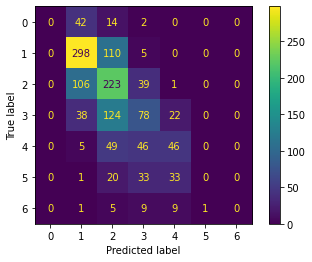

In [332]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - S ošetrením outlierov a so škálovaním a s n-gram

In [333]:
svc_model = SVC()
svc_model.fit(X_train_combined_scal_out_svc, y_train)

SVC()

In [334]:
y_pred_train = svc_model.predict(X_train_combined_scal_out_svc)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.44703656998738966
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       134
           1       0.55      0.73      0.62       896
           2       0.37      0.61      0.46       856
           3       0.39      0.20      0.27       608
           4       0.49      0.25      0.33       416
           5       0.93      0.06      0.12       216
           6       0.00      0.00      0.00        46

    accuracy                           0.45      3172
   macro avg       0.39      0.27      0.26      3172
weighted avg       0.46      0.45      0.40      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [335]:
y_pred = svc_model.predict(X_test_combined_scal_out_svc)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.42205882352941176
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.55      0.69      0.61       413
           2       0.35      0.60      0.44       369
           3       0.26      0.12      0.17       262
           4       0.39      0.23      0.29       146
           5       0.50      0.01      0.02        87
           6       0.00      0.00      0.00        25

    accuracy                           0.42      1360
   macro avg       0.29      0.24      0.22      1360
weighted avg       0.39      0.42      0.37      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [336]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [337]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.42
Recall: 0.24
Precision: 0.29
F1 Score: 0.22


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


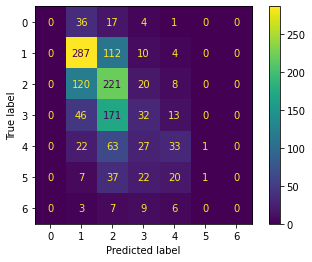

In [338]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - S ošetrením outlierov a so škálovaním a s tfidf n-gram

In [339]:
svc_model = SVC()
svc_model.fit(X_train_combined2_scal_out_svc, y_train)

SVC()

In [340]:
y_pred_train = svc_model.predict(X_train_combined2_scal_out_svc)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.49716267339218156
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       134
           1       0.61      0.76      0.67       896
           2       0.43      0.62      0.51       856
           3       0.42      0.33      0.37       608
           4       0.48      0.42      0.45       416
           5       0.00      0.00      0.00       216
           6       0.00      0.00      0.00        46

    accuracy                           0.50      3172
   macro avg       0.28      0.30      0.29      3172
weighted avg       0.43      0.50      0.46      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [341]:
y_pred = svc_model.predict(X_test_combined2_scal_out_svc)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4801470588235294
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.63      0.73      0.67       413
           2       0.41      0.62      0.49       369
           3       0.38      0.28      0.32       262
           4       0.39      0.34      0.37       146
           5       0.00      0.00      0.00        87
           6       0.00      0.00      0.00        25

    accuracy                           0.48      1360
   macro avg       0.26      0.28      0.26      1360
weighted avg       0.42      0.48      0.44      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [342]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [343]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.48
Recall: 0.28
Precision: 0.26
F1 Score: 0.26


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


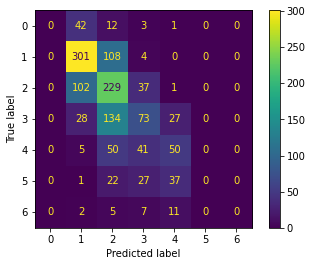

In [344]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

In [345]:
results_svc2 = pd.DataFrame(results_list2_svc)
print(results_svc2)

    accuracy_train  accuracy_test
0         0.361917       0.369853
1         0.447352       0.422059
2         0.387453       0.375735
3         0.482661       0.474265
4         0.447037       0.422059
5         0.497163       0.480147
6         0.375788       0.362500
7         0.447037       0.422059
8         0.446091       0.414706
9         0.482661       0.474265
10        0.447037       0.422059
11        0.497163       0.480147


Podľa výsledkov po druhom testovani svc môžeme vidieť, že najlepší výsledok mal dataset s ošetrenými outliermi a tfidf ngram a dataset s ošetrenými outliermi a skalovaním a tfidf ngram. Takže je zrejme, že najväčší vplyv na úspešnosť malo ošetrenie outlierov a pridanie textovej reprezentácie. V porovnaní s prvým textom sa accuracy mierne zvýšilo. 

RANDOM FOREST - Bez ošetrenia outlierov a bez skalovania

In [346]:
results_list2_rf=[]

Trenovanie modelu

In [347]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_rf, y_train)

RandomForestClassifier()

Predikovanie na trenovacich datach

In [348]:
y_pred_train = rf_model.predict(X_train_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       896
           2       1.00      1.00      1.00       856
           3       1.00      1.00      1.00       608
           4       1.00      1.00      1.00       416
           5       1.00      1.00      1.00       216
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



Predikovanie na testovacich datach

In [349]:
y_pred = rf_model.predict(X_test_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.3764705882352941
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.50      0.02      0.03        58
           1       0.49      0.65      0.56       413
           2       0.32      0.41      0.36       369
           3       0.27      0.21      0.24       262
           4       0.25      0.20      0.22       146
           5       0.29      0.06      0.10        87
           6       0.00      0.00      0.00        25

    accuracy                           0.38      1360
   macro avg       0.30      0.22      0.22      1360
weighted avg       0.36      0.38      0.35      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [350]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

Zobrazenie metrik

In [351]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.38
Recall: 0.22
Precision: 0.30
F1 Score: 0.22


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Vizualizácia výkonnosti modelu

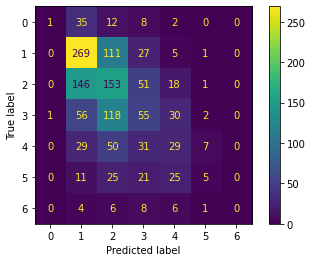

In [352]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - S n-gram

In [353]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined_rf, y_train)

RandomForestClassifier()

In [354]:
y_pred_train = rf_model.predict(X_train_combined_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       896
           2       1.00      1.00      1.00       856
           3       1.00      1.00      1.00       608
           4       1.00      1.00      1.00       416
           5       1.00      1.00      1.00       216
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [355]:
y_pred = rf_model.predict(X_test_combined_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4117647058823529
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.55      0.67      0.60       413
           2       0.34      0.54      0.42       369
           3       0.29      0.18      0.23       262
           4       0.36      0.26      0.30       146
           5       0.08      0.01      0.02        87
           6       0.00      0.00      0.00        25

    accuracy                           0.41      1360
   macro avg       0.23      0.24      0.22      1360
weighted avg       0.36      0.41      0.37      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [356]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [357]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.41
Recall: 0.24
Precision: 0.23
F1 Score: 0.22


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


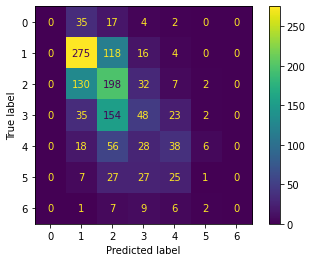

In [358]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - S n-gram tfidf

In [359]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined2_rf, y_train)

RandomForestClassifier()

In [360]:
y_pred_train = rf_model.predict(X_train_combined2_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       896
           2       1.00      1.00      1.00       856
           3       1.00      1.00      1.00       608
           4       1.00      1.00      1.00       416
           5       1.00      1.00      1.00       216
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [361]:
y_pred = rf_model.predict(X_test_combined2_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.40808823529411764
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.54      0.69      0.61       413
           2       0.34      0.49      0.41       369
           3       0.28      0.19      0.23       262
           4       0.32      0.24      0.27       146
           5       0.10      0.01      0.02        87
           6       0.00      0.00      0.00        25

    accuracy                           0.41      1360
   macro avg       0.23      0.23      0.22      1360
weighted avg       0.35      0.41      0.37      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [362]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [363]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.41
Recall: 0.23
Precision: 0.23
F1 Score: 0.22


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


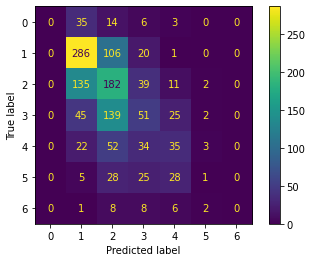

In [364]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - S ošetrenim outlierov

In [365]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_out_rf, y_train)

RandomForestClassifier()

In [366]:
y_pred_train = rf_model.predict(X_train_out_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       896
           2       1.00      1.00      1.00       856
           3       1.00      1.00      1.00       608
           4       1.00      1.00      1.00       416
           5       1.00      1.00      1.00       216
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [367]:
y_pred = rf_model.predict(X_test_out_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.7205882352941176
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.16      0.27        58
           1       0.75      0.87      0.81       413
           2       0.70      0.80      0.74       369
           3       0.72      0.67      0.69       262
           4       0.64      0.71      0.68       146
           5       0.88      0.40      0.55        87
           6       0.00      0.00      0.00        25

    accuracy                           0.72      1360
   macro avg       0.67      0.52      0.53      1360
weighted avg       0.72      0.72      0.70      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [368]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [369]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.72
Recall: 0.52
Precision: 0.67
F1 Score: 0.53


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


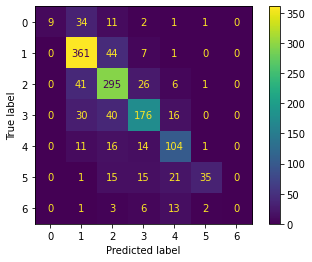

In [370]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - S ošetrenim outlierov a n-gram

In [371]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined_out_rf, y_train)

RandomForestClassifier()

In [372]:
y_pred_train = rf_model.predict(X_train_combined_out_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       896
           2       1.00      1.00      1.00       856
           3       1.00      1.00      1.00       608
           4       1.00      1.00      1.00       416
           5       1.00      1.00      1.00       216
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [373]:
y_pred = rf_model.predict(X_test_combined_out_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.5720588235294117
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.68      0.80      0.73       413
           2       0.50      0.74      0.60       369
           3       0.58      0.44      0.50       262
           4       0.47      0.38      0.42       146
           5       0.43      0.03      0.06        87
           6       0.00      0.00      0.00        25

    accuracy                           0.57      1360
   macro avg       0.38      0.34      0.33      1360
weighted avg       0.53      0.57      0.53      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [374]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [375]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.57
Recall: 0.34
Precision: 0.38
F1 Score: 0.33


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


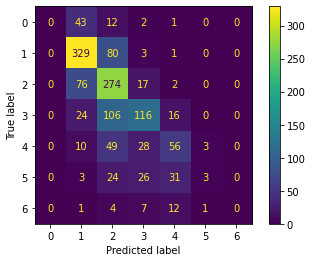

In [376]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - S ošetrenim outlierov a tfidf n-gram

In [377]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined2_out_rf, y_train)

RandomForestClassifier()

In [378]:
y_pred_train = rf_model.predict(X_train_combined2_out_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       896
           2       1.00      1.00      1.00       856
           3       1.00      1.00      1.00       608
           4       1.00      1.00      1.00       416
           5       1.00      1.00      1.00       216
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [379]:
y_pred = rf_model.predict(X_test_combined2_out_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.5470588235294118
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.66      0.82      0.73       413
           2       0.47      0.66      0.55       369
           3       0.54      0.42      0.47       262
           4       0.43      0.34      0.38       146
           5       0.45      0.06      0.10        87
           6       0.00      0.00      0.00        25

    accuracy                           0.55      1360
   macro avg       0.36      0.33      0.32      1360
weighted avg       0.51      0.55      0.51      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [380]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [381]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.55
Recall: 0.33
Precision: 0.36
F1 Score: 0.32


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


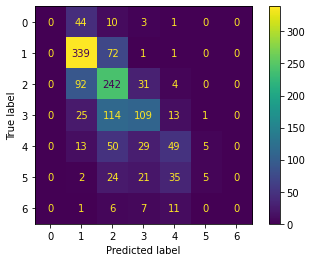

In [382]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - So škálovaním

In [383]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled_rf, y_train)

RandomForestClassifier()

In [384]:
y_pred_train = rf_model.predict(X_train_scaled_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       896
           2       1.00      1.00      1.00       856
           3       1.00      1.00      1.00       608
           4       1.00      1.00      1.00       416
           5       1.00      1.00      1.00       216
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [385]:
y_pred = rf_model.predict(X_test_scaled_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.36470588235294116
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.25      0.02      0.03        58
           1       0.48      0.61      0.54       413
           2       0.32      0.42      0.37       369
           3       0.26      0.21      0.23       262
           4       0.22      0.21      0.21       146
           5       0.19      0.03      0.06        87
           6       0.00      0.00      0.00        25

    accuracy                           0.36      1360
   macro avg       0.25      0.21      0.21      1360
weighted avg       0.33      0.36      0.34      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [386]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [387]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.36
Recall: 0.21
Precision: 0.25
F1 Score: 0.21


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


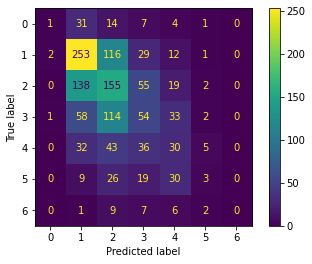

In [388]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - So škálovaním a n-gram

In [389]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined_scaled_rf, y_train)

RandomForestClassifier()

In [390]:
y_pred_train = rf_model.predict(X_train_combined_scaled_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       896
           2       1.00      1.00      1.00       856
           3       1.00      1.00      1.00       608
           4       1.00      1.00      1.00       416
           5       1.00      1.00      1.00       216
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [391]:
y_pred = rf_model.predict(X_test_combined_scaled_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4139705882352941
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.55      0.70      0.61       413
           2       0.34      0.51      0.41       369
           3       0.29      0.19      0.23       262
           4       0.32      0.22      0.26       146
           5       0.29      0.05      0.08        87
           6       0.00      0.00      0.00        25

    accuracy                           0.41      1360
   macro avg       0.26      0.24      0.23      1360
weighted avg       0.37      0.41      0.38      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [392]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [393]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.41
Recall: 0.24
Precision: 0.26
F1 Score: 0.23


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


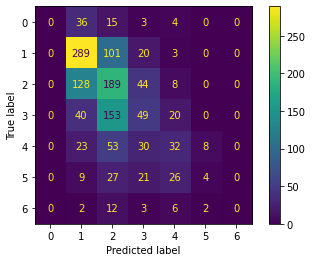

In [394]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - So škálovaním a tfidf n-gram

In [395]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined2_scaled_rf, y_train)

RandomForestClassifier()

In [396]:
y_pred_train = rf_model.predict(X_train_combined2_scaled_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       896
           2       1.00      1.00      1.00       856
           3       1.00      1.00      1.00       608
           4       1.00      1.00      1.00       416
           5       1.00      1.00      1.00       216
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [397]:
y_pred = rf_model.predict(X_test_combined2_scaled_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4073529411764706
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.54      0.72      0.62       413
           2       0.33      0.46      0.38       369
           3       0.27      0.20      0.23       262
           4       0.37      0.23      0.28       146
           5       0.40      0.02      0.04        87
           6       0.00      0.00      0.00        25

    accuracy                           0.41      1360
   macro avg       0.27      0.23      0.22      1360
weighted avg       0.37      0.41      0.37      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [398]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [399]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.41
Recall: 0.23
Precision: 0.27
F1 Score: 0.22


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


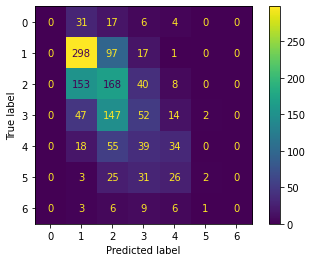

In [400]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - S ošetrením outlierov a so škálovaním

In [401]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scal_out_rf, y_train)

RandomForestClassifier()

In [402]:
y_pred_train = rf_model.predict(X_train_scal_out_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       896
           2       1.00      1.00      1.00       856
           3       1.00      1.00      1.00       608
           4       1.00      1.00      1.00       416
           5       1.00      1.00      1.00       216
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [403]:
y_pred = rf_model.predict(X_test_scal_out_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.711764705882353
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.17      0.29        58
           1       0.75      0.87      0.81       413
           2       0.69      0.79      0.74       369
           3       0.70      0.70      0.70       262
           4       0.61      0.65      0.63       146
           5       0.84      0.36      0.50        87
           6       0.00      0.00      0.00        25

    accuracy                           0.71      1360
   macro avg       0.66      0.50      0.52      1360
weighted avg       0.71      0.71      0.69      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [404]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [405]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.71
Recall: 0.50
Precision: 0.66
F1 Score: 0.52


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


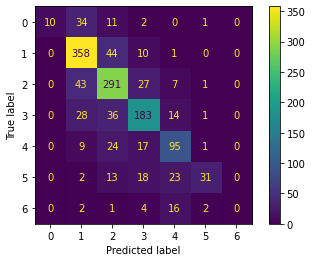

In [406]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - S ošetrením outlierov a so škálovaním a s n-gram

In [407]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined_scal_out_rf, y_train)

RandomForestClassifier()

In [408]:
y_pred_train = rf_model.predict(X_train_combined_scal_out_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       896
           2       1.00      1.00      1.00       856
           3       1.00      1.00      1.00       608
           4       1.00      1.00      1.00       416
           5       1.00      1.00      1.00       216
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [409]:
y_pred = rf_model.predict(X_test_combined_scal_out_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.5639705882352941
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.66      0.78      0.72       413
           2       0.49      0.72      0.58       369
           3       0.56      0.46      0.50       262
           4       0.50      0.38      0.43       146
           5       0.50      0.05      0.08        87
           6       0.00      0.00      0.00        25

    accuracy                           0.56      1360
   macro avg       0.39      0.34      0.33      1360
weighted avg       0.53      0.56      0.52      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [410]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [411]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.56
Recall: 0.34
Precision: 0.39
F1 Score: 0.33


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


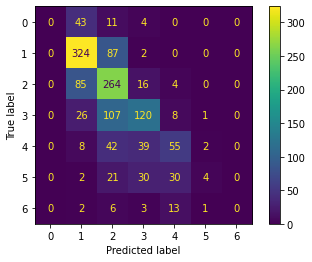

In [412]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - S ošetrením outlierov a so škálovaním a s tfidf-ngram

In [413]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined2_scal_out_rf, y_train)

RandomForestClassifier()

In [414]:
y_pred_train = rf_model.predict(X_train_combined2_scal_out_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       896
           2       1.00      1.00      1.00       856
           3       1.00      1.00      1.00       608
           4       1.00      1.00      1.00       416
           5       1.00      1.00      1.00       216
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [415]:
y_pred = rf_model.predict(X_test_combined2_scal_out_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.5536764705882353
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.63      0.81      0.71       413
           2       0.48      0.69      0.57       369
           3       0.58      0.42      0.49       262
           4       0.46      0.34      0.39       146
           5       0.38      0.03      0.06        87
           6       0.00      0.00      0.00        25

    accuracy                           0.55      1360
   macro avg       0.36      0.33      0.32      1360
weighted avg       0.51      0.55      0.51      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [416]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [417]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.55
Recall: 0.33
Precision: 0.36
F1 Score: 0.32


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


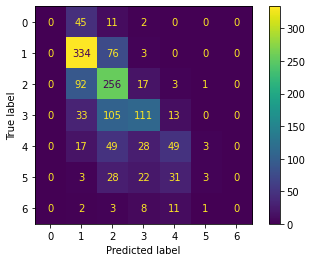

In [418]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

In [419]:
results_rf2 = pd.DataFrame(results_list2_rf)
print(results_rf2)

    accuracy_train  accuracy_test
0              1.0       0.376471
1              1.0       0.411765
2              1.0       0.408088
3              1.0       0.720588
4              1.0       0.572059
5              1.0       0.547059
6              1.0       0.364706
7              1.0       0.413971
8              1.0       0.407353
9              1.0       0.711765
10             1.0       0.563971
11             1.0       0.553676


Podľa výsledkov po druhom testovani random forest môžeme vidieť, že najlepší výsledok mal dataset s ošetrenými outliermi. Takže je zrejme, že najväčší vplyv na úspešnosť malo ošetrenie outlierov. V porovnaní s prvým testom sa accuracy moc nezmenilo. Aj ked sme zníšili počet črt, tak model je stále pretrénovaný. 

GRADIENT BOOSTING MASHINE - Bez ošetrenia outlierov a bez skalovania

In [420]:
results_list2_gbm=[]

Trenovanie modelu

In [421]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_gbm, y_train)

GradientBoostingClassifier()

Predikovanie na trenovacich datach

In [422]:
y_pred_train = gbm_model.predict(X_train_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.6819041614123581
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.99      0.55      0.71       134
           1       0.66      0.82      0.73       896
           2       0.59      0.72      0.65       856
           3       0.73      0.55      0.63       608
           4       0.78      0.57      0.66       416
           5       0.94      0.54      0.68       216
           6       1.00      1.00      1.00        46

    accuracy                           0.68      3172
   macro avg       0.81      0.68      0.72      3172
weighted avg       0.71      0.68      0.68      3172



Predikovanie na testovacich datach

In [423]:
y_pred = gbm_model.predict(X_test_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.37058823529411766
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.48      0.61      0.54       413
           2       0.34      0.46      0.39       369
           3       0.29      0.19      0.23       262
           4       0.26      0.21      0.23       146
           5       0.15      0.06      0.08        87
           6       0.00      0.00      0.00        25

    accuracy                           0.37      1360
   macro avg       0.22      0.22      0.21      1360
weighted avg       0.33      0.37      0.34      1360



In [424]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

Zobrazenie metrik

In [425]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.37
Recall: 0.22
Precision: 0.22
F1 Score: 0.21


Vizualizácia výkonnosti modelu

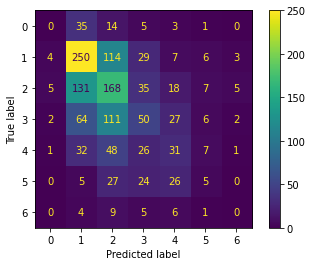

In [426]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING MASHINE - S n-gram

In [427]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined_gbm, y_train)

GradientBoostingClassifier()

In [428]:
y_pred_train = gbm_model.predict(X_train_combined_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.8830390920554855
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.81      0.90       134
           1       0.88      0.94      0.91       896
           2       0.81      0.91      0.86       856
           3       0.92      0.87      0.89       608
           4       0.95      0.79      0.86       416
           5       0.98      0.81      0.89       216
           6       1.00      0.98      0.99        46

    accuracy                           0.88      3172
   macro avg       0.93      0.87      0.90      3172
weighted avg       0.89      0.88      0.88      3172



In [429]:
y_pred = gbm_model.predict(X_test_combined_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.42573529411764705
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.21      0.07      0.10        58
           1       0.59      0.69      0.64       413
           2       0.39      0.47      0.43       369
           3       0.30      0.29      0.30       262
           4       0.28      0.21      0.24       146
           5       0.26      0.11      0.16        87
           6       0.06      0.04      0.05        25

    accuracy                           0.43      1360
   macro avg       0.30      0.27      0.27      1360
weighted avg       0.40      0.43      0.41      1360



In [430]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [431]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.43
Recall: 0.27
Precision: 0.30
F1 Score: 0.27


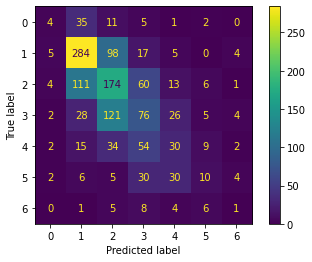

In [432]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING MASHINE - S n-gram tfidf

In [433]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined2_gbm, y_train)

GradientBoostingClassifier()

In [434]:
y_pred_train = gbm_model.predict(X_train_combined2_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9202395964691047
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.81      0.89       134
           1       0.91      0.97      0.94       896
           2       0.89      0.95      0.92       856
           3       0.92      0.93      0.93       608
           4       0.96      0.83      0.89       416
           5       0.97      0.83      0.90       216
           6       1.00      1.00      1.00        46

    accuracy                           0.92      3172
   macro avg       0.95      0.90      0.92      3172
weighted avg       0.92      0.92      0.92      3172



In [435]:
y_pred = gbm_model.predict(X_test_combined2_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4235294117647059
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.25      0.05      0.09        58
           1       0.60      0.67      0.63       413
           2       0.38      0.49      0.43       369
           3       0.32      0.24      0.28       262
           4       0.30      0.27      0.29       146
           5       0.26      0.13      0.17        87
           6       0.03      0.04      0.03        25

    accuracy                           0.42      1360
   macro avg       0.31      0.27      0.27      1360
weighted avg       0.41      0.42      0.41      1360



In [436]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [437]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.42
Recall: 0.27
Precision: 0.31
F1 Score: 0.27


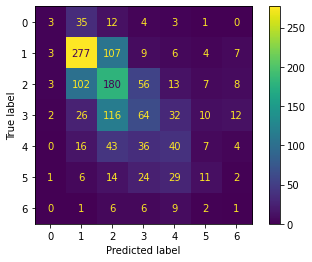

In [438]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING MASHINE - S ošetrenim outlierov

In [439]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_out_gbm, y_train)

GradientBoostingClassifier()

In [440]:
y_pred_train = gbm_model.predict(X_train_out_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9470365699873896
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94       134
           1       0.93      0.97      0.95       896
           2       0.91      0.96      0.93       856
           3       0.97      0.93      0.95       608
           4       0.99      0.92      0.96       416
           5       1.00      0.94      0.97       216
           6       1.00      1.00      1.00        46

    accuracy                           0.95      3172
   macro avg       0.97      0.94      0.96      3172
weighted avg       0.95      0.95      0.95      3172



In [441]:
y_pred = gbm_model.predict(X_test_out_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.825
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.47      0.64        58
           1       0.83      0.92      0.87       413
           2       0.81      0.87      0.84       369
           3       0.82      0.82      0.82       262
           4       0.83      0.81      0.82       146
           5       0.86      0.62      0.72        87
           6       0.71      0.20      0.31        25

    accuracy                           0.82      1360
   macro avg       0.84      0.67      0.72      1360
weighted avg       0.83      0.82      0.82      1360



In [442]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [443]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.82
Recall: 0.67
Precision: 0.84
F1 Score: 0.72


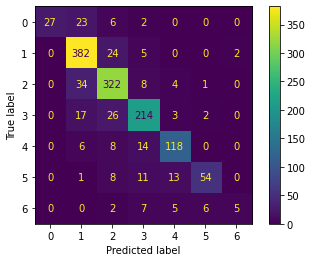

In [444]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING MASHINE - S ošetrenim outlierov a n-gram

In [445]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined_out_gbm, y_train)

GradientBoostingClassifier()

In [446]:
y_pred_train = gbm_model.predict(X_train_combined_out_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9807692307692307
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       134
           1       0.97      0.99      0.98       896
           2       0.96      0.99      0.98       856
           3       0.99      0.98      0.98       608
           4       1.00      0.95      0.97       416
           5       1.00      0.98      0.99       216
           6       1.00      1.00      1.00        46

    accuracy                           0.98      3172
   macro avg       0.99      0.98      0.98      3172
weighted avg       0.98      0.98      0.98      3172



In [447]:
y_pred = gbm_model.predict(X_test_combined_out_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.7933823529411764
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.88      0.40      0.55        58
           1       0.84      0.90      0.87       413
           2       0.76      0.87      0.81       369
           3       0.81      0.74      0.77       262
           4       0.78      0.78      0.78       146
           5       0.81      0.54      0.65        87
           6       0.25      0.20      0.22        25

    accuracy                           0.79      1360
   macro avg       0.73      0.63      0.66      1360
weighted avg       0.79      0.79      0.79      1360



In [448]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [449]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.79
Recall: 0.63
Precision: 0.73
F1 Score: 0.66


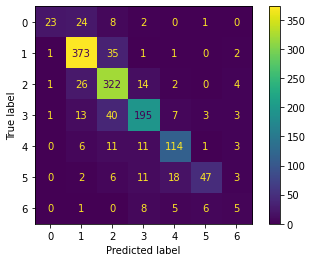

In [450]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING MASHINE - S ošetrenim outlierov a tfidf n-gram

In [451]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined2_out_gbm, y_train)

GradientBoostingClassifier()

In [452]:
y_pred_train = gbm_model.predict(X_train_combined2_out_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9895964691046658
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98       134
           1       0.99      1.00      0.99       896
           2       0.98      1.00      0.99       856
           3       0.99      0.99      0.99       608
           4       1.00      0.96      0.98       416
           5       1.00      0.98      0.99       216
           6       1.00      1.00      1.00        46

    accuracy                           0.99      3172
   macro avg       0.99      0.99      0.99      3172
weighted avg       0.99      0.99      0.99      3172



In [453]:
y_pred = gbm_model.predict(X_test_combined2_out_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.7845588235294118
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.76      0.33      0.46        58
           1       0.82      0.89      0.85       413
           2       0.75      0.87      0.80       369
           3       0.80      0.76      0.78       262
           4       0.81      0.76      0.78       146
           5       0.82      0.54      0.65        87
           6       0.28      0.20      0.23        25

    accuracy                           0.78      1360
   macro avg       0.72      0.62      0.65      1360
weighted avg       0.78      0.78      0.78      1360



In [454]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [455]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.78
Recall: 0.62
Precision: 0.72
F1 Score: 0.65


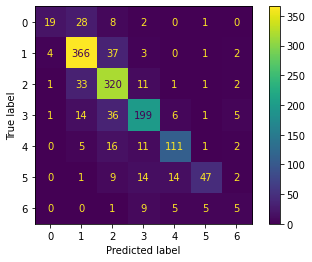

In [456]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING MASHINE - So škálovaním

In [457]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_scaled_gbm, y_train)

GradientBoostingClassifier()

In [458]:
y_pred_train = gbm_model.predict(X_train_scaled_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.6702395964691047
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.54      0.71       134
           1       0.65      0.81      0.72       896
           2       0.58      0.73      0.65       856
           3       0.72      0.53      0.61       608
           4       0.77      0.55      0.64       416
           5       0.94      0.49      0.64       216
           6       1.00      1.00      1.00        46

    accuracy                           0.67      3172
   macro avg       0.81      0.66      0.71      3172
weighted avg       0.70      0.67      0.67      3172



In [459]:
y_pred = gbm_model.predict(X_test_scaled_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.38382352941176473
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.11      0.02      0.03        58
           1       0.50      0.61      0.55       413
           2       0.36      0.50      0.42       369
           3       0.28      0.18      0.22       262
           4       0.28      0.21      0.24       146
           5       0.17      0.06      0.09        87
           6       0.00      0.00      0.00        25

    accuracy                           0.38      1360
   macro avg       0.24      0.23      0.22      1360
weighted avg       0.35      0.38      0.35      1360



In [460]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [461]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.38
Recall: 0.23
Precision: 0.24
F1 Score: 0.22


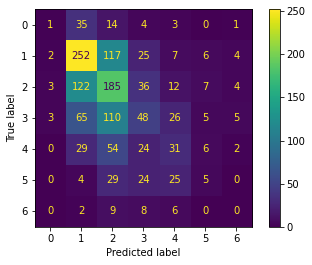

In [462]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING MASHINE - So škálovaním a n-gram

In [463]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined_scaled_gbm, y_train)

GradientBoostingClassifier()

In [464]:
y_pred_train = gbm_model.predict(X_train_combined_scaled_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.8786254728877679
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.82      0.90       134
           1       0.87      0.93      0.90       896
           2       0.80      0.90      0.85       856
           3       0.91      0.86      0.88       608
           4       0.96      0.78      0.86       416
           5       0.99      0.82      0.90       216
           6       1.00      1.00      1.00        46

    accuracy                           0.88      3172
   macro avg       0.93      0.87      0.90      3172
weighted avg       0.89      0.88      0.88      3172



In [465]:
y_pred = gbm_model.predict(X_test_combined_scaled_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.42867647058823527
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.22      0.07      0.11        58
           1       0.61      0.69      0.65       413
           2       0.38      0.49      0.43       369
           3       0.32      0.28      0.30       262
           4       0.30      0.23      0.26       146
           5       0.21      0.09      0.13        87
           6       0.05      0.04      0.04        25

    accuracy                           0.43      1360
   macro avg       0.30      0.27      0.27      1360
weighted avg       0.40      0.43      0.41      1360



In [466]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [467]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.43
Recall: 0.27
Precision: 0.30
F1 Score: 0.27


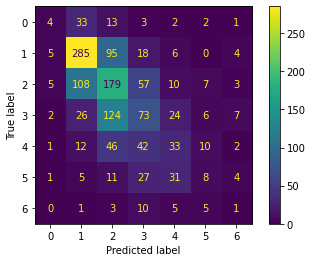

In [468]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

So škálovaním a tfidf n-gram

In [469]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined2_scaled_gbm, y_train)

GradientBoostingClassifier()

In [470]:
y_pred_train = gbm_model.predict(X_train_combined2_scaled_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9151954602774275
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89       134
           1       0.92      0.96      0.94       896
           2       0.87      0.94      0.90       856
           3       0.92      0.94      0.93       608
           4       0.95      0.80      0.87       416
           5       0.97      0.83      0.90       216
           6       1.00      1.00      1.00        46

    accuracy                           0.92      3172
   macro avg       0.95      0.90      0.92      3172
weighted avg       0.92      0.92      0.91      3172



In [471]:
y_pred = gbm_model.predict(X_test_combined2_scaled_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.43308823529411766
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.36      0.09      0.14        58
           1       0.60      0.70      0.65       413
           2       0.38      0.48      0.42       369
           3       0.32      0.25      0.28       262
           4       0.31      0.27      0.29       146
           5       0.24      0.10      0.15        87
           6       0.04      0.04      0.04        25

    accuracy                           0.43      1360
   macro avg       0.32      0.28      0.28      1360
weighted avg       0.41      0.43      0.41      1360



In [472]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [473]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.43
Recall: 0.28
Precision: 0.32
F1 Score: 0.28


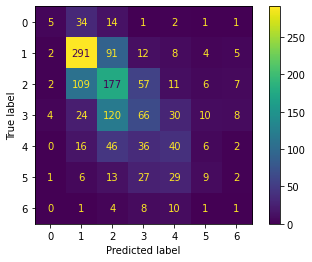

In [474]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING MASHINE - S ošetrením outlierov a so škálovaním

In [475]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_scal_out_gbm, y_train)

GradientBoostingClassifier()

In [476]:
y_pred_train = gbm_model.predict(X_train_scal_out_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9470365699873896
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94       134
           1       0.93      0.97      0.95       896
           2       0.91      0.96      0.93       856
           3       0.97      0.93      0.95       608
           4       0.99      0.92      0.96       416
           5       1.00      0.94      0.97       216
           6       1.00      1.00      1.00        46

    accuracy                           0.95      3172
   macro avg       0.97      0.94      0.96      3172
weighted avg       0.95      0.95      0.95      3172



In [477]:
y_pred = gbm_model.predict(X_test_scal_out_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.8264705882352941
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.47      0.64        58
           1       0.83      0.92      0.87       413
           2       0.82      0.87      0.84       369
           3       0.82      0.82      0.82       262
           4       0.83      0.81      0.82       146
           5       0.86      0.62      0.72        87
           6       0.75      0.24      0.36        25

    accuracy                           0.83      1360
   macro avg       0.84      0.68      0.72      1360
weighted avg       0.83      0.83      0.82      1360



In [478]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [479]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.83
Recall: 0.68
Precision: 0.84
F1 Score: 0.72


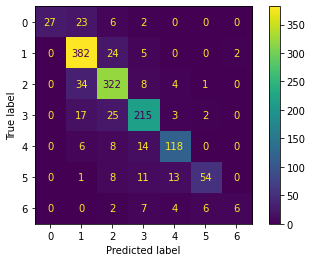

In [480]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING MASHINE - S ošetrením outlierov a so škálovaním a n-gram

In [481]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined_scal_out_gbm, y_train)

GradientBoostingClassifier()

In [482]:
y_pred_train = gbm_model.predict(X_train_combined_scal_out_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9807692307692307
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       134
           1       0.97      0.99      0.98       896
           2       0.96      0.99      0.98       856
           3       0.99      0.98      0.98       608
           4       1.00      0.95      0.97       416
           5       1.00      0.98      0.99       216
           6       1.00      1.00      1.00        46

    accuracy                           0.98      3172
   macro avg       0.99      0.98      0.98      3172
weighted avg       0.98      0.98      0.98      3172



In [483]:
y_pred = gbm_model.predict(X_test_combined_scal_out_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.7970588235294118
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.88      0.40      0.55        58
           1       0.84      0.91      0.87       413
           2       0.76      0.88      0.82       369
           3       0.81      0.74      0.78       262
           4       0.78      0.79      0.78       146
           5       0.83      0.55      0.66        87
           6       0.29      0.20      0.24        25

    accuracy                           0.80      1360
   macro avg       0.74      0.64      0.67      1360
weighted avg       0.80      0.80      0.79      1360



In [484]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [485]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.80
Recall: 0.64
Precision: 0.74
F1 Score: 0.67


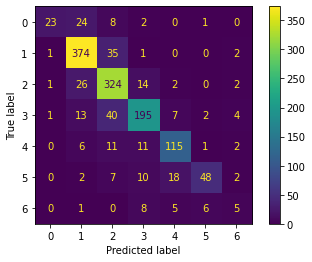

In [486]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING MASHINE - S ošetrením outlierov a so škálovaním a tfidf n-gram

In [487]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined2_scal_out_gbm, y_train)

GradientBoostingClassifier()

In [488]:
y_pred_train = gbm_model.predict(X_train_combined2_scal_out_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9895964691046658
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98       134
           1       0.99      1.00      0.99       896
           2       0.98      1.00      0.99       856
           3       0.99      0.99      0.99       608
           4       1.00      0.96      0.98       416
           5       1.00      0.98      0.99       216
           6       1.00      1.00      1.00        46

    accuracy                           0.99      3172
   macro avg       0.99      0.99      0.99      3172
weighted avg       0.99      0.99      0.99      3172



In [489]:
y_pred = gbm_model.predict(X_test_combined2_scal_out_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.788235294117647
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.76      0.33      0.46        58
           1       0.82      0.89      0.85       413
           2       0.75      0.87      0.81       369
           3       0.80      0.76      0.78       262
           4       0.79      0.77      0.78       146
           5       0.87      0.55      0.68        87
           6       0.35      0.24      0.29        25

    accuracy                           0.79      1360
   macro avg       0.74      0.63      0.66      1360
weighted avg       0.79      0.79      0.78      1360



In [490]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [491]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.79
Recall: 0.63
Precision: 0.74
F1 Score: 0.66


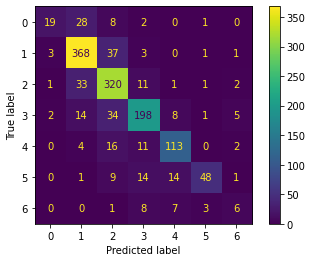

In [492]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

In [493]:
results_gbm2 = pd.DataFrame(results_list2_gbm)
print(results_gbm2)

    accuracy_train  accuracy_test
0         0.681904       0.370588
1         0.883039       0.425735
2         0.920240       0.423529
3         0.947037       0.825000
4         0.980769       0.793382
5         0.989596       0.784559
6         0.670240       0.383824
7         0.878625       0.428676
8         0.915195       0.433088
9         0.947037       0.826471
10        0.980769       0.797059
11        0.989596       0.788235


Podľa výsledkov po druhom testovani random forest môžeme vidieť, že najlepší výsledok mal dataset s ošetrenými outliermi a skalovaním.Takže je zrejme, že najväčší vplyv na úspešnosť malo ošetrenie outlierov. V porovnaní s prvým testom sa accuracy moc nezmenilo, niekde sa mierne znížilo, niekde mierne zvýšilo. Aj ked sme zníšili počet črt, tak model je stále pretrénovaný. 

HYPERPARAMETRE

Teraz vykonáme testovanie 3, pričom použijeme datasety s výberom črt. Preddefinujeme si hyperparametre, ktoré bude gridsearch skúšať a bude hľadať tú najlepšiu kombináciu aby dosiahol čím najvýšie accuracy. Potom s týmito parametrami si spustíme predikciu na trenovacej aj testovacej sade. 

SVC - bez osetrenia outlierov a skalovania

In [494]:
results_list3_svc=[]

Určenie hyperparametrov, ktore budeme v grid search skúšať

In [495]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'coef0': [0.0, 0.5, 1.0, 1.5],
}

Grid search - vyskúša každú kombináciu hyperparametrov a vypíše tu najlepšiu pre accuracy

In [496]:
model = SVC()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=8)
grid_search.fit(X_train_svc, y_train)
print("Najlepšie parametre:", grid_search.best_params_)
print("Najlepšie skóre:", grid_search.best_score_)

Najlepšie parametre: {'C': 100, 'coef0': 1.0, 'gamma': 'auto', 'kernel': 'poly'}
Najlepšie skóre: 0.36128617203606644


Predikovanie na trenovacich datach

In [497]:
best_model = grid_search.best_estimator_
y_pred_train = best_model.predict(X_train_svc)

In [498]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.42402269861286257
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.04      0.07       134
           1       0.50      0.67      0.57       896
           2       0.36      0.60      0.45       856
           3       0.39      0.15      0.22       608
           4       0.43      0.27      0.33       416
           5       0.78      0.12      0.20       216
           6       1.00      0.11      0.20        46

    accuracy                           0.42      3172
   macro avg       0.64      0.28      0.29      3172
weighted avg       0.48      0.42      0.39      3172



Predikovanie na testovacich datach

In [499]:
y_pred = best_model.predict(X_test_svc)

In [500]:
results_list3_svc.append({
        'best_score': grid_search.best_score_,
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [501]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.37426470588235294
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.48      0.61      0.54       413
           2       0.33      0.56      0.41       369
           3       0.25      0.09      0.13       262
           4       0.26      0.16      0.20       146
           5       0.22      0.02      0.04        87
           6       0.00      0.00      0.00        25

    accuracy                           0.37      1360
   macro avg       0.22      0.21      0.19      1360
weighted avg       0.33      0.37      0.33      1360



Vizualizácia výkonnosti modelu

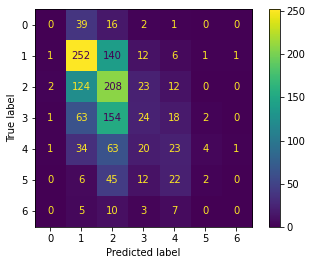

In [502]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

SVC - bez osetrenia outlierov a skalovania a ngram

In [503]:
model = SVC(**grid_search.best_params_)
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined_svc, y_train)
# print("Najlepšie parametre:", grid_search.best_params_)
# print("Najlepšie skóre:", grid_search.best_score_)

SVC(C=100, coef0=1.0, gamma='auto', kernel='poly')

In [504]:
y_pred_train = model.predict(X_train_combined_svc)

In [505]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       896
           2       1.00      1.00      1.00       856
           3       1.00      1.00      1.00       608
           4       1.00      1.00      1.00       416
           5       1.00      1.00      1.00       216
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [506]:
y_pred = model.predict(X_test_combined_svc)

In [507]:
results_list3_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [508]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.40147058823529413
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.24      0.28      0.26        58
           1       0.60      0.61      0.61       413
           2       0.40      0.39      0.40       369
           3       0.34      0.31      0.33       262
           4       0.21      0.27      0.24       146
           5       0.17      0.10      0.13        87
           6       0.06      0.08      0.07        25

    accuracy                           0.40      1360
   macro avg       0.29      0.29      0.29      1360
weighted avg       0.40      0.40      0.40      1360



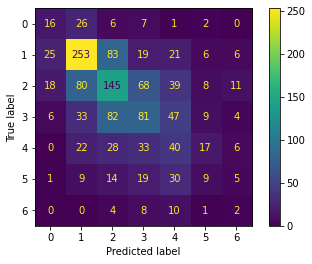

In [509]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

SVC - bez osetrenia outlierov a skalovania a tfidf ngram

In [510]:
model = SVC(**grid_search.best_params_)
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined2_svc, y_train)
# print("Najlepšie parametre:", grid_search.best_params_)
# print("Najlepšie skóre:", grid_search.best_score_)

SVC(C=100, coef0=1.0, gamma='auto', kernel='poly')

In [511]:
y_pred_train = model.predict(X_train_combined2_svc)

In [512]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.42055485498108447
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       134
           1       0.57      0.67      0.62       896
           2       0.35      0.65      0.46       856
           3       0.30      0.15      0.20       608
           4       0.36      0.20      0.26       416
           5       1.00      0.01      0.03       216
           6       0.00      0.00      0.00        46

    accuracy                           0.42      3172
   macro avg       0.37      0.24      0.22      3172
weighted avg       0.43      0.42      0.37      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [513]:
y_pred = model.predict(X_test_combined2_svc)

In [514]:
results_list3_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [515]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.41544117647058826
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.58      0.65      0.61       413
           2       0.34      0.64      0.44       369
           3       0.30      0.13      0.18       262
           4       0.31      0.19      0.24       146
           5       0.00      0.00      0.00        87
           6       0.00      0.00      0.00        25

    accuracy                           0.42      1360
   macro avg       0.22      0.23      0.21      1360
weighted avg       0.36      0.42      0.37      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


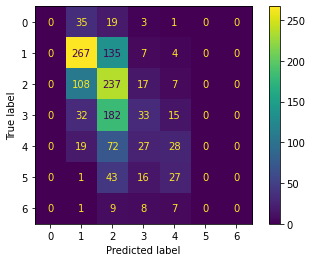

In [516]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

SVC - s osetrenim outlierov

In [517]:
model = SVC()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=8)
grid_search.fit(X_train_out_svc, y_train)
print("Najlepšie parametre:", grid_search.best_params_)
print("Najlepšie skóre:", grid_search.best_score_)

Najlepšie parametre: {'C': 100, 'coef0': 0.0, 'gamma': 'scale', 'kernel': 'rbf'}
Najlepšie skóre: 0.4833006284309098


In [518]:
best_model = grid_search.best_estimator_
y_pred_train = best_model.predict(X_train_out_svc)

In [519]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.5974148802017655
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.12      0.21       134
           1       0.66      0.77      0.71       896
           2       0.51      0.70      0.59       856
           3       0.59      0.47      0.52       608
           4       0.62      0.54      0.58       416
           5       0.85      0.28      0.42       216
           6       1.00      0.41      0.58        46

    accuracy                           0.60      3172
   macro avg       0.75      0.47      0.52      3172
weighted avg       0.63      0.60      0.58      3172



In [520]:
y_pred = best_model.predict(X_test_out_svc)

In [521]:
results_list3_svc.append({
        'best_score': grid_search.best_score_,
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [522]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4889705882352941
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.50      0.03      0.06        58
           1       0.64      0.71      0.67       413
           2       0.43      0.64      0.51       369
           3       0.42      0.31      0.36       262
           4       0.37      0.34      0.35       146
           5       0.19      0.05      0.07        87
           6       0.33      0.04      0.07        25

    accuracy                           0.49      1360
   macro avg       0.41      0.30      0.30      1360
weighted avg       0.47      0.49      0.46      1360



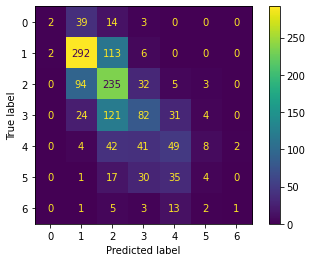

In [523]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

SVC -  s osetrenim outlierov a ngram

In [524]:
model = SVC(**grid_search.best_params_)
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined_out_svc, y_train)
# print("Najlepšie parametre:", grid_search.best_params_)
# print("Najlepšie skóre:", grid_search.best_score_)

SVC(C=100)

In [525]:
y_pred_train = model.predict(X_train_combined_out_svc)

In [526]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9419924337957125
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       134
           1       0.91      0.96      0.93       896
           2       0.92      0.94      0.93       856
           3       0.96      0.94      0.95       608
           4       1.00      0.92      0.95       416
           5       1.00      0.95      0.98       216
           6       1.00      0.96      0.98        46

    accuracy                           0.94      3172
   macro avg       0.96      0.94      0.95      3172
weighted avg       0.94      0.94      0.94      3172



In [527]:
y_pred = model.predict(X_test_combined_out_svc)

In [528]:
results_list3_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [529]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4117647058823529
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.28      0.17      0.21        58
           1       0.60      0.67      0.63       413
           2       0.39      0.40      0.40       369
           3       0.34      0.33      0.34       262
           4       0.20      0.22      0.21       146
           5       0.14      0.08      0.10        87
           6       0.00      0.00      0.00        25

    accuracy                           0.41      1360
   macro avg       0.28      0.27      0.27      1360
weighted avg       0.39      0.41      0.40      1360



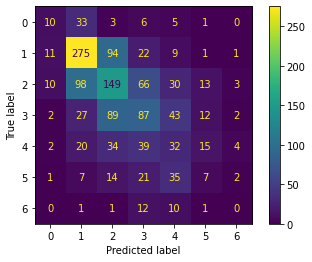

In [530]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

SVC -  s osetrenim outlierov a tfidf ngram

In [531]:
model = SVC(**grid_search.best_params_)
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined2_out_svc, y_train)
# print("Najlepšie parametre:", grid_search.best_params_)
# print("Najlepšie skóre:", grid_search.best_score_)

SVC(C=100)

In [532]:
y_pred_train = model.predict(X_train_combined2_out_svc)

In [533]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.8133669609079445
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.94      0.57      0.71       134
           1       0.83      0.91      0.87       896
           2       0.77      0.84      0.81       856
           3       0.78      0.78      0.78       608
           4       0.81      0.77      0.79       416
           5       0.98      0.65      0.78       216
           6       1.00      0.70      0.82        46

    accuracy                           0.81      3172
   macro avg       0.87      0.75      0.79      3172
weighted avg       0.82      0.81      0.81      3172



In [534]:
y_pred = model.predict(X_test_combined2_out_svc)

In [535]:
results_list3_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [536]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.5161764705882353
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.41      0.21      0.28        58
           1       0.70      0.73      0.72       413
           2       0.50      0.59      0.54       369
           3       0.41      0.44      0.42       262
           4       0.33      0.32      0.33       146
           5       0.21      0.11      0.15        87
           6       0.00      0.00      0.00        25

    accuracy                           0.52      1360
   macro avg       0.37      0.34      0.35      1360
weighted avg       0.49      0.52      0.50      1360



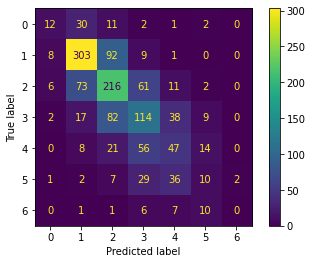

In [537]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

SVC - so skalovanim

In [538]:
model = SVC()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=8)
grid_search.fit(X_train_scaled_svc, y_train)
print("Najlepšie parametre:", grid_search.best_params_)
print("Najlepšie skóre:", grid_search.best_score_)

Najlepšie parametre: {'C': 10, 'coef0': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
Najlepšie skóre: 0.3723197297498696


In [539]:
best_model = grid_search.best_estimator_
y_pred_train = best_model.predict(X_train_scaled_svc)

In [540]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.4306431273644388
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       134
           1       0.48      0.69      0.57       896
           2       0.37      0.55      0.44       856
           3       0.41      0.20      0.27       608
           4       0.49      0.27      0.35       416
           5       0.62      0.13      0.21       216
           6       1.00      0.20      0.33        46

    accuracy                           0.43      3172
   macro avg       0.48      0.29      0.31      3172
weighted avg       0.43      0.43      0.40      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [541]:
y_pred = best_model.predict(X_test_scaled_svc)

In [542]:
results_list3_svc.append({
        'best_score': grid_search.best_score_,
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [543]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.36617647058823527
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.47      0.64      0.55       413
           2       0.31      0.48      0.38       369
           3       0.24      0.11      0.15       262
           4       0.26      0.15      0.19       146
           5       0.22      0.05      0.08        87
           6       0.20      0.04      0.07        25

    accuracy                           0.37      1360
   macro avg       0.24      0.21      0.20      1360
weighted avg       0.32      0.37      0.32      1360



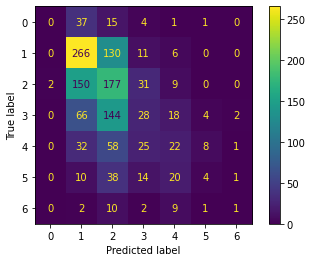

In [544]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

SVC - so skalovanim a ngram

In [545]:
model = SVC(**grid_search.best_params_)
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined_scaled_svc, y_train)
# print("Najlepšie parametre:", grid_search.best_params_)
# print("Najlepšie skóre:", grid_search.best_score_)

SVC(C=10, coef0=1.0, kernel='poly')

In [546]:
y_pred_train = model.predict(X_train_combined_scaled_svc)

In [547]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.8133669609079445
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.96      0.51      0.66       134
           1       0.77      0.90      0.83       896
           2       0.74      0.83      0.78       856
           3       0.86      0.77      0.81       608
           4       0.93      0.78      0.85       416
           5       1.00      0.75      0.86       216
           6       1.00      0.76      0.86        46

    accuracy                           0.81      3172
   macro avg       0.89      0.76      0.81      3172
weighted avg       0.83      0.81      0.81      3172



In [548]:
y_pred = model.predict(X_test_combined_scaled_svc)

In [549]:
results_list3_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [550]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4264705882352941
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.13      0.07      0.09        58
           1       0.57      0.68      0.62       413
           2       0.42      0.47      0.44       369
           3       0.35      0.30      0.33       262
           4       0.23      0.23      0.23       146
           5       0.17      0.08      0.11        87
           6       0.07      0.04      0.05        25

    accuracy                           0.43      1360
   macro avg       0.28      0.27      0.27      1360
weighted avg       0.40      0.43      0.41      1360



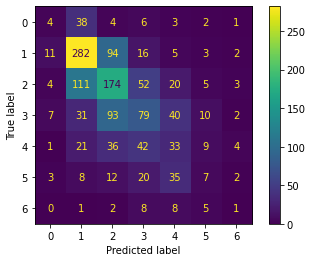

In [551]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

SVC - so skalovanim a tfidf ngram

In [552]:
model = SVC(**grid_search.best_params_)
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined2_scaled_svc, y_train)
# print("Najlepšie parametre:", grid_search.best_params_)
# print("Najlepšie skóre:", grid_search.best_score_)

SVC(C=10, coef0=1.0, kernel='poly')

In [553]:
y_pred_train = model.predict(X_train_combined2_scaled_svc)

In [554]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.8660151324085751
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.94      0.80      0.86       134
           1       0.85      0.92      0.88       896
           2       0.82      0.88      0.85       856
           3       0.86      0.85      0.85       608
           4       0.92      0.81      0.86       416
           5       0.98      0.83      0.90       216
           6       1.00      0.87      0.93        46

    accuracy                           0.87      3172
   macro avg       0.91      0.85      0.88      3172
weighted avg       0.87      0.87      0.87      3172



In [555]:
y_pred = model.predict(X_test_combined2_scaled_svc)

In [556]:
results_list3_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [557]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.44191176470588234
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.37      0.22      0.28        58
           1       0.61      0.67      0.64       413
           2       0.44      0.48      0.46       369
           3       0.35      0.34      0.35       262
           4       0.24      0.25      0.25       146
           5       0.19      0.11      0.14        87
           6       0.00      0.00      0.00        25

    accuracy                           0.44      1360
   macro avg       0.31      0.30      0.30      1360
weighted avg       0.42      0.44      0.43      1360



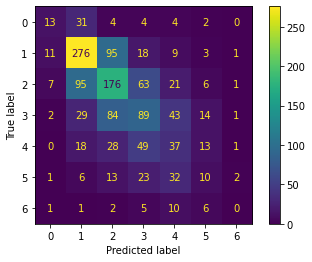

In [558]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

SVC - s osetrenim outlierov a so skalovanim 

In [559]:
model = SVC()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=8)
grid_search.fit(X_train_scal_out_svc, y_train)
print("Najlepšie parametre:", grid_search.best_params_)
print("Najlepšie skóre:", grid_search.best_score_)

Najlepšie parametre: {'C': 100, 'coef0': 0.0, 'gamma': 'scale', 'kernel': 'rbf'}
Najlepšie skóre: 0.4833006284309098


In [560]:
best_model = grid_search.best_estimator_
y_pred_train = best_model.predict(X_train_scal_out_svc)

In [561]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.5974148802017655
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.12      0.21       134
           1       0.66      0.77      0.71       896
           2       0.51      0.70      0.59       856
           3       0.59      0.47      0.52       608
           4       0.62      0.54      0.58       416
           5       0.85      0.28      0.42       216
           6       1.00      0.41      0.58        46

    accuracy                           0.60      3172
   macro avg       0.75      0.47      0.52      3172
weighted avg       0.63      0.60      0.58      3172



In [562]:
y_pred = best_model.predict(X_test_scal_out_svc)

In [563]:
results_list3_svc.append({
        'best_score': grid_search.best_score_,
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [564]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4889705882352941
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.50      0.03      0.06        58
           1       0.64      0.71      0.67       413
           2       0.43      0.64      0.51       369
           3       0.42      0.31      0.36       262
           4       0.37      0.34      0.35       146
           5       0.19      0.05      0.07        87
           6       0.33      0.04      0.07        25

    accuracy                           0.49      1360
   macro avg       0.41      0.30      0.30      1360
weighted avg       0.47      0.49      0.46      1360



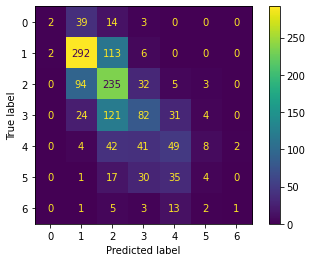

In [565]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

SVC - s osetrenim outlierov a so skalovanim a ngram

In [566]:
model = SVC(**grid_search.best_params_)
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined_scal_out_svc, y_train)
# print("Najlepšie parametre:", grid_search.best_params_)
# print("Najlepšie skóre:", grid_search.best_score_)

SVC(C=100)

In [567]:
y_pred_train = model.predict(X_train_combined_scal_out_svc)

In [568]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9419924337957125
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       134
           1       0.91      0.96      0.93       896
           2       0.92      0.94      0.93       856
           3       0.96      0.94      0.95       608
           4       1.00      0.92      0.95       416
           5       1.00      0.95      0.98       216
           6       1.00      0.96      0.98        46

    accuracy                           0.94      3172
   macro avg       0.96      0.94      0.95      3172
weighted avg       0.94      0.94      0.94      3172



In [569]:
y_pred = model.predict(X_test_combined_scal_out_svc)

In [570]:
results_list3_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [571]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4117647058823529
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.28      0.17      0.21        58
           1       0.60      0.67      0.63       413
           2       0.39      0.40      0.40       369
           3       0.34      0.33      0.34       262
           4       0.20      0.22      0.21       146
           5       0.14      0.08      0.10        87
           6       0.00      0.00      0.00        25

    accuracy                           0.41      1360
   macro avg       0.28      0.27      0.27      1360
weighted avg       0.39      0.41      0.40      1360



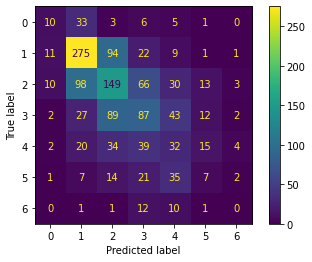

In [572]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

SVC - s osetrenim outlierov a so skalovanim a tfidf n-gram

In [573]:
model = SVC(**grid_search.best_params_)
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined2_scal_out_svc, y_train)
# print("Najlepšie parametre:", grid_search.best_params_)
# print("Najlepšie skóre:", grid_search.best_score_)

SVC(C=100)

In [574]:
y_pred_train = model.predict(X_train_combined2_scal_out_svc)

In [575]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.8133669609079445
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.94      0.57      0.71       134
           1       0.83      0.91      0.87       896
           2       0.77      0.84      0.81       856
           3       0.78      0.78      0.78       608
           4       0.81      0.77      0.79       416
           5       0.98      0.65      0.78       216
           6       1.00      0.70      0.82        46

    accuracy                           0.81      3172
   macro avg       0.87      0.75      0.79      3172
weighted avg       0.82      0.81      0.81      3172



In [576]:
y_pred = model.predict(X_test_combined2_scal_out_svc)

In [577]:
results_list3_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [578]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.5161764705882353
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.41      0.21      0.28        58
           1       0.70      0.73      0.72       413
           2       0.50      0.59      0.54       369
           3       0.41      0.44      0.42       262
           4       0.33      0.32      0.33       146
           5       0.21      0.11      0.15        87
           6       0.00      0.00      0.00        25

    accuracy                           0.52      1360
   macro avg       0.37      0.34      0.35      1360
weighted avg       0.49      0.52      0.50      1360



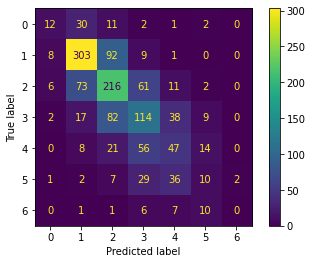

In [579]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

In [580]:
results_svc3 = pd.DataFrame(results_list3_svc)
print(results_svc3)

    best_score  accuracy_train  accuracy_test
0     0.361286        0.424023       0.374265
1          NaN        1.000000       0.401471
2          NaN        0.420555       0.415441
3     0.483301        0.597415       0.488971
4          NaN        0.941992       0.411765
5          NaN        0.813367       0.516176
6     0.372320        0.430643       0.366176
7          NaN        0.813367       0.426471
8          NaN        0.866015       0.441912
9     0.483301        0.597415       0.488971
10         NaN        0.941992       0.411765
11         NaN        0.813367       0.516176


Najvyššiu presnosť sme získali s datasetom s ošetrenými outliermi a tfidf ngramamy a s datasetom s ošetrenými outliermi a skalovaním a tfidf ngramamy. Najviac na skore vplýva pridanie textovej reprezentácie tfidf ngram. Skore sa zvýšilo oproti druhému testovaniu

RANDOM FOREST - bez osetrenia outlierov a skalovania

In [581]:
results_list3_rf=[]

Určenie hyperparametrov, ktore budeme v grid search skúšať

In [582]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],  # Počet stromov v lese
    'max_depth': [None, 10, 20, 30, 40],  # Maximálna hĺbka stromu
    'min_samples_split': [2, 5, 10],  # Minimálny počet vzoriek potrebný na rozdelenie uzla
    'min_samples_leaf': [1, 2, 4]  # Minimálny počet vzoriek potrebný v listovom uzle
}

Grid search - bude skúšať všetky kombinácie hyperparametrov a vyberie tie najlepšie pre accuracy

In [583]:
model = RandomForestClassifier()
grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
grid_search_rf.fit(X_train_rf, y_train)
print("Najlepší hyperparametre:", grid_search_rf.best_params_)
print("Najlepší skóre:", grid_search_rf.best_score_)

Najlepší hyperparametre: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Najlepší skóre: 0.37358255296952236


Predikovanie na trenovacich datach

In [584]:
best_rf_model = grid_search_rf.best_estimator_
y_pred_train_rf = best_rf_model.predict(X_train_rf)

In [585]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 0.8855611601513241
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.28      0.43       134
           1       0.83      0.98      0.90       896
           2       0.89      0.96      0.92       856
           3       0.92      0.93      0.92       608
           4       0.92      0.86      0.89       416
           5       0.95      0.69      0.80       216
           6       1.00      0.09      0.16        46

    accuracy                           0.89      3172
   macro avg       0.93      0.68      0.72      3172
weighted avg       0.89      0.89      0.87      3172



Predikovanie na testovacich datach

In [586]:
y_pred_rf = best_rf_model.predict(X_test_rf)

In [587]:
results_list3_rf.append({
        'best_score': grid_search_rf.best_score_,
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
        'accuracy_test': accuracy_score(y_test, y_pred_rf)
    })

In [588]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.3654411764705882
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.48      0.62      0.54       413
           2       0.33      0.43      0.37       369
           3       0.22      0.17      0.19       262
           4       0.28      0.24      0.26       146
           5       0.23      0.03      0.06        87
           6       0.00      0.00      0.00        25

    accuracy                           0.37      1360
   macro avg       0.22      0.21      0.20      1360
weighted avg       0.32      0.37      0.33      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Vizualizácia výkonnosti modelu

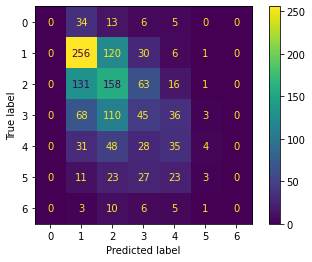

In [589]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

RANDOM FOREST - bez osetrenia outlierov a skalovania s ngram

In [590]:
model = RandomForestClassifier(**grid_search_rf.best_params_)
# grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined_rf, y_train)
# print("Najlepší hyperparametre:", grid_search_rf.best_params_)
# print("Najlepší skóre:", grid_search_rf.best_score_)

RandomForestClassifier(max_depth=30, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=50)

In [591]:
y_pred_train_rf = model.predict(X_train_combined_rf)

In [592]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 0.9640605296343001
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.71      0.83       134
           1       0.94      1.00      0.97       896
           2       0.96      1.00      0.98       856
           3       0.98      0.99      0.98       608
           4       0.99      0.97      0.98       416
           5       0.99      0.90      0.94       216
           6       1.00      0.35      0.52        46

    accuracy                           0.96      3172
   macro avg       0.98      0.84      0.89      3172
weighted avg       0.97      0.96      0.96      3172



In [593]:
y_pred_rf = model.predict(X_test_combined_rf)

In [594]:
results_list3_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
        'accuracy_test': accuracy_score(y_test, y_pred_rf)
    })

In [595]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.4147058823529412
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.55      0.68      0.61       413
           2       0.36      0.50      0.42       369
           3       0.29      0.23      0.26       262
           4       0.32      0.25      0.28       146
           5       0.12      0.01      0.02        87
           6       0.00      0.00      0.00        25

    accuracy                           0.41      1360
   macro avg       0.24      0.24      0.23      1360
weighted avg       0.36      0.41      0.38      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


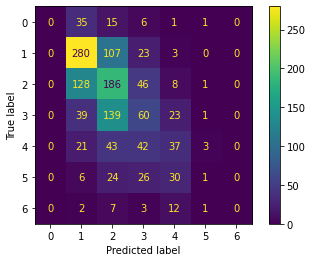

In [596]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

RANDOM FOREST - bez osetrenia outlierov a skalovania a tfidf gram

In [597]:
model = RandomForestClassifier(**grid_search_rf.best_params_)
# grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined2_rf, y_train)
# print("Najlepší hyperparametre:", grid_search_rf.best_params_)
# print("Najlepší skóre:", grid_search_rf.best_score_)

RandomForestClassifier(max_depth=30, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=50)

In [598]:
y_pred_train_rf = model.predict(X_train_combined2_rf)

In [599]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 0.9741488020176545
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.75      0.86       134
           1       0.95      1.00      0.97       896
           2       0.98      1.00      0.99       856
           3       0.98      1.00      0.99       608
           4       0.99      0.98      0.99       416
           5       0.99      0.91      0.95       216
           6       1.00      0.61      0.76        46

    accuracy                           0.97      3172
   macro avg       0.98      0.89      0.93      3172
weighted avg       0.97      0.97      0.97      3172



In [600]:
y_pred_rf = model.predict(X_test_combined2_rf)

In [601]:
results_list3_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
        'accuracy_test': accuracy_score(y_test, y_pred_rf)
    })

In [602]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.4308823529411765
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.56      0.70      0.62       413
           2       0.38      0.51      0.44       369
           3       0.31      0.28      0.29       262
           4       0.34      0.23      0.27       146
           5       0.17      0.02      0.04        87
           6       0.00      0.00      0.00        25

    accuracy                           0.43      1360
   macro avg       0.25      0.25      0.24      1360
weighted avg       0.38      0.43      0.40      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


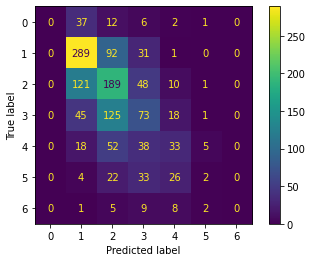

In [603]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

RANDOM FOREST - s osetrenim outlierov

In [604]:
model = RandomForestClassifier()
grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
grid_search_rf.fit(X_train_out_rf, y_train)
print("Najlepší hyperparametre:", grid_search_rf.best_params_)
print("Najlepší skóre:", grid_search_rf.best_score_)

Najlepší hyperparametre: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Najlepší skóre: 0.712808067761246


In [605]:
best_rf_model = grid_search_rf.best_estimator_
y_pred_train_rf = best_rf_model.predict(X_train_out_rf)

In [606]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       896
           2       1.00      1.00      1.00       856
           3       1.00      1.00      1.00       608
           4       1.00      1.00      1.00       416
           5       1.00      1.00      1.00       216
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [607]:
y_pred_rf = best_rf_model.predict(X_test_out_rf)

In [608]:
results_list3_rf.append({
        'best_score': grid_search_rf.best_score_,
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
        'accuracy_test': accuracy_score(y_test, y_pred_rf)
    })

In [609]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.7139705882352941
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.17      0.29        58
           1       0.75      0.86      0.80       413
           2       0.69      0.78      0.74       369
           3       0.70      0.69      0.69       262
           4       0.64      0.72      0.68       146
           5       0.88      0.34      0.50        87
           6       0.00      0.00      0.00        25

    accuracy                           0.71      1360
   macro avg       0.67      0.51      0.53      1360
weighted avg       0.72      0.71      0.69      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


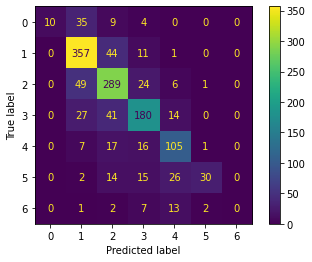

In [610]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

RANDOM FOREST - s osetrenim outlierov a ngram

In [611]:
model = RandomForestClassifier(**grid_search_rf.best_params_)
# grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined_out_rf, y_train)
# print("Najlepší hyperparametre:", grid_search_rf.best_params_)
# print("Najlepší skóre:", grid_search_rf.best_score_)

RandomForestClassifier()

In [612]:
y_pred_train_rf = model.predict(X_train_combined_out_rf)

In [613]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       896
           2       1.00      1.00      1.00       856
           3       1.00      1.00      1.00       608
           4       1.00      1.00      1.00       416
           5       1.00      1.00      1.00       216
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [614]:
y_pred_rf = model.predict(X_test_combined_out_rf)

In [615]:
results_list3_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
        'accuracy_test': accuracy_score(y_test, y_pred_rf)
    })

In [616]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.5889705882352941
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.69      0.83      0.76       413
           2       0.54      0.76      0.63       369
           3       0.53      0.45      0.49       262
           4       0.47      0.36      0.40       146
           5       0.62      0.06      0.11        87
           6       0.00      0.00      0.00        25

    accuracy                           0.59      1360
   macro avg       0.41      0.35      0.34      1360
weighted avg       0.55      0.59      0.55      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


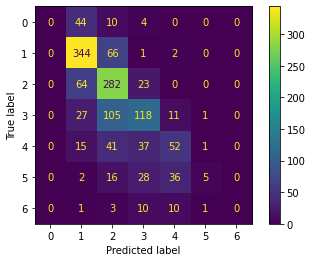

In [617]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

RANDOM FOREST - s osetrenim outlierov a tfidf ngram

In [618]:
model = RandomForestClassifier(**grid_search_rf.best_params_)
# grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined2_out_rf, y_train)
# print("Najlepší hyperparametre:", grid_search_rf.best_params_)
# print("Najlepší skóre:", grid_search_rf.best_score_)

RandomForestClassifier()

In [619]:
y_pred_train_rf = model.predict(X_train_combined2_out_rf)

In [620]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       896
           2       1.00      1.00      1.00       856
           3       1.00      1.00      1.00       608
           4       1.00      1.00      1.00       416
           5       1.00      1.00      1.00       216
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [621]:
y_pred_rf = model.predict(X_test_combined2_out_rf)

In [622]:
results_list3_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
        'accuracy_test': accuracy_score(y_test, y_pred_rf)
    })

In [623]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.5617647058823529
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.66      0.83      0.73       413
           2       0.50      0.71      0.59       369
           3       0.54      0.40      0.46       262
           4       0.44      0.35      0.39       146
           5       0.50      0.05      0.08        87
           6       0.00      0.00      0.00        25

    accuracy                           0.56      1360
   macro avg       0.38      0.33      0.32      1360
weighted avg       0.52      0.56      0.52      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


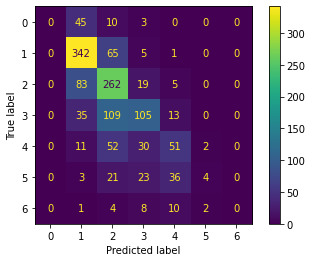

In [624]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

RANDOM FOREST - so skalovanim

In [625]:
model = RandomForestClassifier()
grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
grid_search_rf.fit(X_train_scaled_rf, y_train)
print("Najlepší hyperparametre:", grid_search_rf.best_params_)
print("Najlepší skóre:", grid_search_rf.best_score_)

Najlepší hyperparametre: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Najlepší skóre: 0.374210983879381


In [626]:
best_rf_model = grid_search_rf.best_estimator_
y_pred_train_rf = best_rf_model.predict(X_train_scaled_rf)

In [627]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 0.7563051702395964
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.05      0.10       134
           1       0.70      0.91      0.79       896
           2       0.70      0.86      0.77       856
           3       0.88      0.74      0.81       608
           4       0.87      0.69      0.77       416
           5       0.94      0.52      0.67       216
           6       1.00      0.04      0.08        46

    accuracy                           0.76      3172
   macro avg       0.87      0.54      0.57      3172
weighted avg       0.79      0.76      0.74      3172



In [628]:
y_pred_rf = best_rf_model.predict(X_test_scaled_rf)

In [629]:
results_list3_rf.append({
        'best_score': grid_search_rf.best_score_,
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
        'accuracy_test': accuracy_score(y_test, y_pred_rf)
    })

In [630]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.3860294117647059
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.49      0.63      0.55       413
           2       0.34      0.49      0.40       369
           3       0.29      0.19      0.23       262
           4       0.28      0.23      0.25       146
           5       0.18      0.02      0.04        87
           6       0.00      0.00      0.00        25

    accuracy                           0.39      1360
   macro avg       0.23      0.22      0.21      1360
weighted avg       0.34      0.39      0.35      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


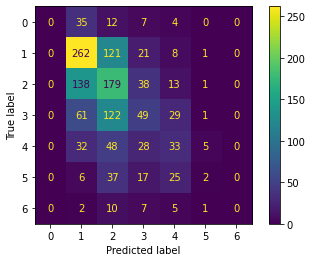

In [631]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

RANDOM FOREST - so skalovanim a ngram

In [632]:
model = RandomForestClassifier(**grid_search_rf.best_params_)
# grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined_scaled_rf, y_train)
# print("Najlepší hyperparametre:", grid_search_rf.best_params_)
# print("Najlepší skóre:", grid_search_rf.best_score_)

RandomForestClassifier(max_depth=10, min_samples_split=10)

In [633]:
y_pred_train_rf = model.predict(X_train_combined_scaled_rf)

In [634]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 0.8742118537200504
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.04      0.09       134
           1       0.81      1.00      0.89       896
           2       0.84      0.96      0.90       856
           3       0.95      0.93      0.94       608
           4       0.98      0.82      0.89       416
           5       1.00      0.68      0.81       216
           6       1.00      0.04      0.08        46

    accuracy                           0.87      3172
   macro avg       0.94      0.64      0.66      3172
weighted avg       0.89      0.87      0.85      3172



In [635]:
y_pred_rf = model.predict(X_test_combined_scaled_rf)

In [636]:
results_list3_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
        'accuracy_test': accuracy_score(y_test, y_pred_rf)
    })

In [637]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.40441176470588236
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.55      0.67      0.61       413
           2       0.35      0.56      0.43       369
           3       0.22      0.14      0.17       262
           4       0.31      0.18      0.23       146
           5       0.25      0.01      0.02        87
           6       0.00      0.00      0.00        25

    accuracy                           0.40      1360
   macro avg       0.24      0.22      0.21      1360
weighted avg       0.35      0.40      0.36      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


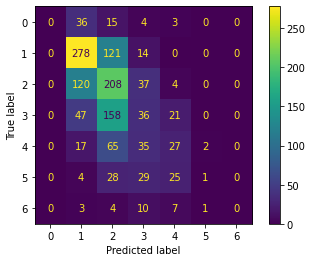

In [638]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

RANDOM FOREST - so skalovanim a tfidf ngram

In [639]:
model = RandomForestClassifier(**grid_search_rf.best_params_)
# grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined2_scaled_rf, y_train)
# print("Najlepší hyperparametre:", grid_search_rf.best_params_)
# print("Najlepší skóre:", grid_search_rf.best_score_)

RandomForestClassifier(max_depth=10, min_samples_split=10)

In [640]:
y_pred_train_rf = model.predict(X_train_combined2_scaled_rf)

In [641]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 0.9136191677175284
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.13      0.23       134
           1       0.88      1.00      0.94       896
           2       0.89      0.99      0.94       856
           3       0.94      0.98      0.96       608
           4       0.97      0.91      0.94       416
           5       0.99      0.74      0.85       216
           6       1.00      0.04      0.08        46

    accuracy                           0.91      3172
   macro avg       0.95      0.68      0.70      3172
weighted avg       0.92      0.91      0.89      3172



In [642]:
y_pred_rf = model.predict(X_test_combined2_scaled_rf)

In [643]:
results_list3_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
        'accuracy_test': accuracy_score(y_test, y_pred_rf)
    })

In [644]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.4176470588235294
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.56      0.71      0.63       413
           2       0.35      0.52      0.42       369
           3       0.27      0.17      0.21       262
           4       0.32      0.24      0.27       146
           5       0.00      0.00      0.00        87
           6       0.00      0.00      0.00        25

    accuracy                           0.42      1360
   macro avg       0.21      0.24      0.22      1360
weighted avg       0.35      0.42      0.37      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


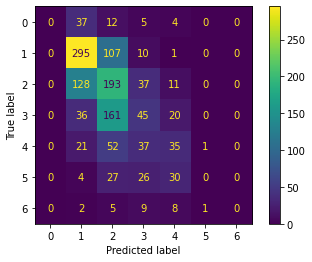

In [645]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

RANDOM FOREST - s osetrenymi outliermi a skalovanim

In [646]:
model = RandomForestClassifier()
grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
grid_search_rf.fit(X_train_scal_out_rf, y_train)
print("Najlepší hyperparametre:", grid_search_rf.best_params_)
print("Najlepší skóre:", grid_search_rf.best_score_)

Najlepší hyperparametre: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Najlepší skóre: 0.7118577212548747


In [647]:
best_rf_model = grid_search_rf.best_estimator_
y_pred_train_rf = best_rf_model.predict(X_train_scal_out_rf)

In [648]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 0.9977931904161412
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       0.99      1.00      1.00       896
           2       1.00      1.00      1.00       856
           3       1.00      0.99      1.00       608
           4       1.00      1.00      1.00       416
           5       1.00      1.00      1.00       216
           6       1.00      0.98      0.99        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [649]:
y_pred_rf = best_rf_model.predict(X_test_scal_out_rf)

In [650]:
results_list3_rf.append({
        'best_score': grid_search_rf.best_score_,
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
        'accuracy_test': accuracy_score(y_test, y_pred_rf)
    })

In [651]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.7176470588235294
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.14      0.24        58
           1       0.76      0.87      0.81       413
           2       0.70      0.80      0.75       369
           3       0.71      0.69      0.70       262
           4       0.61      0.66      0.63       146
           5       0.89      0.37      0.52        87
           6       0.00      0.00      0.00        25

    accuracy                           0.72      1360
   macro avg       0.67      0.51      0.52      1360
weighted avg       0.72      0.72      0.70      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


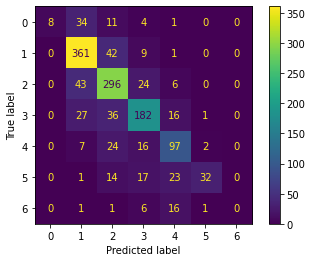

In [652]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

RANDOM FOREST - s osetrenymi outliermi a skalovanim a ngram

In [653]:
model = RandomForestClassifier(**grid_search_rf.best_params_)
# grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined_scal_out_rf, y_train)
# print("Najlepší hyperparametre:", grid_search_rf.best_params_)
# print("Najlepší skóre:", grid_search_rf.best_score_)

RandomForestClassifier(min_samples_split=5, n_estimators=200)

In [654]:
y_pred_train_rf = model.predict(X_train_combined_scal_out_rf)

In [655]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       896
           2       1.00      1.00      1.00       856
           3       1.00      1.00      1.00       608
           4       1.00      1.00      1.00       416
           5       1.00      1.00      1.00       216
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [656]:
y_pred_rf = model.predict(X_test_combined_scal_out_rf)

In [657]:
results_list3_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
        'accuracy_test': accuracy_score(y_test, y_pred_rf)
    })

In [658]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.5933823529411765
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.67      0.81      0.73       413
           2       0.53      0.76      0.62       369
           3       0.61      0.50      0.55       262
           4       0.52      0.40      0.45       146
           5       0.50      0.03      0.06        87
           6       0.00      0.00      0.00        25

    accuracy                           0.59      1360
   macro avg       0.40      0.36      0.35      1360
weighted avg       0.55      0.59      0.55      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


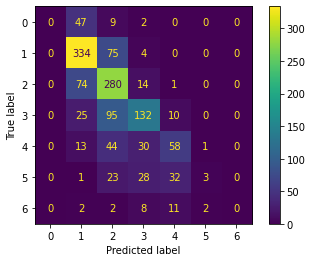

In [659]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

RANDOM FOREST - s osetrenymi outliermi a skalovanim a tfidf ngram

In [660]:
model = RandomForestClassifier(**grid_search_rf.best_params_)
# grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined2_scal_out_rf, y_train)
# print("Najlepší hyperparametre:", grid_search_rf.best_params_)
# print("Najlepší skóre:", grid_search_rf.best_score_)

RandomForestClassifier(min_samples_split=5, n_estimators=200)

In [661]:
y_pred_train_rf = model.predict(X_train_combined2_scal_out_rf)

In [662]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       896
           2       1.00      1.00      1.00       856
           3       1.00      1.00      1.00       608
           4       1.00      1.00      1.00       416
           5       1.00      1.00      1.00       216
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [663]:
y_pred_rf = model.predict(X_test_combined2_scal_out_rf)

In [664]:
results_list3_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
        'accuracy_test': accuracy_score(y_test, y_pred_rf)
    })

In [665]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.5654411764705882
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.66      0.82      0.73       413
           2       0.49      0.70      0.58       369
           3       0.59      0.44      0.51       262
           4       0.45      0.35      0.39       146
           5       0.67      0.02      0.04        87
           6       0.00      0.00      0.00        25

    accuracy                           0.57      1360
   macro avg       0.41      0.33      0.32      1360
weighted avg       0.54      0.57      0.52      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


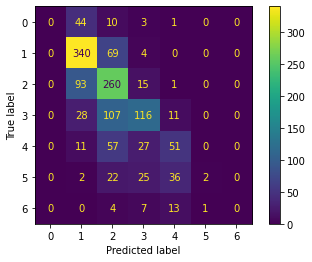

In [666]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

In [667]:
results_rf3 = pd.DataFrame(results_list3_rf)
print(results_rf3)

    best_score  accuracy_train  accuracy_test
0     0.373583        0.885561       0.365441
1          NaN        0.964061       0.414706
2          NaN        0.974149       0.430882
3     0.712808        1.000000       0.713971
4          NaN        1.000000       0.588971
5          NaN        1.000000       0.561765
6     0.374211        0.756305       0.386029
7          NaN        0.874212       0.404412
8          NaN        0.913619       0.417647
9     0.711858        0.997793       0.717647
10         NaN        1.000000       0.593382
11         NaN        1.000000       0.565441


Najvyššie skore sme dosiahli pomocou datasetu s ošetrenými outliermi a škálovaním. Oproti fruhému testovaniu sme dosiahli podobnú presnosť. Presnosť sa znížila väčšinou u tých variant, pre ktoré neboli anjdené hyperparametre cez gridsearch (s tectovými reprezentáciami)

GRADIENT BOOSTING MASHINE - bez osetrenia outlierov a skalovania

In [668]:
results_list3_gbm=[]

Určenie hyperparametrov, ktore budeme v grid search skúšať

In [669]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],  # Počet stromov v lese
    'max_depth': [None, 10, 20, 30, 40],  # Maximálna hĺbka stromu
    'min_samples_split': [2, 5, 10],  # Minimálny počet vzoriek potrebný na rozdelenie uzla
    'min_samples_leaf': [1, 2, 4]  # Minimálny počet vzoriek potrebný v listovom uzle
}

Grid search - vyskuša všetky kombinacie hyperparametrov a vyberie najlepší z nich podľa accuracy

In [670]:
model = GradientBoostingClassifier()
grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
grid_search_gbm.fit(X_train_gbm, y_train)
print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
print("Najlepší skóre:", grid_search_gbm.best_score_)

Najlepší hyperparametre: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Najlepší skóre: 0.3546710052410641


Predikovanie na trenovacich datach

In [671]:
best_gbm_model = grid_search_gbm.best_estimator_
y_pred_train_gbm = best_gbm_model.predict(X_train_gbm)

In [672]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       896
           2       1.00      1.00      1.00       856
           3       1.00      1.00      1.00       608
           4       1.00      1.00      1.00       416
           5       1.00      1.00      1.00       216
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



Predikovanie na testovacich datach

In [673]:
y_pred_gbm = best_gbm_model.predict(X_test_gbm)

In [674]:
results_list3_gbm.append({
        'best_score': grid_search_gbm.best_score_,
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
        'accuracy_test': accuracy_score(y_test, y_pred_gbm)
    })

In [675]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.37058823529411766
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.14      0.03      0.06        58
           1       0.48      0.56      0.52       413
           2       0.34      0.46      0.39       369
           3       0.29      0.26      0.27       262
           4       0.27      0.19      0.22       146
           5       0.27      0.05      0.08        87
           6       0.00      0.00      0.00        25

    accuracy                           0.37      1360
   macro avg       0.26      0.22      0.22      1360
weighted avg       0.34      0.37      0.35      1360



Vizualizácia výkonnosti modelu

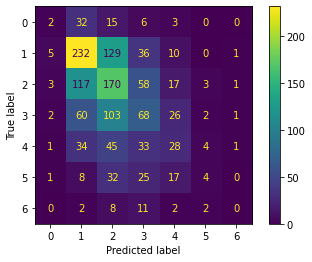

In [676]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

GRADIENT BOOSTING MASHINE - bez osetrenia outlierov a skalovania a ngram

In [677]:
model = GradientBoostingClassifier(**grid_search_gbm.best_params_)
# grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined_gbm, y_train)
# print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
# print("Najlepší skóre:", grid_search_gbm.best_score_)

GradientBoostingClassifier(max_depth=10)

In [678]:
y_pred_train_gbm = model.predict(X_train_combined_gbm)

In [679]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       896
           2       1.00      1.00      1.00       856
           3       1.00      1.00      1.00       608
           4       1.00      1.00      1.00       416
           5       1.00      1.00      1.00       216
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [680]:
y_pred_gbm = model.predict(X_test_combined_gbm)

In [681]:
results_list3_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
        'accuracy_test': accuracy_score(y_test, y_pred_gbm)
    })

In [682]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.42720588235294116
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.40      0.03      0.06        58
           1       0.60      0.65      0.62       413
           2       0.38      0.50      0.43       369
           3       0.35      0.29      0.32       262
           4       0.24      0.23      0.24       146
           5       0.33      0.18      0.24        87
           6       0.07      0.04      0.05        25

    accuracy                           0.43      1360
   macro avg       0.34      0.28      0.28      1360
weighted avg       0.42      0.43      0.41      1360



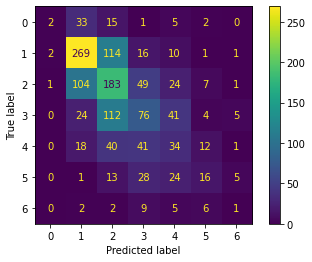

In [683]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

GRADIENT BOOSTING MASHINE - bez osetrenia outlierov a skalovania a tfidf ngram

In [684]:
model = GradientBoostingClassifier(**grid_search_gbm.best_params_)
# grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined2_gbm, y_train)
# print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
# print("Najlepší skóre:", grid_search_gbm.best_score_)

GradientBoostingClassifier(max_depth=10)

In [685]:
y_pred_train_gbm = model.predict(X_train_combined2_gbm)

In [686]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       896
           2       1.00      1.00      1.00       856
           3       1.00      1.00      1.00       608
           4       1.00      1.00      1.00       416
           5       1.00      1.00      1.00       216
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [687]:
y_pred_gbm = model.predict(X_test_combined2_gbm)

In [688]:
results_list3_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
        'accuracy_test': accuracy_score(y_test, y_pred_gbm)
    })

In [689]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.40147058823529413
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.15      0.03      0.06        58
           1       0.60      0.65      0.63       413
           2       0.36      0.43      0.40       369
           3       0.29      0.24      0.26       262
           4       0.24      0.30      0.27       146
           5       0.21      0.08      0.12        87
           6       0.00      0.00      0.00        25

    accuracy                           0.40      1360
   macro avg       0.27      0.25      0.25      1360
weighted avg       0.38      0.40      0.39      1360



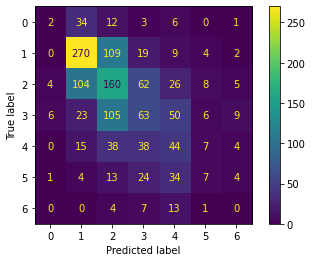

In [690]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

GRADIENT BOOSTING MASHINE - s osetrenim outlierov

In [691]:
model = GradientBoostingClassifier()
grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
grid_search_gbm.fit(X_train_out_gbm, y_train)
print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
print("Najlepší skóre:", grid_search_gbm.best_score_)

Najlepší hyperparametre: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Najlepší skóre: 0.8001296604485952


In [692]:
best_gbm_model = grid_search_gbm.best_estimator_
y_pred_train_gbm = best_gbm_model.predict(X_train_out_gbm)

In [693]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       896
           2       1.00      1.00      1.00       856
           3       1.00      1.00      1.00       608
           4       1.00      1.00      1.00       416
           5       1.00      1.00      1.00       216
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [694]:
y_pred_gbm = best_gbm_model.predict(X_test_out_gbm)

In [695]:
results_list3_gbm.append({
        'best_score': grid_search_gbm.best_score_,
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
        'accuracy_test': accuracy_score(y_test, y_pred_gbm)
    })

In [696]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.8066176470588236
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.48      0.65        58
           1       0.81      0.91      0.86       413
           2       0.79      0.84      0.81       369
           3       0.80      0.80      0.80       262
           4       0.78      0.79      0.79       146
           5       0.87      0.54      0.67        87
           6       0.83      0.40      0.54        25

    accuracy                           0.81      1360
   macro avg       0.84      0.68      0.73      1360
weighted avg       0.81      0.81      0.80      1360



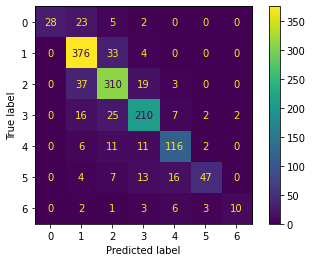

In [697]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

GRADIENT BOOSTING MASHINE - s osetrenim outlierov a ngram

In [698]:
model = GradientBoostingClassifier(**grid_search_gbm.best_params_)
# grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined_out_gbm, y_train)
# print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
# print("Najlepší skóre:", grid_search_gbm.best_score_)

GradientBoostingClassifier(max_depth=10, min_samples_leaf=2,
                           min_samples_split=10, n_estimators=200)

In [699]:
y_pred_train_gbm = model.predict(X_train_combined_out_gbm)

In [700]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       896
           2       1.00      1.00      1.00       856
           3       1.00      1.00      1.00       608
           4       1.00      1.00      1.00       416
           5       1.00      1.00      1.00       216
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [701]:
y_pred_gbm = model.predict(X_test_combined_out_gbm)

In [702]:
results_list3_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
        'accuracy_test': accuracy_score(y_test, y_pred_gbm)
    })

In [703]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.7801470588235294
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.92      0.40      0.55        58
           1       0.84      0.91      0.87       413
           2       0.75      0.86      0.80       369
           3       0.81      0.74      0.78       262
           4       0.65      0.76      0.70       146
           5       0.79      0.44      0.56        87
           6       0.43      0.12      0.19        25

    accuracy                           0.78      1360
   macro avg       0.74      0.60      0.64      1360
weighted avg       0.78      0.78      0.77      1360



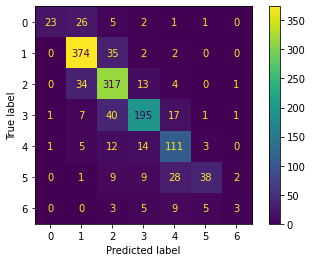

In [704]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

GRADIENT BOOSTING MASHINE - s osetrenim outlierov a tfidf ngram

In [705]:
model = GradientBoostingClassifier(**grid_search_gbm.best_params_)
# grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined2_out_gbm, y_train)
# print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
# print("Najlepší skóre:", grid_search_gbm.best_score_)

GradientBoostingClassifier(max_depth=10, min_samples_leaf=2,
                           min_samples_split=10, n_estimators=200)

In [706]:
y_pred_train_gbm = model.predict(X_train_combined2_out_gbm)

In [707]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       896
           2       1.00      1.00      1.00       856
           3       1.00      1.00      1.00       608
           4       1.00      1.00      1.00       416
           5       1.00      1.00      1.00       216
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [708]:
y_pred_gbm = model.predict(X_test_combined2_out_gbm)

In [709]:
results_list3_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
        'accuracy_test': accuracy_score(y_test, y_pred_gbm)
    })

In [710]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.7676470588235295
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.93      0.43      0.59        58
           1       0.82      0.87      0.85       413
           2       0.74      0.82      0.78       369
           3       0.85      0.75      0.80       262
           4       0.62      0.77      0.69       146
           5       0.71      0.48      0.58        87
           6       0.30      0.12      0.17        25

    accuracy                           0.77      1360
   macro avg       0.71      0.61      0.64      1360
weighted avg       0.77      0.77      0.76      1360



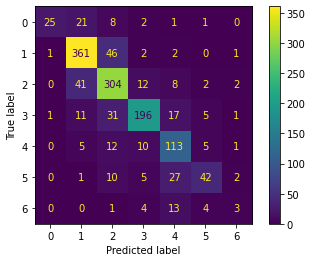

In [711]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

GRADIENT BOOSTING MASHINE - so skalovanim

In [712]:
model = GradientBoostingClassifier()
grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
grid_search_gbm.fit(X_train_scaled_gbm, y_train)
print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
print("Najlepší skóre:", grid_search_gbm.best_score_)

Najlepší hyperparametre: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
Najlepší skóre: 0.35970987853647635


In [713]:
best_gbm_model = grid_search_gbm.best_estimator_
y_pred_train_gbm = best_gbm_model.predict(X_train_scaled_gbm)

In [714]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       896
           2       1.00      1.00      1.00       856
           3       1.00      1.00      1.00       608
           4       1.00      1.00      1.00       416
           5       1.00      1.00      1.00       216
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [715]:
y_pred_gbm = best_gbm_model.predict(X_test_scaled_gbm)

In [716]:
results_list3_gbm.append({
        'best_score': grid_search_gbm.best_score_,
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
        'accuracy_test': accuracy_score(y_test, y_pred_gbm)
    })

In [717]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.3683823529411765
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.20      0.05      0.08        58
           1       0.49      0.57      0.53       413
           2       0.34      0.46      0.39       369
           3       0.27      0.22      0.24       262
           4       0.25      0.19      0.22       146
           5       0.14      0.06      0.08        87
           6       0.00      0.00      0.00        25

    accuracy                           0.37      1360
   macro avg       0.24      0.22      0.22      1360
weighted avg       0.34      0.37      0.35      1360



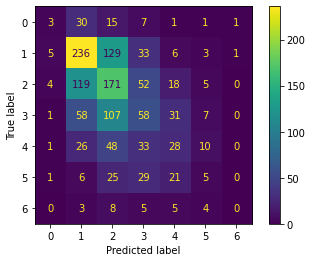

In [718]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

GRADIENT BOOSTING MASHINE - so skalovanim a ngram

In [719]:
model = GradientBoostingClassifier(**grid_search_gbm.best_params_)
# grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined_scaled_gbm, y_train)
# print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
# print("Najlepší skóre:", grid_search_gbm.best_score_)

GradientBoostingClassifier(max_depth=30, min_samples_leaf=4,
                           min_samples_split=5, n_estimators=200)

In [720]:
y_pred_train_gbm = model.predict(X_train_combined_scaled_gbm)

In [721]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       896
           2       1.00      1.00      1.00       856
           3       1.00      1.00      1.00       608
           4       1.00      1.00      1.00       416
           5       1.00      1.00      1.00       216
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [722]:
y_pred_gbm = model.predict(X_test_combined_scaled_gbm)

In [723]:
results_list3_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
        'accuracy_test': accuracy_score(y_test, y_pred_gbm)
    })

In [724]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.41691176470588237
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.44      0.07      0.12        58
           1       0.56      0.69      0.62       413
           2       0.36      0.47      0.41       369
           3       0.30      0.24      0.27       262
           4       0.28      0.22      0.24       146
           5       0.26      0.09      0.14        87
           6       0.00      0.00      0.00        25

    accuracy                           0.42      1360
   macro avg       0.31      0.26      0.26      1360
weighted avg       0.39      0.42      0.39      1360



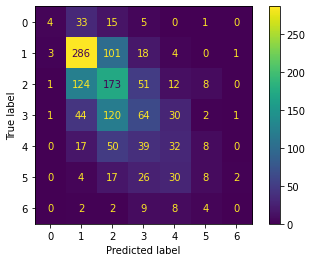

In [725]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

GRADIENT BOOSTING MASHINE - so skalovanim a tfidf ngram

In [726]:
model = GradientBoostingClassifier(**grid_search_gbm.best_params_)
# grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined2_scaled_gbm, y_train)
# print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
# print("Najlepší skóre:", grid_search_gbm.best_score_)

GradientBoostingClassifier(max_depth=30, min_samples_leaf=4,
                           min_samples_split=5, n_estimators=200)

In [727]:
y_pred_train_gbm = model.predict(X_train_combined2_scaled_gbm)

In [728]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       896
           2       1.00      1.00      1.00       856
           3       1.00      1.00      1.00       608
           4       1.00      1.00      1.00       416
           5       1.00      1.00      1.00       216
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [729]:
y_pred_gbm = model.predict(X_test_combined2_scaled_gbm)

In [730]:
results_list3_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
        'accuracy_test': accuracy_score(y_test, y_pred_gbm)
    })

In [731]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.4426470588235294
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.29      0.03      0.06        58
           1       0.59      0.73      0.66       413
           2       0.37      0.49      0.42       369
           3       0.36      0.27      0.31       262
           4       0.32      0.25      0.28       146
           5       0.29      0.11      0.17        87
           6       0.00      0.00      0.00        25

    accuracy                           0.44      1360
   macro avg       0.32      0.27      0.27      1360
weighted avg       0.41      0.44      0.42      1360



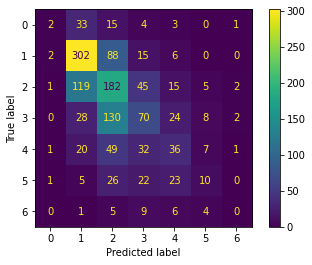

In [732]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

GRADIENT BOOSTING MASHINE - s osetrenim outlierov a skalovanim

In [733]:
model = GradientBoostingClassifier()
grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
grid_search_gbm.fit(X_train_scal_out_gbm, y_train)
print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
print("Najlepší skóre:", grid_search_gbm.best_score_)

Najlepší hyperparametre: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
Najlepší skóre: 0.7979204649891949


In [734]:
best_gbm_model = grid_search_gbm.best_estimator_
y_pred_train_gbm = best_gbm_model.predict(X_train_scal_out_gbm)

In [735]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       896
           2       1.00      1.00      1.00       856
           3       1.00      1.00      1.00       608
           4       1.00      1.00      1.00       416
           5       1.00      1.00      1.00       216
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [736]:
y_pred_gbm = best_gbm_model.predict(X_test_scal_out_gbm)

In [737]:
results_list3_gbm.append({
        'best_score': grid_search_gbm.best_score_,
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
        'accuracy_test': accuracy_score(y_test, y_pred_gbm)
    })

In [738]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.7970588235294118
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.93      0.45      0.60        58
           1       0.82      0.91      0.86       413
           2       0.81      0.83      0.82       369
           3       0.79      0.79      0.79       262
           4       0.70      0.80      0.75       146
           5       0.78      0.54      0.64        87
           6       0.80      0.16      0.27        25

    accuracy                           0.80      1360
   macro avg       0.80      0.64      0.68      1360
weighted avg       0.80      0.80      0.79      1360



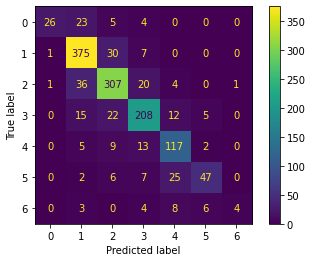

In [739]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

GRADIENT BOOSTING MASHINE - s osetrenim outlierov a skalovanim a ngram

In [740]:
model = GradientBoostingClassifier(**grid_search_gbm.best_params_)
# grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined_scal_out_gbm, y_train)
# print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
# print("Najlepší skóre:", grid_search_gbm.best_score_)

GradientBoostingClassifier(max_depth=20, min_samples_leaf=4,
                           min_samples_split=5, n_estimators=200)

In [741]:
y_pred_train_gbm = model.predict(X_train_combined_scal_out_gbm)

In [742]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       896
           2       1.00      1.00      1.00       856
           3       1.00      1.00      1.00       608
           4       1.00      1.00      1.00       416
           5       1.00      1.00      1.00       216
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [743]:
y_pred_gbm = model.predict(X_test_combined_scal_out_gbm)

In [744]:
results_list3_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
        'accuracy_test': accuracy_score(y_test, y_pred_gbm)
    })

In [745]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.7705882352941177
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.92      0.41      0.57        58
           1       0.79      0.90      0.84       413
           2       0.74      0.83      0.78       369
           3       0.82      0.73      0.77       262
           4       0.69      0.77      0.72       146
           5       0.81      0.48      0.60        87
           6       0.40      0.08      0.13        25

    accuracy                           0.77      1360
   macro avg       0.74      0.60      0.63      1360
weighted avg       0.77      0.77      0.76      1360



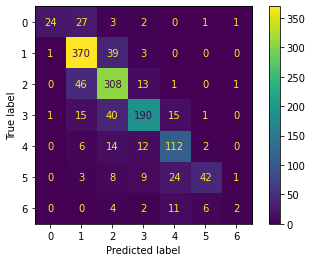

In [746]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

GRADIENT BOOSTING MASHINE - s osetrenim outlierov a skalovanim a tfidf ngram

In [747]:
model = GradientBoostingClassifier(**grid_search_gbm.best_params_)
# grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined2_scal_out_gbm, y_train)
# print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
# print("Najlepší skóre:", grid_search_gbm.best_score_)

GradientBoostingClassifier(max_depth=20, min_samples_leaf=4,
                           min_samples_split=5, n_estimators=200)

In [748]:
y_pred_train_gbm = model.predict(X_train_combined2_scal_out_gbm)

In [749]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       896
           2       1.00      1.00      1.00       856
           3       1.00      1.00      1.00       608
           4       1.00      1.00      1.00       416
           5       1.00      1.00      1.00       216
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [750]:
y_pred_gbm = model.predict(X_test_combined2_scal_out_gbm)

In [751]:
results_list3_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
        'accuracy_test': accuracy_score(y_test, y_pred_gbm)
    })

In [752]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.7654411764705882
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.86      0.43      0.57        58
           1       0.79      0.90      0.84       413
           2       0.74      0.82      0.78       369
           3       0.80      0.74      0.77       262
           4       0.66      0.72      0.69       146
           5       0.77      0.46      0.58        87
           6       0.71      0.20      0.31        25

    accuracy                           0.77      1360
   macro avg       0.76      0.61      0.65      1360
weighted avg       0.77      0.77      0.76      1360



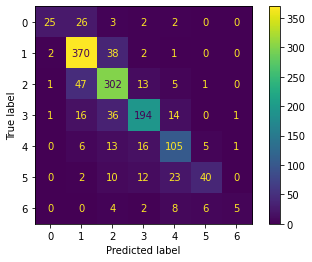

In [753]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

In [754]:
results_gbm3 = pd.DataFrame(results_list3_gbm)
print(results_gbm3)

    best_score  accuracy_train  accuracy_test
0     0.354671             1.0       0.370588
1          NaN             1.0       0.427206
2          NaN             1.0       0.401471
3     0.800130             1.0       0.806618
4          NaN             1.0       0.780147
5          NaN             1.0       0.767647
6     0.359710             1.0       0.368382
7          NaN             1.0       0.416912
8          NaN             1.0       0.442647
9     0.797920             1.0       0.797059
10         NaN             1.0       0.770588
11         NaN             1.0       0.765441


Najvyššie skore sme dosiahli pomocou datasetu s ošetrenými outliermi. Oproti fruhému testovaniu sme dosiahli podobnú presnosť. Presnosť sa znížila väčšinou u tých variant, pre ktoré konkrétne neboli najdené hyperparametre cez gridsearch (s tectovými reprezentáciami). Model sa trochu aj pretrénoval

Pridanie typu datasetu k tabuľkám (zmena indexov)

In [755]:
row_names = ['bez osetrenia outlierov a skalovania', 'bez osetrenia outlierov a skalovania s ngramami', 'bez osetrenia outlierov a skalovania s tfidf ngramami', 's osetrenim outlierov', 's osetrenim outlierov a s ngramami', 's osetrenim outlierov a s tfidf ngramami', 'so skalovanim','so skalovanim a s ngramami','so skalovanim a s tfidf ngramami','s osetrenim outlierov a skalovanim','s osetrenim outlierov a skalovanim a s ngramami','s osetrenim outlierov a skalovanim a s tfidf ngramami']  # Zoznam by mal obsahovať meno pre každý riadok

# Priradenie zoznamu mien do indexu DataFrame
results_svc1.index = row_names
results_svc2.index = row_names
results_svc3.index = row_names

results_rf1.index = row_names
results_rf2.index = row_names
results_rf3.index = row_names

results_gbm1.index = row_names
results_gbm2.index = row_names
results_gbm3.index = row_names

OHODNOTENIE

Podľa výsledkov nižšie môžeme vidieť, že najlepšie výsledky nám poskytol model Gradient Boosting Mashine a to s verziami datasetu, kde boli ošetrený outlieri a nebol dataset spojený so žiadnymi textovými reprezentáciami (ngram, tfidf ngram). Podľa tabuliek vidíme, že ošetrenie outlierov malo naväčší vplyv na accuracy. Naopak najhoršie výsledky mal čistý dataset bez ošetrenia outlierov a škálovania a bez pridania textových reprezentácií vo všetkých modeloch. Najhorší model na určovanie vekovej skupiny v mojej práci bol SVC, tým sa mi najmenšie accuracy podarilo dosiahnúť.

In [756]:
results_svc1

accuracy_train  \
bez osetrenia outlierov a skalovania                      0.331021   
bez osetrenia outlierov a skalovania s ngramami           0.448928   
bez osetrenia outlierov a skalovania s tfidf ng...        0.327869   
s osetrenim outlierov                                     0.387137   
s osetrenim outlierov a s ngramami                        0.460277   
s osetrenim outlierov a s tfidf ngramami                  0.387768   
so skalovanim                                             0.368222   
so skalovanim a s ngramami                                0.447037   
so skalovanim a s tfidf ngramami                          0.445145   
s osetrenim outlierov a skalovanim                        0.387137   
s osetrenim outlierov a skalovanim a s ngramami           0.460277   
s osetrenim outlierov a skalovanim a s tfidf ng...        0.387768   

                                                    accuracy_test  
bez osetrenia outlierov a skalovania                     0.336765  
bez osetrenia outlierov a skalovania s ngramami          0.411029  
bez osetrenia outlierov a skalovania s tfidf ng...       0.333088  
s osetrenim outlierov                                    0.376471  
s osetrenim outlierov a s ngramami                       0.423529  
s osetrenim outlierov a s tfidf ngramami                 0.377206  
so skalovanim                                            0.358088  
so skalovanim a s ngramami                               0.422059  
so skalovanim a s tfidf ngramami                         0.413971  
s osetrenim outlierov a skalovanim                       0.376471  
s osetrenim outlierov a skalovanim a s ngramami          0.423529  
s osetrenim outlierov a skalovanim a s tfidf ng...       0.377206

In [757]:
results_svc2

accuracy_train  \
bez osetrenia outlierov a skalovania                      0.361917   
bez osetrenia outlierov a skalovania s ngramami           0.447352   
bez osetrenia outlierov a skalovania s tfidf ng...        0.387453   
s osetrenim outlierov                                     0.482661   
s osetrenim outlierov a s ngramami                        0.447037   
s osetrenim outlierov a s tfidf ngramami                  0.497163   
so skalovanim                                             0.375788   
so skalovanim a s ngramami                                0.447037   
so skalovanim a s tfidf ngramami                          0.446091   
s osetrenim outlierov a skalovanim                        0.482661   
s osetrenim outlierov a skalovanim a s ngramami           0.447037   
s osetrenim outlierov a skalovanim a s tfidf ng...        0.497163   

                                                    accuracy_test  
bez osetrenia outlierov a skalovania                     0.369853  
bez osetrenia outlierov a skalovania s ngramami          0.422059  
bez osetrenia outlierov a skalovania s tfidf ng...       0.375735  
s osetrenim outlierov                                    0.474265  
s osetrenim outlierov a s ngramami                       0.422059  
s osetrenim outlierov a s tfidf ngramami                 0.480147  
so skalovanim                                            0.362500  
so skalovanim a s ngramami                               0.422059  
so skalovanim a s tfidf ngramami                         0.414706  
s osetrenim outlierov a skalovanim                       0.474265  
s osetrenim outlierov a skalovanim a s ngramami          0.422059  
s osetrenim outlierov a skalovanim a s tfidf ng...       0.480147

In [758]:
results_svc3

best_score  \
bez osetrenia outlierov a skalovania                  0.361286   
bez osetrenia outlierov a skalovania s ngramami            NaN   
bez osetrenia outlierov a skalovania s tfidf ng...         NaN   
s osetrenim outlierov                                 0.483301   
s osetrenim outlierov a s ngramami                         NaN   
s osetrenim outlierov a s tfidf ngramami                   NaN   
so skalovanim                                         0.372320   
so skalovanim a s ngramami                                 NaN   
so skalovanim a s tfidf ngramami                           NaN   
s osetrenim outlierov a skalovanim                    0.483301   
s osetrenim outlierov a skalovanim a s ngramami            NaN   
s osetrenim outlierov a skalovanim a s tfidf ng...         NaN   

                                                    accuracy_train  \
bez osetrenia outlierov a skalovania                      0.424023   
bez osetrenia outlierov a skalovania s ngramami           1.000000   
bez osetrenia outlierov a skalovania s tfidf ng...        0.420555   
s osetrenim outlierov                                     0.597415   
s osetrenim outlierov a s ngramami                        0.941992   
s osetrenim outlierov a s tfidf ngramami                  0.813367   
so skalovanim                                             0.430643   
so skalovanim a s ngramami                                0.813367   
so skalovanim a s tfidf ngramami                          0.866015   
s osetrenim outlierov a skalovanim                        0.597415   
s osetrenim outlierov a skalovanim a s ngramami           0.941992   
s osetrenim outlierov a skalovanim a s tfidf ng...        0.813367   

                                                    accuracy_test  
bez osetrenia outlierov a skalovania                     0.374265  
bez osetrenia outlierov a skalovania s ngramami          0.401471  
bez osetrenia outlierov a skalovania s tfidf ng...       0.415441  
s osetrenim outlierov                                    0.488971  
s osetrenim outlierov a s ngramami                       0.411765  
s osetrenim outlierov a s tfidf ngramami                 0.516176  
so skalovanim                                            0.366176  
so skalovanim a s ngramami                               0.426471  
so skalovanim a s tfidf ngramami                         0.441912  
s osetrenim outlierov a skalovanim                       0.488971  
s osetrenim outlierov a skalovanim a s ngramami          0.411765  
s osetrenim outlierov a skalovanim a s tfidf ng...       0.516176

In [759]:
results_rf1

accuracy_train  \
bez osetrenia outlierov a skalovania                           1.0   
bez osetrenia outlierov a skalovania s ngramami                1.0   
bez osetrenia outlierov a skalovania s tfidf ng...             1.0   
s osetrenim outlierov                                          1.0   
s osetrenim outlierov a s ngramami                             1.0   
s osetrenim outlierov a s tfidf ngramami                       1.0   
so skalovanim                                                  1.0   
so skalovanim a s ngramami                                     1.0   
so skalovanim a s tfidf ngramami                               1.0   
s osetrenim outlierov a skalovanim                             1.0   
s osetrenim outlierov a skalovanim a s ngramami                1.0   
s osetrenim outlierov a skalovanim a s tfidf ng...             1.0   

                                                    accuracy_test  
bez osetrenia outlierov a skalovania                     0.361029  
bez osetrenia outlierov a skalovania s ngramami          0.415441  
bez osetrenia outlierov a skalovania s tfidf ng...       0.423529  
s osetrenim outlierov                                    0.732353  
s osetrenim outlierov a s ngramami                       0.619118  
s osetrenim outlierov a s tfidf ngramami                 0.586029  
so skalovanim                                            0.364706  
so skalovanim a s ngramami                               0.407353  
so skalovanim a s tfidf ngramami                         0.435294  
s osetrenim outlierov a skalovanim                       0.707353  
s osetrenim outlierov a skalovanim a s ngramami          0.604412  
s osetrenim outlierov a skalovanim a s tfidf ng...       0.589706

In [760]:
results_rf2

accuracy_train  \
bez osetrenia outlierov a skalovania                           1.0   
bez osetrenia outlierov a skalovania s ngramami                1.0   
bez osetrenia outlierov a skalovania s tfidf ng...             1.0   
s osetrenim outlierov                                          1.0   
s osetrenim outlierov a s ngramami                             1.0   
s osetrenim outlierov a s tfidf ngramami                       1.0   
so skalovanim                                                  1.0   
so skalovanim a s ngramami                                     1.0   
so skalovanim a s tfidf ngramami                               1.0   
s osetrenim outlierov a skalovanim                             1.0   
s osetrenim outlierov a skalovanim a s ngramami                1.0   
s osetrenim outlierov a skalovanim a s tfidf ng...             1.0   

                                                    accuracy_test  
bez osetrenia outlierov a skalovania                     0.376471  
bez osetrenia outlierov a skalovania s ngramami          0.411765  
bez osetrenia outlierov a skalovania s tfidf ng...       0.408088  
s osetrenim outlierov                                    0.720588  
s osetrenim outlierov a s ngramami                       0.572059  
s osetrenim outlierov a s tfidf ngramami                 0.547059  
so skalovanim                                            0.364706  
so skalovanim a s ngramami                               0.413971  
so skalovanim a s tfidf ngramami                         0.407353  
s osetrenim outlierov a skalovanim                       0.711765  
s osetrenim outlierov a skalovanim a s ngramami          0.563971  
s osetrenim outlierov a skalovanim a s tfidf ng...       0.553676

In [761]:
results_rf3

best_score  \
bez osetrenia outlierov a skalovania                  0.373583   
bez osetrenia outlierov a skalovania s ngramami            NaN   
bez osetrenia outlierov a skalovania s tfidf ng...         NaN   
s osetrenim outlierov                                 0.712808   
s osetrenim outlierov a s ngramami                         NaN   
s osetrenim outlierov a s tfidf ngramami                   NaN   
so skalovanim                                         0.374211   
so skalovanim a s ngramami                                 NaN   
so skalovanim a s tfidf ngramami                           NaN   
s osetrenim outlierov a skalovanim                    0.711858   
s osetrenim outlierov a skalovanim a s ngramami            NaN   
s osetrenim outlierov a skalovanim a s tfidf ng...         NaN   

                                                    accuracy_train  \
bez osetrenia outlierov a skalovania                      0.885561   
bez osetrenia outlierov a skalovania s ngramami           0.964061   
bez osetrenia outlierov a skalovania s tfidf ng...        0.974149   
s osetrenim outlierov                                     1.000000   
s osetrenim outlierov a s ngramami                        1.000000   
s osetrenim outlierov a s tfidf ngramami                  1.000000   
so skalovanim                                             0.756305   
so skalovanim a s ngramami                                0.874212   
so skalovanim a s tfidf ngramami                          0.913619   
s osetrenim outlierov a skalovanim                        0.997793   
s osetrenim outlierov a skalovanim a s ngramami           1.000000   
s osetrenim outlierov a skalovanim a s tfidf ng...        1.000000   

                                                    accuracy_test  
bez osetrenia outlierov a skalovania                     0.365441  
bez osetrenia outlierov a skalovania s ngramami          0.414706  
bez osetrenia outlierov a skalovania s tfidf ng...       0.430882  
s osetrenim outlierov                                    0.713971  
s osetrenim outlierov a s ngramami                       0.588971  
s osetrenim outlierov a s tfidf ngramami                 0.561765  
so skalovanim                                            0.386029  
so skalovanim a s ngramami                               0.404412  
so skalovanim a s tfidf ngramami                         0.417647  
s osetrenim outlierov a skalovanim                       0.717647  
s osetrenim outlierov a skalovanim a s ngramami          0.593382  
s osetrenim outlierov a skalovanim a s tfidf ng...       0.565441

In [762]:
results_gbm1

accuracy_train  \
bez osetrenia outlierov a skalovania                      0.734552   
bez osetrenia outlierov a skalovania s ngramami           0.886507   
bez osetrenia outlierov a skalovania s tfidf ng...        0.922446   
s osetrenim outlierov                                     0.965952   
s osetrenim outlierov a s ngramami                        0.983922   
s osetrenim outlierov a s tfidf ngramami                  0.992749   
so skalovanim                                             0.732346   
so skalovanim a s ngramami                                0.886507   
so skalovanim a s tfidf ngramami                          0.922446   
s osetrenim outlierov a skalovanim                        0.965952   
s osetrenim outlierov a skalovanim a s ngramami           0.983922   
s osetrenim outlierov a skalovanim a s tfidf ng...        0.992749   

                                                    accuracy_test  
bez osetrenia outlierov a skalovania                     0.378676  
bez osetrenia outlierov a skalovania s ngramami          0.430882  
bez osetrenia outlierov a skalovania s tfidf ng...       0.433824  
s osetrenim outlierov                                    0.847059  
s osetrenim outlierov a s ngramami                       0.826471  
s osetrenim outlierov a s tfidf ngramami                 0.808824  
so skalovanim                                            0.380882  
so skalovanim a s ngramami                               0.433088  
so skalovanim a s tfidf ngramami                         0.434559  
s osetrenim outlierov a skalovanim                       0.847059  
s osetrenim outlierov a skalovanim a s ngramami          0.826471  
s osetrenim outlierov a skalovanim a s tfidf ng...       0.811029

In [763]:
results_gbm2

accuracy_train  \
bez osetrenia outlierov a skalovania                      0.681904   
bez osetrenia outlierov a skalovania s ngramami           0.883039   
bez osetrenia outlierov a skalovania s tfidf ng...        0.920240   
s osetrenim outlierov                                     0.947037   
s osetrenim outlierov a s ngramami                        0.980769   
s osetrenim outlierov a s tfidf ngramami                  0.989596   
so skalovanim                                             0.670240   
so skalovanim a s ngramami                                0.878625   
so skalovanim a s tfidf ngramami                          0.915195   
s osetrenim outlierov a skalovanim                        0.947037   
s osetrenim outlierov a skalovanim a s ngramami           0.980769   
s osetrenim outlierov a skalovanim a s tfidf ng...        0.989596   

                                                    accuracy_test  
bez osetrenia outlierov a skalovania                     0.370588  
bez osetrenia outlierov a skalovania s ngramami          0.425735  
bez osetrenia outlierov a skalovania s tfidf ng...       0.423529  
s osetrenim outlierov                                    0.825000  
s osetrenim outlierov a s ngramami                       0.793382  
s osetrenim outlierov a s tfidf ngramami                 0.784559  
so skalovanim                                            0.383824  
so skalovanim a s ngramami                               0.428676  
so skalovanim a s tfidf ngramami                         0.433088  
s osetrenim outlierov a skalovanim                       0.826471  
s osetrenim outlierov a skalovanim a s ngramami          0.797059  
s osetrenim outlierov a skalovanim a s tfidf ng...       0.788235

In [764]:
results_gbm3

best_score  \
bez osetrenia outlierov a skalovania                  0.354671   
bez osetrenia outlierov a skalovania s ngramami            NaN   
bez osetrenia outlierov a skalovania s tfidf ng...         NaN   
s osetrenim outlierov                                 0.800130   
s osetrenim outlierov a s ngramami                         NaN   
s osetrenim outlierov a s tfidf ngramami                   NaN   
so skalovanim                                         0.359710   
so skalovanim a s ngramami                                 NaN   
so skalovanim a s tfidf ngramami                           NaN   
s osetrenim outlierov a skalovanim                    0.797920   
s osetrenim outlierov a skalovanim a s ngramami            NaN   
s osetrenim outlierov a skalovanim a s tfidf ng...         NaN   

                                                    accuracy_train  \
bez osetrenia outlierov a skalovania                           1.0   
bez osetrenia outlierov a skalovania s ngramami                1.0   
bez osetrenia outlierov a skalovania s tfidf ng...             1.0   
s osetrenim outlierov                                          1.0   
s osetrenim outlierov a s ngramami                             1.0   
s osetrenim outlierov a s tfidf ngramami                       1.0   
so skalovanim                                                  1.0   
so skalovanim a s ngramami                                     1.0   
so skalovanim a s tfidf ngramami                               1.0   
s osetrenim outlierov a skalovanim                             1.0   
s osetrenim outlierov a skalovanim a s ngramami                1.0   
s osetrenim outlierov a skalovanim a s tfidf ng...             1.0   

                                                    accuracy_test  
bez osetrenia outlierov a skalovania                     0.370588  
bez osetrenia outlierov a skalovania s ngramami          0.427206  
bez osetrenia outlierov a skalovania s tfidf ng...       0.401471  
s osetrenim outlierov                                    0.806618  
s osetrenim outlierov a s ngramami                       0.780147  
s osetrenim outlierov a s tfidf ngramami                 0.767647  
so skalovanim                                            0.368382  
so skalovanim a s ngramami                               0.416912  
so skalovanim a s tfidf ngramami                         0.442647  
s osetrenim outlierov a skalovanim                       0.797059  
s osetrenim outlierov a skalovanim a s ngramami          0.770588  
s osetrenim outlierov a skalovanim a s tfidf ng...       0.765441

Grafická vizualizácia

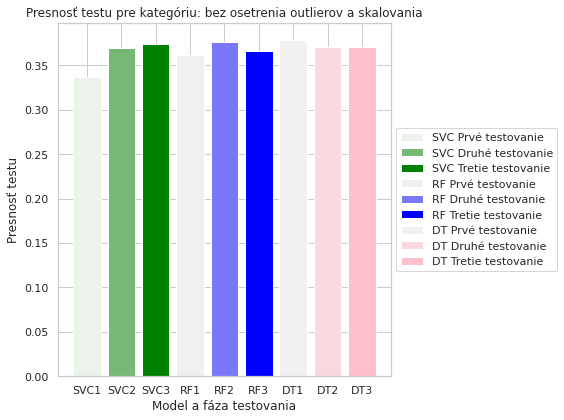

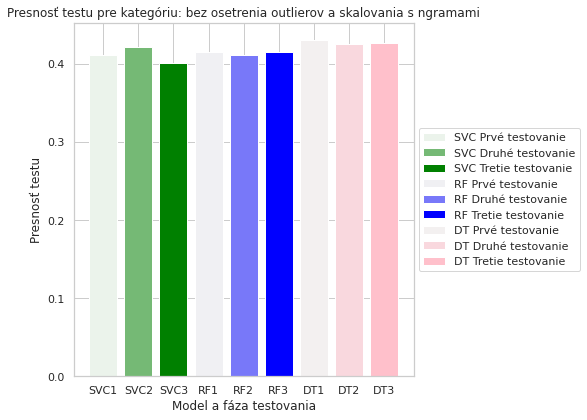

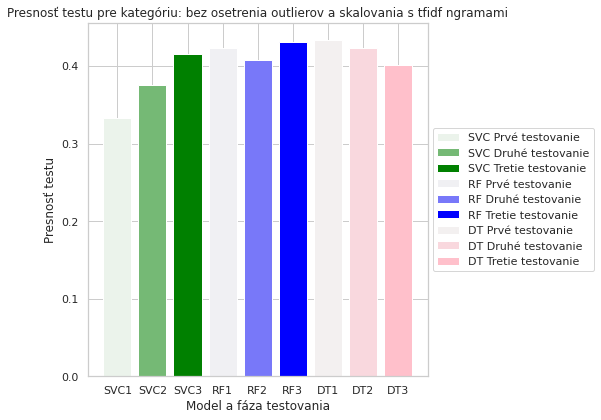

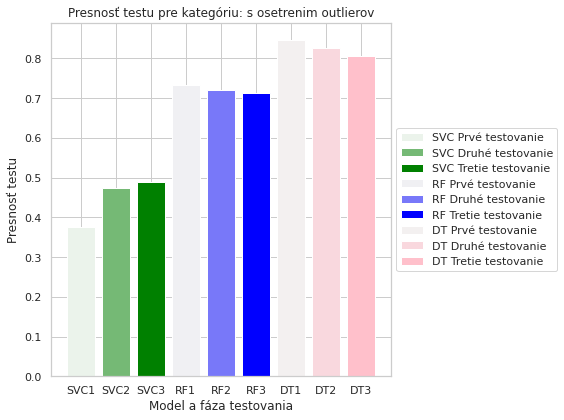

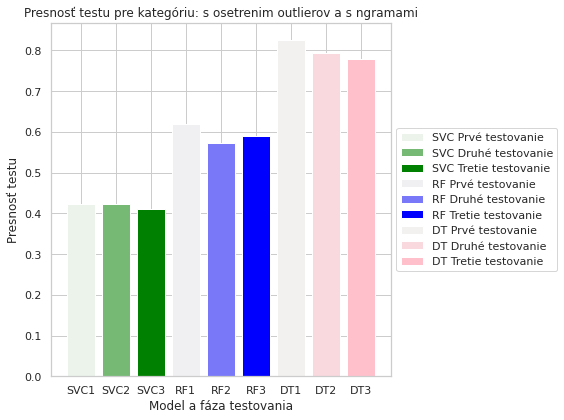

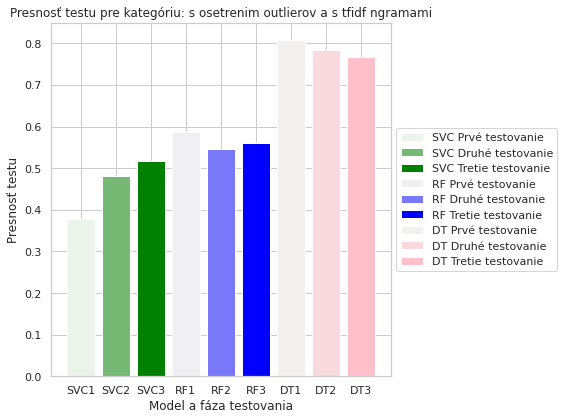

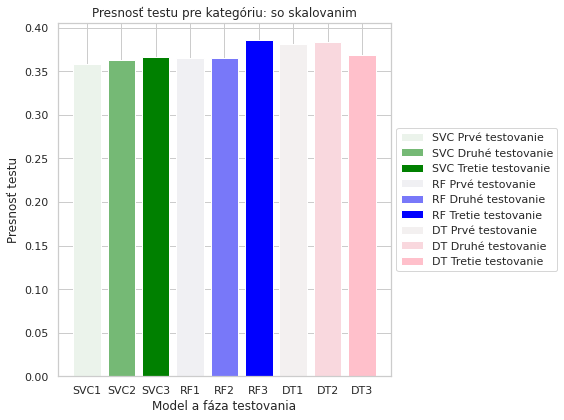

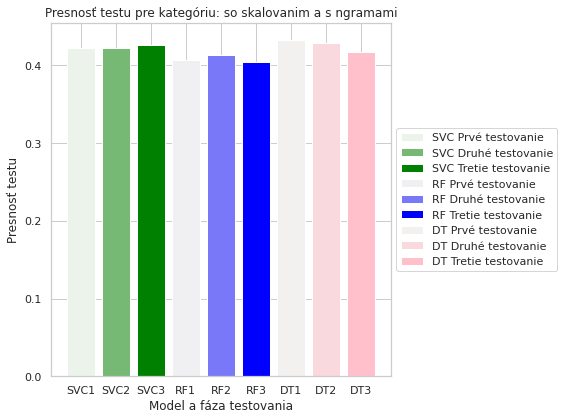

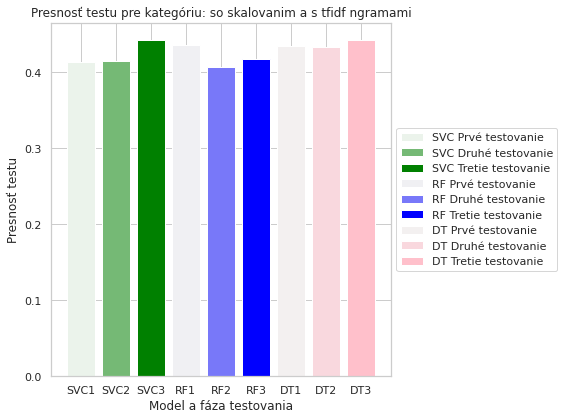

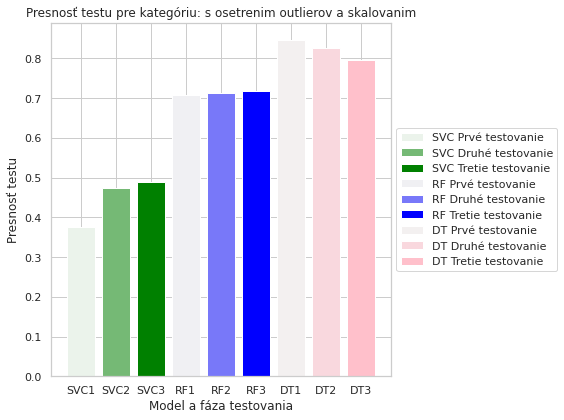

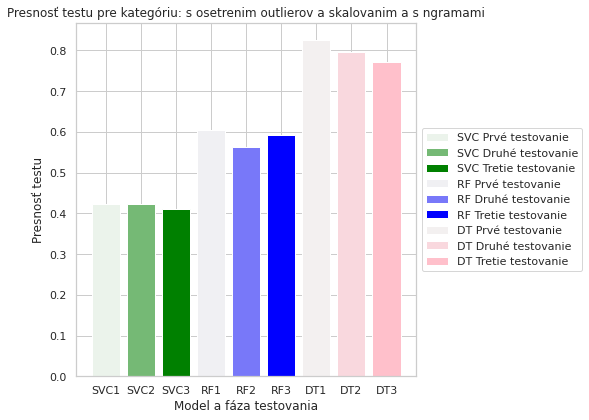

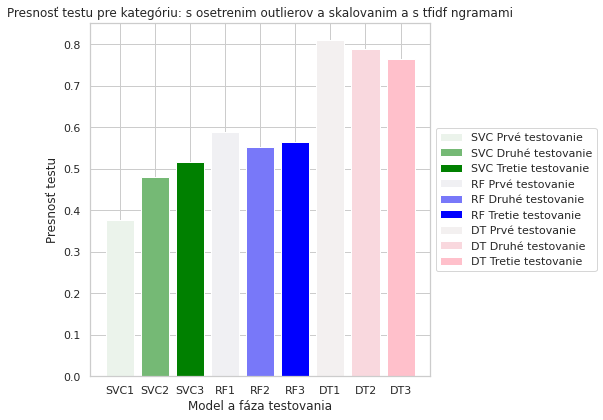

In [765]:
# Nastavenie štýlu Seaborn pre pekné grafy
sns.set(style="whitegrid")

test_categories = results_svc1.index.tolist()

# Pre každú kategóriu vytvoríme graf
for category in test_categories:
    fig, ax = plt.subplots(figsize=(10, 6))

    # Farebné schémy pre testy
    colors_svc = sns.light_palette("green", 3)
    colors_rf = sns.light_palette("blue", 3)
    colors_gbm = sns.light_palette("pink", 3)

    # Pridanie dát pre SVC
    ax.bar('SVC1', results_svc1.loc[category, 'accuracy_test'], label='SVC Prvé testovanie', color=colors_svc[0])
    ax.bar('SVC2', results_svc2.loc[category, 'accuracy_test'], label='SVC Druhé testovanie', color=colors_svc[1])
    ax.bar('SVC3', results_svc3.loc[category, 'accuracy_test'], label='SVC Tretie testovanie', color=colors_svc[2])

    # Pridanie dát pre Random Forest
    ax.bar('RF1', results_rf1.loc[category, 'accuracy_test'], label='RF Prvé testovanie', color=colors_rf[0])
    ax.bar('RF2', results_rf2.loc[category, 'accuracy_test'], label='RF Druhé testovanie', color=colors_rf[1])
    ax.bar('RF3', results_rf3.loc[category, 'accuracy_test'], label='RF Tretie testovanie', color=colors_rf[2])

    # Pridanie dát pre GRADIENT BOOSTING MASHINE
    ax.bar('DT1', results_gbm1.loc[category, 'accuracy_test'], label='DT Prvé testovanie', color=colors_gbm[0])
    ax.bar('DT2', results_gbm2.loc[category, 'accuracy_test'], label='DT Druhé testovanie', color=colors_gbm[1])
    ax.bar('DT3', results_gbm3.loc[category, 'accuracy_test'], label='DT Tretie testovanie', color=colors_gbm[2])

    # Nastavenie legendy mimo grafu na pravej strane
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # Titulok grafu
    ax.set_title(f'Presnosť testu pre kategóriu: {category}')

    # Popisy osí
    ax.set_xlabel('Model a fáza testovania')
    ax.set_ylabel('Presnosť testu')

    # Zobrazenie grafu
    plt.tight_layout(rect=[0, 0, 0.8, 1])  # Uvoľnenie priestoru pre legendu
    plt.show()

<Figure size 864x504 with 0 Axes>

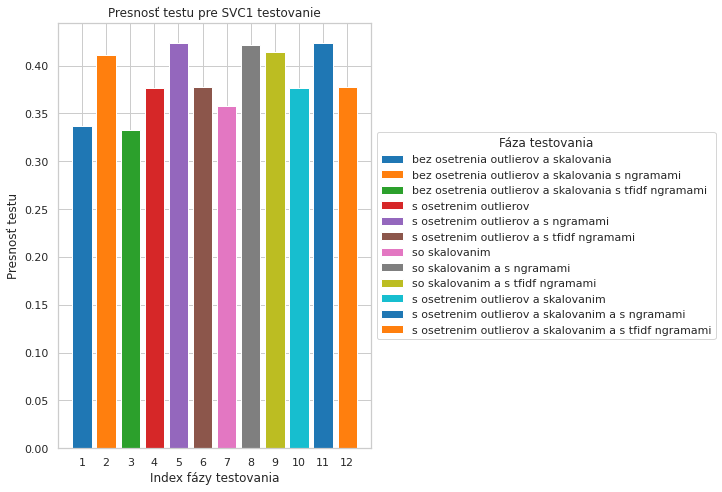

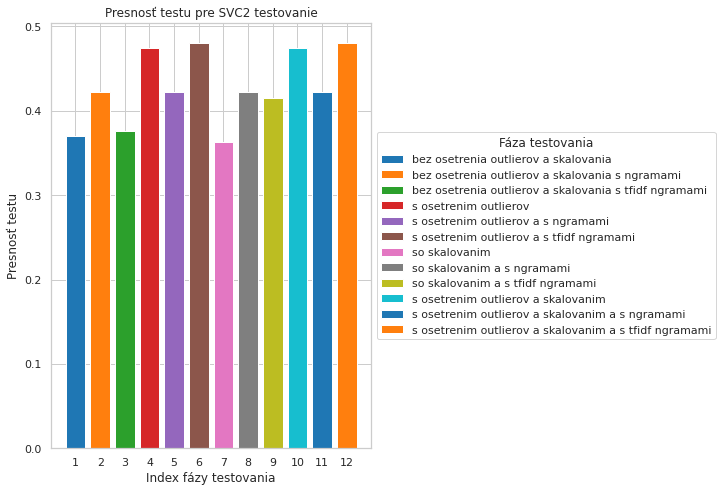

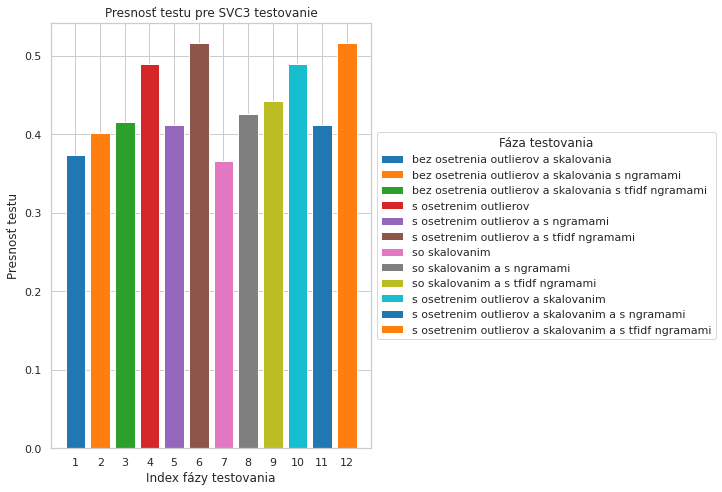

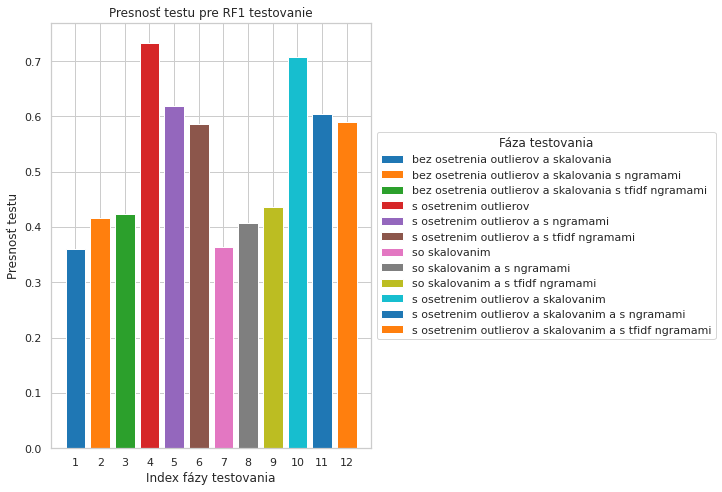

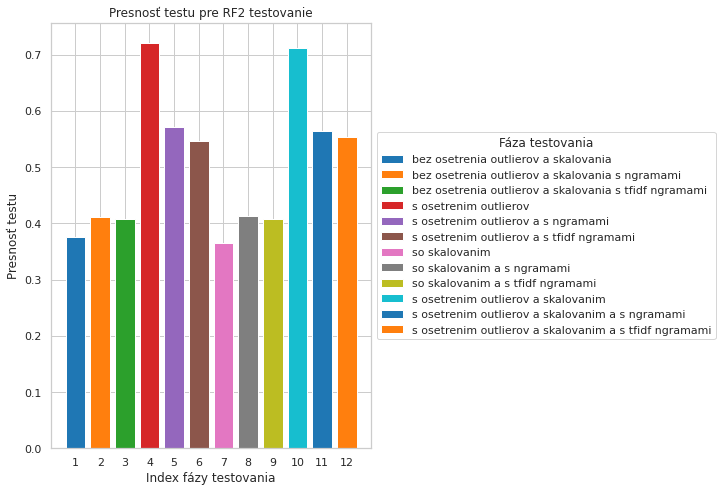

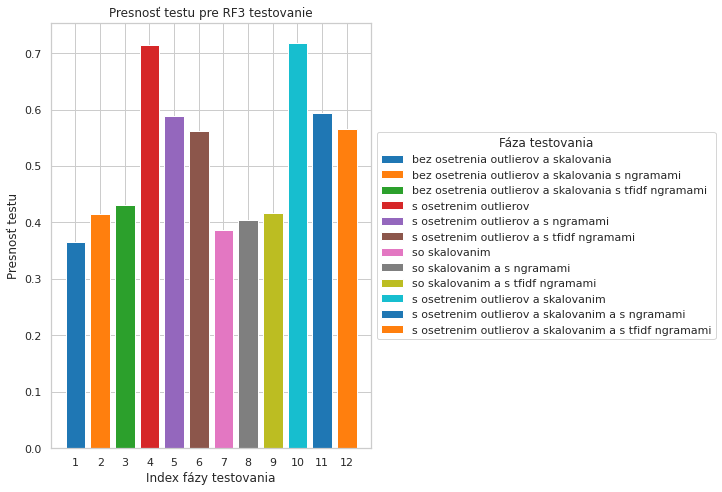

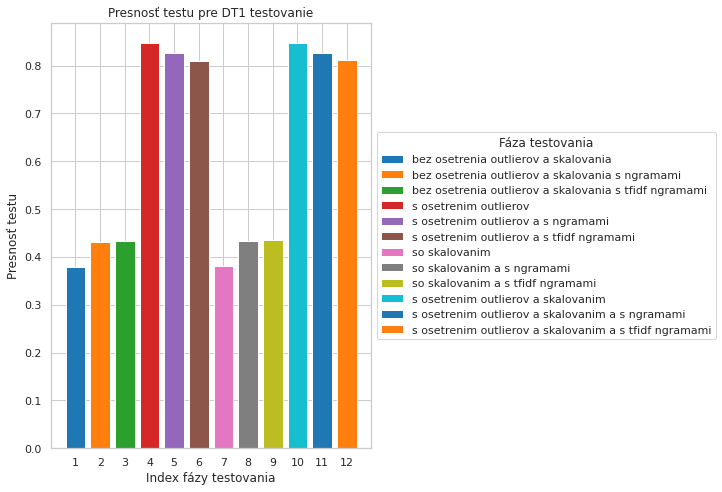

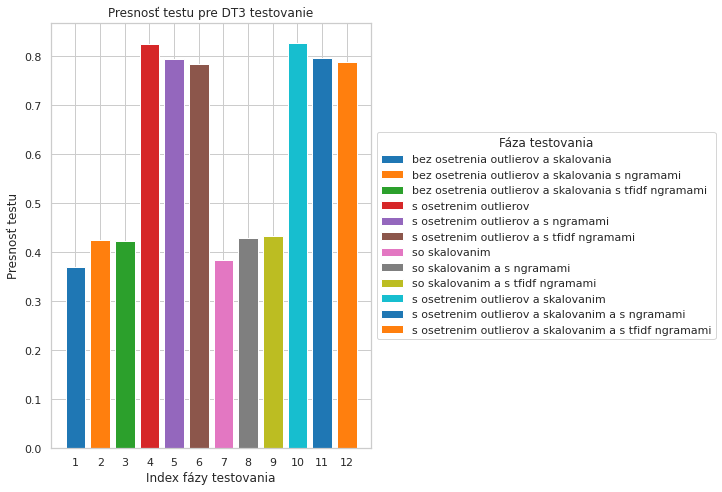

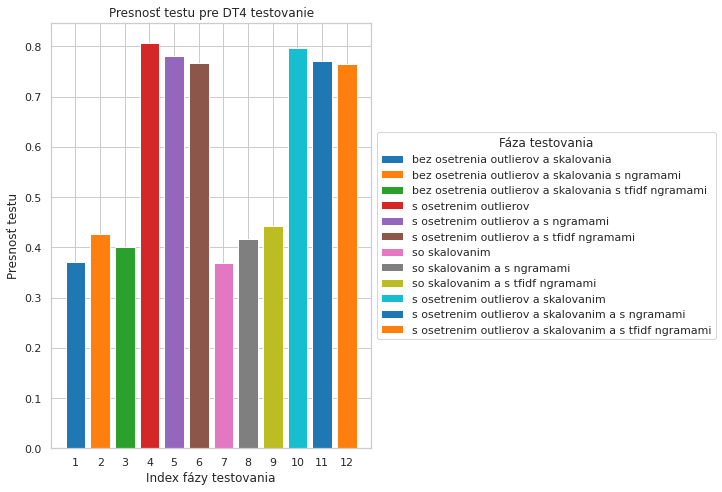

In [766]:
# Nastavenie veľkosti grafu
plt.figure(figsize=(12, 7))

# Farebná paleta pre rôzne testovania
colors = sns.color_palette("tab10", 12)

# Vykreslenie grafu pre každý DataFrame
for results_df, label in [(results_svc1, 'SVC1'), (results_svc2, 'SVC2'), (results_svc3, 'SVC3'), (results_rf1, 'RF1'), (results_rf2, 'RF2'), (results_rf3, 'RF3'), (results_gbm1, 'DT1'), (results_gbm2, 'DT3'), (results_gbm3, 'DT4')]:
    fig, ax = plt.subplots(figsize=(12, 7))

    # Názvy indexov vo vašom DataFrame, upravte podľa potreby
    index_names = results_df.index.tolist()

    # Vykreslenie stĺpcov pre každý index
    for i, index_name in enumerate(index_names):
        # Vyberieme farbu pre aktuálny index
        color = colors[i % len(colors)]
        # Vykreslíme stĺpec a pridáme popisek pre legendu
        ax.bar(i, results_df.loc[index_name, 'accuracy_test'], color=color, label=index_name)

    # Nastavíme os x na čísla od 0 do počtu indexov - 1
    ax.set_xticks(np.arange(len(index_names)))
    ax.set_xticklabels(np.arange(1, len(index_names) + 1))

    # Pridáme legendu
    ax.legend(title='Fáza testovania', loc='center left', bbox_to_anchor=(1, 0.5))

    # Nastavíme názov grafu a popisy osí
    ax.set_title(f'Presnosť testu pre {label} testovanie')
    ax.set_xlabel('Index fázy testovania')
    ax.set_ylabel('Presnosť testu')

    # Zobrazíme graf
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()